In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from metal.contrib.slicing.synthetics.geometric_synthetics import generate_dataset

In [2]:
from metal.contrib.slicing.online_dp import SliceHatModel, MLPModule
from metal.end_model import EndModel

# NOTE: each model can take a "train_kwargs"

### SHARED PIECES
train_kwargs = {
    "verbose": True,
    "n_epochs": 40,
    "lr": 0.01,
    "l2": 0.0005,
    "disable_prog_bar": True
}
end_model_init_kwargs = {
    "layer_out_dims": [2, 10, 10, 2]
}

### FULL CONFIGS
dp_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "train_kwargs": train_kwargs
}

uni_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "train_kwargs": train_kwargs
}

up_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "upweight_search_space": {"range": [1, 5]},
    "max_search": 5,
    "train_kwargs": train_kwargs
}

moe_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "expert_train_kwargs": {"n_epochs": 10, "verbose": False},
    "train_kwargs": {"verbose": False},
    "gating_dim": 5,
    "train_kwargs": train_kwargs
}

print("WARNING: Pay attention to slice weight!")
sm_hat_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "slice_kwargs": {
        "slice_weight": 0.1,
        "reweight": True,
    },
    "train_kwargs": train_kwargs
}

sm_on_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "slice_kwargs": {
        "L_head_weight": 0.1,
        "Y_head_weight": 0.1 
    },
    "train_kwargs": train_kwargs
}

sm_dp_config = {
    'slice_kwargs': {
        'r': 10,
        'slice_weight': 0.1,
        'reweight': True
    },
    'train_kwargs': train_kwargs,
    'input_module_class': MLPModule,
    'input_module_init_kwargs': {
        'input_dim': 2,
        'output_dim': 10,
        'middle_dims': [10],
        'bias': True
    }
}

## Bipolar LFs, yes masking

Pepper: 0.1
Salt: 24


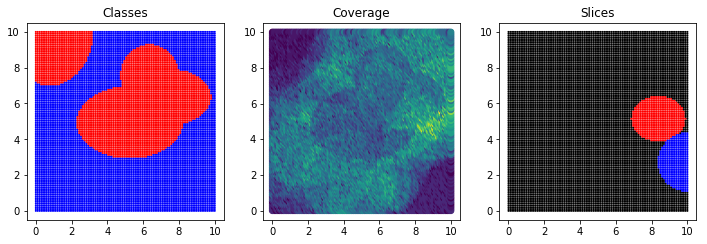

[Trial 0]
---------- Training DP ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.670, valid/accuracy=0.725
Saving model at iteration 1 with best score 0.725
[2 epo]: train/loss=0.646, valid/accuracy=0.737
Saving model at iteration 2 with best score 0.737
[3 epo]: train/loss=0.629, valid/accuracy=0.844
Saving model at iteration 3 with best score 0.844
[4 epo]: train/loss=0.609, valid/accuracy=0.914
Saving model at iteration 4 with best score 0.914
[5 epo]: train/loss=0.600, valid/accuracy=0.915
Saving model at iteration 5 with best score 0.915
[6 epo]: train/loss=0.594, valid/accuracy=0.786
[7 epo]: train/loss=0.588, valid/accuracy=0.868
[8 epo]:

/dfs/scratch0/vschen/snorkel-pytorch/venv/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/dfs/scratch0/vschen/metal-slicing-repro/metal/contrib/slicing/online_dp.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  A = F.softmax(self.forward_L(x)).unsqueeze(1)
/dfs/scratch0/vschen/metal-slicing-repro/metal/contrib/slicing/online_dp.py:176: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.forward_Y(x)).data.cpu().numpy()


[1 epo]: train/loss=19.008, valid/accuracy=0.750
Saving model at iteration 1 with best score 0.750
[2 epo]: train/loss=18.312, valid/accuracy=0.747
[3 epo]: train/loss=17.519, valid/accuracy=0.882
Saving model at iteration 3 with best score 0.882
[4 epo]: train/loss=17.082, valid/accuracy=0.814
[5 epo]: train/loss=16.670, valid/accuracy=0.865
[6 epo]: train/loss=16.573, valid/accuracy=0.860
[7 epo]: train/loss=16.535, valid/accuracy=0.938
Saving model at iteration 7 with best score 0.938
[8 epo]: train/loss=16.392, valid/accuracy=0.908
[9 epo]: train/loss=16.334, valid/accuracy=0.931
[10 epo]: train/loss=16.238, valid/accuracy=0.919
[11 epo]: train/loss=16.212, valid/accuracy=0.912
[12 epo]: train/loss=16.304, valid/accuracy=0.898
[13 epo]: train/loss=16.204, valid/accuracy=0.890
[14 epo]: train/loss=16.047, valid/accuracy=0.954
Saving model at iteration 14 with best score 0.954
[15 epo]: train/loss=16.021, valid/accuracy=0.924
[16 epo]: train/loss=16.005, valid/accuracy=0.915
[17 epo]

[20 epo]: train/loss=16.269, valid/accuracy=0.957
[21 epo]: train/loss=16.195, valid/accuracy=0.954
[22 epo]: train/loss=16.155, valid/accuracy=0.961
[23 epo]: train/loss=16.165, valid/accuracy=0.935
[24 epo]: train/loss=16.064, valid/accuracy=0.960
[25 epo]: train/loss=16.071, valid/accuracy=0.966
Saving model at iteration 25 with best score 0.966
[26 epo]: train/loss=16.081, valid/accuracy=0.961
[27 epo]: train/loss=16.070, valid/accuracy=0.966
[28 epo]: train/loss=16.063, valid/accuracy=0.960
[29 epo]: train/loss=16.099, valid/accuracy=0.962
[30 epo]: train/loss=16.033, valid/accuracy=0.961
[31 epo]: train/loss=16.064, valid/accuracy=0.956
[32 epo]: train/loss=16.055, valid/accuracy=0.945
[33 epo]: train/loss=16.030, valid/accuracy=0.967
Saving model at iteration 33 with best score 0.967
[34 epo]: train/loss=16.036, valid/accuracy=0.958
[35 epo]: train/loss=16.000, valid/accuracy=0.953
[36 epo]: train/loss=15.997, valid/accuracy=0.971
Saving model at iteration 36 with best score 0.9

[1 epo]: train/loss=0.602, valid/accuracy=0.749
Saving model at iteration 1 with best score 0.749
[2 epo]: train/loss=0.571, valid/accuracy=0.866
Saving model at iteration 2 with best score 0.866
[3 epo]: train/loss=0.548, valid/accuracy=0.949
Saving model at iteration 3 with best score 0.949
[4 epo]: train/loss=0.538, valid/accuracy=0.918
[5 epo]: train/loss=0.535, valid/accuracy=0.919
[6 epo]: train/loss=0.533, valid/accuracy=0.931
[7 epo]: train/loss=0.532, valid/accuracy=0.884
[8 epo]: train/loss=0.532, valid/accuracy=0.932
[9 epo]: train/loss=0.532, valid/accuracy=0.922
[10 epo]: train/loss=0.527, valid/accuracy=0.930
[11 epo]: train/loss=0.527, valid/accuracy=0.896
[12 epo]: train/loss=0.528, valid/accuracy=0.916
[13 epo]: train/loss=0.523, valid/accuracy=0.921
[14 epo]: train/loss=0.524, valid/accuracy=0.955
Saving model at iteration 14 with best score 0.955
[15 epo]: train/loss=0.523, valid/accuracy=0.952
[16 epo]: train/loss=0.523, valid/accuracy=0.944
[17 epo]: train/loss=0.5

[25 epo]: train/loss=0.579, valid/accuracy=0.917
[26 epo]: train/loss=0.578, valid/accuracy=0.911
[27 epo]: train/loss=0.578, valid/accuracy=0.894
[28 epo]: train/loss=0.578, valid/accuracy=0.884
[29 epo]: train/loss=0.578, valid/accuracy=0.930
[30 epo]: train/loss=0.577, valid/accuracy=0.895
[31 epo]: train/loss=0.578, valid/accuracy=0.922
[32 epo]: train/loss=0.577, valid/accuracy=0.943
Saving model at iteration 32 with best score 0.943
[33 epo]: train/loss=0.576, valid/accuracy=0.900
[34 epo]: train/loss=0.576, valid/accuracy=0.941
[35 epo]: train/loss=0.574, valid/accuracy=0.925
[36 epo]: train/loss=0.575, valid/accuracy=0.940
[37 epo]: train/loss=0.574, valid/accuracy=0.923
[38 epo]: train/loss=0.574, valid/accuracy=0.886
[39 epo]: train/loss=0.574, valid/accuracy=0.940
[40 epo]: train/loss=0.573, valid/accuracy=0.933
Restoring best model from iteration 32 with score 0.943
Finished Training
Accuracy: 0.943
        y=1    y=2   
 l=1    833    108   
 l=2    35    1524   
---------

---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Resetting base model parameters
SliceOnlineModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=1, bias=True)
  (Y_criteria): BCEWithLogitsLoss()
  (Y_head_on): Linear(in_features=20, out_features=1, bias=True)
)

[1 epo]: train/l

[9 epo]: train/loss=16.300, valid/accuracy=0.928
[10 epo]: train/loss=16.213, valid/accuracy=0.924
[11 epo]: train/loss=16.148, valid/accuracy=0.899
[12 epo]: train/loss=16.161, valid/accuracy=0.886
[13 epo]: train/loss=16.051, valid/accuracy=0.917
[14 epo]: train/loss=15.980, valid/accuracy=0.941
Saving model at iteration 14 with best score 0.941
[15 epo]: train/loss=15.980, valid/accuracy=0.936
[16 epo]: train/loss=15.977, valid/accuracy=0.919
[17 epo]: train/loss=15.966, valid/accuracy=0.945
Saving model at iteration 17 with best score 0.945
[18 epo]: train/loss=15.982, valid/accuracy=0.942
[19 epo]: train/loss=15.955, valid/accuracy=0.947
Saving model at iteration 19 with best score 0.947
[20 epo]: train/loss=15.900, valid/accuracy=0.900
[21 epo]: train/loss=15.953, valid/accuracy=0.930
[22 epo]: train/loss=15.925, valid/accuracy=0.945
[23 epo]: train/loss=15.928, valid/accuracy=0.906
[24 epo]: train/loss=15.837, valid/accuracy=0.927
[25 epo]: train/loss=15.801, valid/accuracy=0.92

[26 epo]: train/loss=16.595, valid/accuracy=0.954
Saving model at iteration 26 with best score 0.954
[27 epo]: train/loss=16.573, valid/accuracy=0.948
[28 epo]: train/loss=16.525, valid/accuracy=0.931
[29 epo]: train/loss=16.525, valid/accuracy=0.935
[30 epo]: train/loss=16.518, valid/accuracy=0.928
[31 epo]: train/loss=16.475, valid/accuracy=0.928
[32 epo]: train/loss=16.457, valid/accuracy=0.952
[33 epo]: train/loss=16.461, valid/accuracy=0.964
Saving model at iteration 33 with best score 0.964
[34 epo]: train/loss=16.396, valid/accuracy=0.932
[35 epo]: train/loss=16.411, valid/accuracy=0.942
[36 epo]: train/loss=16.347, valid/accuracy=0.949
[37 epo]: train/loss=16.327, valid/accuracy=0.931
[38 epo]: train/loss=16.332, valid/accuracy=0.945
[39 epo]: train/loss=16.309, valid/accuracy=0.937
[40 epo]: train/loss=16.305, valid/accuracy=0.940
Restoring best model from iteration 33 with score 0.964
Finished Training
Accuracy: 0.964
        y=1    y=2   
 l=1    894    47    
 l=2    43    

[1 epo]: train/loss=0.612, valid/accuracy=0.744
Saving model at iteration 1 with best score 0.744
[2 epo]: train/loss=0.587, valid/accuracy=0.811
Saving model at iteration 2 with best score 0.811
[3 epo]: train/loss=0.560, valid/accuracy=0.938
Saving model at iteration 3 with best score 0.938
[4 epo]: train/loss=0.546, valid/accuracy=0.925
[5 epo]: train/loss=0.540, valid/accuracy=0.890
[6 epo]: train/loss=0.538, valid/accuracy=0.897
[7 epo]: train/loss=0.540, valid/accuracy=0.907
[8 epo]: train/loss=0.538, valid/accuracy=0.908
[9 epo]: train/loss=0.538, valid/accuracy=0.852
[10 epo]: train/loss=0.531, valid/accuracy=0.894
[11 epo]: train/loss=0.530, valid/accuracy=0.916
[12 epo]: train/loss=0.530, valid/accuracy=0.908
[13 epo]: train/loss=0.528, valid/accuracy=0.925
[14 epo]: train/loss=0.525, valid/accuracy=0.919
[15 epo]: train/loss=0.526, valid/accuracy=0.916
[16 epo]: train/loss=0.527, valid/accuracy=0.943
Saving model at iteration 16 with best score 0.943
[17 epo]: train/loss=0.5

[28 epo]: train/loss=0.571, valid/accuracy=0.940
[29 epo]: train/loss=0.572, valid/accuracy=0.921
[30 epo]: train/loss=0.573, valid/accuracy=0.936
[31 epo]: train/loss=0.571, valid/accuracy=0.959
[32 epo]: train/loss=0.572, valid/accuracy=0.948
[33 epo]: train/loss=0.571, valid/accuracy=0.933
[34 epo]: train/loss=0.572, valid/accuracy=0.957
[35 epo]: train/loss=0.569, valid/accuracy=0.940
[36 epo]: train/loss=0.570, valid/accuracy=0.956
[37 epo]: train/loss=0.570, valid/accuracy=0.950
[38 epo]: train/loss=0.569, valid/accuracy=0.938
[39 epo]: train/loss=0.570, valid/accuracy=0.961
[40 epo]: train/loss=0.569, valid/accuracy=0.940
Restoring best model from iteration 25 with score 0.961
Finished Training
Accuracy: 0.961
        y=1    y=2   
 l=1    889    52    
 l=2    45    1514   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]

---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Resetting base model parameters
SliceOnlineModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=1, bias=True)
  (Y_criteria): BCEWithLogitsLoss()
  (Y_head_on): Linear(in_features=20, out_features=1, bias=True)
)

[1 epo]: train/l

[14 epo]: train/loss=15.946, valid/accuracy=0.938
[15 epo]: train/loss=15.909, valid/accuracy=0.910
[16 epo]: train/loss=15.944, valid/accuracy=0.933
[17 epo]: train/loss=15.915, valid/accuracy=0.931
[18 epo]: train/loss=15.896, valid/accuracy=0.926
[19 epo]: train/loss=15.860, valid/accuracy=0.952
Saving model at iteration 19 with best score 0.952
[20 epo]: train/loss=15.864, valid/accuracy=0.929
[21 epo]: train/loss=15.916, valid/accuracy=0.917
[22 epo]: train/loss=15.840, valid/accuracy=0.911
[23 epo]: train/loss=15.865, valid/accuracy=0.934
[24 epo]: train/loss=15.806, valid/accuracy=0.954
Saving model at iteration 24 with best score 0.954
[25 epo]: train/loss=15.740, valid/accuracy=0.954
[26 epo]: train/loss=15.733, valid/accuracy=0.955
Saving model at iteration 26 with best score 0.955
[27 epo]: train/loss=15.729, valid/accuracy=0.934
[28 epo]: train/loss=15.741, valid/accuracy=0.952
[29 epo]: train/loss=15.734, valid/accuracy=0.930
[30 epo]: train/loss=15.742, valid/accuracy=0.9

[34 epo]: train/loss=16.186, valid/accuracy=0.955
[35 epo]: train/loss=16.190, valid/accuracy=0.948
[36 epo]: train/loss=16.142, valid/accuracy=0.959
[37 epo]: train/loss=16.138, valid/accuracy=0.969
Saving model at iteration 37 with best score 0.969
[38 epo]: train/loss=16.128, valid/accuracy=0.965
[39 epo]: train/loss=16.139, valid/accuracy=0.968
[40 epo]: train/loss=16.124, valid/accuracy=0.970
Saving model at iteration 40 with best score 0.970
Restoring best model from iteration 40 with score 0.970
Finished Training
Accuracy: 0.970
        y=1    y=2   
 l=1    897    44    
 l=2    32    1527   
[Trial 7]
---------- Training DP ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, 

[4 epo]: train/loss=0.547, valid/accuracy=0.912
Saving model at iteration 4 with best score 0.912
[5 epo]: train/loss=0.541, valid/accuracy=0.893
[6 epo]: train/loss=0.540, valid/accuracy=0.901
[7 epo]: train/loss=0.538, valid/accuracy=0.897
[8 epo]: train/loss=0.534, valid/accuracy=0.908
[9 epo]: train/loss=0.534, valid/accuracy=0.917
Saving model at iteration 9 with best score 0.917
[10 epo]: train/loss=0.532, valid/accuracy=0.909
[11 epo]: train/loss=0.532, valid/accuracy=0.914
[12 epo]: train/loss=0.532, valid/accuracy=0.928
Saving model at iteration 12 with best score 0.928
[13 epo]: train/loss=0.525, valid/accuracy=0.925
[14 epo]: train/loss=0.525, valid/accuracy=0.928
Saving model at iteration 14 with best score 0.928
[15 epo]: train/loss=0.523, valid/accuracy=0.903
[16 epo]: train/loss=0.525, valid/accuracy=0.924
[17 epo]: train/loss=0.525, valid/accuracy=0.932
Saving model at iteration 17 with best score 0.932
[18 epo]: train/loss=0.523, valid/accuracy=0.907
[19 epo]: train/lo

[29 epo]: train/loss=0.568, valid/accuracy=0.948
[30 epo]: train/loss=0.567, valid/accuracy=0.964
Saving model at iteration 30 with best score 0.964
[31 epo]: train/loss=0.567, valid/accuracy=0.945
[32 epo]: train/loss=0.566, valid/accuracy=0.962
[33 epo]: train/loss=0.567, valid/accuracy=0.952
[34 epo]: train/loss=0.566, valid/accuracy=0.955
[35 epo]: train/loss=0.565, valid/accuracy=0.950
[36 epo]: train/loss=0.565, valid/accuracy=0.950
[37 epo]: train/loss=0.565, valid/accuracy=0.949
[38 epo]: train/loss=0.565, valid/accuracy=0.955
[39 epo]: train/loss=0.564, valid/accuracy=0.960
[40 epo]: train/loss=0.564, valid/accuracy=0.951
Restoring best model from iteration 30 with score 0.964
Finished Training
Accuracy: 0.964
        y=1    y=2   
 l=1    923    18    
 l=2    72    1487   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1

[1 epo]: train/loss=19.233, valid/accuracy=0.752
Saving model at iteration 1 with best score 0.752
[2 epo]: train/loss=18.435, valid/accuracy=0.814
Saving model at iteration 2 with best score 0.814
[3 epo]: train/loss=17.968, valid/accuracy=0.886
Saving model at iteration 3 with best score 0.886
[4 epo]: train/loss=17.368, valid/accuracy=0.901
Saving model at iteration 4 with best score 0.901
[5 epo]: train/loss=17.191, valid/accuracy=0.836
[6 epo]: train/loss=16.912, valid/accuracy=0.912
Saving model at iteration 6 with best score 0.912
[7 epo]: train/loss=16.813, valid/accuracy=0.876
[8 epo]: train/loss=16.869, valid/accuracy=0.913
Saving model at iteration 8 with best score 0.913
[9 epo]: train/loss=16.678, valid/accuracy=0.919
Saving model at iteration 9 with best score 0.919
[10 epo]: train/loss=16.708, valid/accuracy=0.934
Saving model at iteration 10 with best score 0.934
[11 epo]: train/loss=16.687, valid/accuracy=0.862
[12 epo]: train/loss=16.663, valid/accuracy=0.912
[13 epo]

[34 epo]: train/loss=15.934, valid/accuracy=0.931
[35 epo]: train/loss=15.862, valid/accuracy=0.947
[36 epo]: train/loss=15.849, valid/accuracy=0.947
[37 epo]: train/loss=15.840, valid/accuracy=0.934
[38 epo]: train/loss=15.847, valid/accuracy=0.943
[39 epo]: train/loss=15.819, valid/accuracy=0.966
Saving model at iteration 39 with best score 0.966
[40 epo]: train/loss=15.842, valid/accuracy=0.962
Restoring best model from iteration 39 with score 0.966
Finished Training
Accuracy: 0.966
        y=1    y=2   
 l=1    891    50    
 l=2    36    1523   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: True
Resetting base model pa

[2 epo]: train/loss=0.636, valid/accuracy=0.755
Saving model at iteration 2 with best score 0.755
[3 epo]: train/loss=0.620, valid/accuracy=0.834
Saving model at iteration 3 with best score 0.834
[4 epo]: train/loss=0.612, valid/accuracy=0.831
[5 epo]: train/loss=0.602, valid/accuracy=0.791
[6 epo]: train/loss=0.598, valid/accuracy=0.845
Saving model at iteration 6 with best score 0.845
[7 epo]: train/loss=0.597, valid/accuracy=0.872
Saving model at iteration 7 with best score 0.872
[8 epo]: train/loss=0.593, valid/accuracy=0.843
[9 epo]: train/loss=0.593, valid/accuracy=0.884
Saving model at iteration 9 with best score 0.884
[10 epo]: train/loss=0.588, valid/accuracy=0.878
[11 epo]: train/loss=0.588, valid/accuracy=0.906
Saving model at iteration 11 with best score 0.906
[12 epo]: train/loss=0.584, valid/accuracy=0.878
[13 epo]: train/loss=0.579, valid/accuracy=0.874
[14 epo]: train/loss=0.578, valid/accuracy=0.910
Saving model at iteration 14 with best score 0.910
[15 epo]: train/los

[21 epo]: train/loss=0.524, valid/accuracy=0.951
Saving model at iteration 21 with best score 0.951
[22 epo]: train/loss=0.525, valid/accuracy=0.919
[23 epo]: train/loss=0.524, valid/accuracy=0.933
[24 epo]: train/loss=0.523, valid/accuracy=0.936
[25 epo]: train/loss=0.523, valid/accuracy=0.961
Saving model at iteration 25 with best score 0.961
[26 epo]: train/loss=0.522, valid/accuracy=0.952
[27 epo]: train/loss=0.521, valid/accuracy=0.952
[28 epo]: train/loss=0.522, valid/accuracy=0.955
[29 epo]: train/loss=0.522, valid/accuracy=0.950
[30 epo]: train/loss=0.522, valid/accuracy=0.947
[31 epo]: train/loss=0.522, valid/accuracy=0.921
[32 epo]: train/loss=0.521, valid/accuracy=0.934
[33 epo]: train/loss=0.521, valid/accuracy=0.948
[34 epo]: train/loss=0.521, valid/accuracy=0.929
[35 epo]: train/loss=0.520, valid/accuracy=0.942
[36 epo]: train/loss=0.520, valid/accuracy=0.938
[37 epo]: train/loss=0.520, valid/accuracy=0.949
[38 epo]: train/loss=0.520, valid/accuracy=0.950
[39 epo]: train/

[1 epo]: train/loss=19.101, valid/accuracy=0.688
Saving model at iteration 1 with best score 0.688
[2 epo]: train/loss=18.262, valid/accuracy=0.734
Saving model at iteration 2 with best score 0.734
[3 epo]: train/loss=17.593, valid/accuracy=0.778
Saving model at iteration 3 with best score 0.778
[4 epo]: train/loss=17.153, valid/accuracy=0.843
Saving model at iteration 4 with best score 0.843
[5 epo]: train/loss=16.780, valid/accuracy=0.864
Saving model at iteration 5 with best score 0.864
[6 epo]: train/loss=16.415, valid/accuracy=0.951
Saving model at iteration 6 with best score 0.951
[7 epo]: train/loss=16.368, valid/accuracy=0.919
[8 epo]: train/loss=16.216, valid/accuracy=0.952
Saving model at iteration 8 with best score 0.952
[9 epo]: train/loss=16.119, valid/accuracy=0.942
[10 epo]: train/loss=16.149, valid/accuracy=0.930
[11 epo]: train/loss=16.171, valid/accuracy=0.925
[12 epo]: train/loss=16.209, valid/accuracy=0.939
[13 epo]: train/loss=15.957, valid/accuracy=0.942
[14 epo]:

[19 epo]: train/loss=16.688, valid/accuracy=0.896
[20 epo]: train/loss=16.692, valid/accuracy=0.941
[21 epo]: train/loss=16.678, valid/accuracy=0.926
[22 epo]: train/loss=16.675, valid/accuracy=0.922
[23 epo]: train/loss=16.651, valid/accuracy=0.912
[24 epo]: train/loss=16.565, valid/accuracy=0.907
[25 epo]: train/loss=16.542, valid/accuracy=0.940
[26 epo]: train/loss=16.536, valid/accuracy=0.954
Saving model at iteration 26 with best score 0.954
[27 epo]: train/loss=16.523, valid/accuracy=0.936
[28 epo]: train/loss=16.511, valid/accuracy=0.934
[29 epo]: train/loss=16.507, valid/accuracy=0.945
[30 epo]: train/loss=16.480, valid/accuracy=0.951
[31 epo]: train/loss=16.493, valid/accuracy=0.936
[32 epo]: train/loss=16.528, valid/accuracy=0.951
[33 epo]: train/loss=16.503, valid/accuracy=0.937
[34 epo]: train/loss=16.486, valid/accuracy=0.916
[35 epo]: train/loss=16.454, valid/accuracy=0.946
[36 epo]: train/loss=16.428, valid/accuracy=0.933
[37 epo]: train/loss=16.438, valid/accuracy=0.952

[1 epo]: train/loss=0.607, valid/accuracy=0.744
Saving model at iteration 1 with best score 0.744
[2 epo]: train/loss=0.583, valid/accuracy=0.852
Saving model at iteration 2 with best score 0.852
[3 epo]: train/loss=0.568, valid/accuracy=0.852
Saving model at iteration 3 with best score 0.852
[4 epo]: train/loss=0.556, valid/accuracy=0.884
Saving model at iteration 4 with best score 0.884
[5 epo]: train/loss=0.552, valid/accuracy=0.920
Saving model at iteration 5 with best score 0.920
[6 epo]: train/loss=0.547, valid/accuracy=0.888
[7 epo]: train/loss=0.538, valid/accuracy=0.888
[8 epo]: train/loss=0.535, valid/accuracy=0.912
[9 epo]: train/loss=0.532, valid/accuracy=0.915
[10 epo]: train/loss=0.531, valid/accuracy=0.924
Saving model at iteration 10 with best score 0.924
[11 epo]: train/loss=0.532, valid/accuracy=0.919
[12 epo]: train/loss=0.531, valid/accuracy=0.876
[13 epo]: train/loss=0.527, valid/accuracy=0.930
Saving model at iteration 13 with best score 0.930
[14 epo]: train/loss

[26 epo]: train/loss=0.564, valid/accuracy=0.932
[27 epo]: train/loss=0.564, valid/accuracy=0.934
[28 epo]: train/loss=0.564, valid/accuracy=0.906
[29 epo]: train/loss=0.564, valid/accuracy=0.930
[30 epo]: train/loss=0.563, valid/accuracy=0.940
[31 epo]: train/loss=0.563, valid/accuracy=0.886
[32 epo]: train/loss=0.564, valid/accuracy=0.920
[33 epo]: train/loss=0.564, valid/accuracy=0.935
[34 epo]: train/loss=0.563, valid/accuracy=0.934
[35 epo]: train/loss=0.562, valid/accuracy=0.932
[36 epo]: train/loss=0.562, valid/accuracy=0.928
[37 epo]: train/loss=0.562, valid/accuracy=0.927
[38 epo]: train/loss=0.562, valid/accuracy=0.931
[39 epo]: train/loss=0.562, valid/accuracy=0.933
[40 epo]: train/loss=0.562, valid/accuracy=0.926
Restoring best model from iteration 18 with score 0.956
Finished Training
Accuracy: 0.956
        y=1    y=2   
 l=1    888    53    
 l=2    57    1502   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: 

[1 epo]: train/loss=19.073, valid/accuracy=0.762
Saving model at iteration 1 with best score 0.762
[2 epo]: train/loss=18.168, valid/accuracy=0.843
Saving model at iteration 2 with best score 0.843
[3 epo]: train/loss=17.652, valid/accuracy=0.781
[4 epo]: train/loss=17.397, valid/accuracy=0.850
Saving model at iteration 4 with best score 0.850
[5 epo]: train/loss=17.319, valid/accuracy=0.847
[6 epo]: train/loss=17.276, valid/accuracy=0.859
Saving model at iteration 6 with best score 0.859
[7 epo]: train/loss=17.155, valid/accuracy=0.866
Saving model at iteration 7 with best score 0.866
[8 epo]: train/loss=17.128, valid/accuracy=0.818
[9 epo]: train/loss=17.073, valid/accuracy=0.851
[10 epo]: train/loss=16.925, valid/accuracy=0.857
[11 epo]: train/loss=16.943, valid/accuracy=0.889
Saving model at iteration 11 with best score 0.889
[12 epo]: train/loss=16.584, valid/accuracy=0.882
[13 epo]: train/loss=16.395, valid/accuracy=0.918
Saving model at iteration 13 with best score 0.918
[14 epo

[23 epo]: train/loss=15.933, valid/accuracy=0.940
[24 epo]: train/loss=15.844, valid/accuracy=0.962
[25 epo]: train/loss=15.846, valid/accuracy=0.963
[26 epo]: train/loss=15.833, valid/accuracy=0.958
[27 epo]: train/loss=15.853, valid/accuracy=0.947
[28 epo]: train/loss=15.828, valid/accuracy=0.940
[29 epo]: train/loss=15.862, valid/accuracy=0.951
[30 epo]: train/loss=15.789, valid/accuracy=0.960
[31 epo]: train/loss=15.793, valid/accuracy=0.965
[32 epo]: train/loss=15.794, valid/accuracy=0.965
[33 epo]: train/loss=15.798, valid/accuracy=0.962
[34 epo]: train/loss=15.794, valid/accuracy=0.955
[35 epo]: train/loss=15.758, valid/accuracy=0.964
[36 epo]: train/loss=15.728, valid/accuracy=0.966
[37 epo]: train/loss=15.729, valid/accuracy=0.955
[38 epo]: train/loss=15.717, valid/accuracy=0.964
[39 epo]: train/loss=15.735, valid/accuracy=0.968
Saving model at iteration 39 with best score 0.968
[40 epo]: train/loss=15.712, valid/accuracy=0.960
Restoring best model from iteration 39 with score

[Trial 15]
---------- Training DP ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.654, valid/accuracy=0.828
Saving model at iteration 1 with best score 0.828
[2 epo]: train/loss=0.627, valid/accuracy=0.848
Saving model at iteration 2 with best score 0.848
[3 epo]: train/loss=0.612, valid/accuracy=0.835
[4 epo]: train/loss=0.606, valid/accuracy=0.920
Saving model at iteration 4 with best score 0.920
[5 epo]: train/loss=0.606, valid/accuracy=0.845
[6 epo]: train/loss=0.599, valid/accuracy=0.860
[7 epo]: train/loss=0.594, valid/accuracy=0.775
[8 epo]: train/loss=0.590, valid/accuracy=0.914
[9 epo]: train/loss=0.587, valid/accuracy=0.854
[10 epo]: t

[16 epo]: train/loss=0.534, valid/accuracy=0.930
[17 epo]: train/loss=0.534, valid/accuracy=0.916
[18 epo]: train/loss=0.535, valid/accuracy=0.937
Saving model at iteration 18 with best score 0.937
[19 epo]: train/loss=0.537, valid/accuracy=0.920
[20 epo]: train/loss=0.533, valid/accuracy=0.914
[21 epo]: train/loss=0.534, valid/accuracy=0.928
[22 epo]: train/loss=0.535, valid/accuracy=0.905
[23 epo]: train/loss=0.535, valid/accuracy=0.928
[24 epo]: train/loss=0.531, valid/accuracy=0.930
[25 epo]: train/loss=0.530, valid/accuracy=0.927
[26 epo]: train/loss=0.530, valid/accuracy=0.918
[27 epo]: train/loss=0.530, valid/accuracy=0.943
Saving model at iteration 27 with best score 0.943
[28 epo]: train/loss=0.530, valid/accuracy=0.941
[29 epo]: train/loss=0.529, valid/accuracy=0.955
Saving model at iteration 29 with best score 0.955
[30 epo]: train/loss=0.529, valid/accuracy=0.920
[31 epo]: train/loss=0.530, valid/accuracy=0.941
[32 epo]: train/loss=0.529, valid/accuracy=0.950
[33 epo]: trai

[1 epo]: train/loss=18.799, valid/accuracy=0.733
Saving model at iteration 1 with best score 0.733
[2 epo]: train/loss=18.269, valid/accuracy=0.767
Saving model at iteration 2 with best score 0.767
[3 epo]: train/loss=18.087, valid/accuracy=0.804
Saving model at iteration 3 with best score 0.804
[4 epo]: train/loss=17.870, valid/accuracy=0.864
Saving model at iteration 4 with best score 0.864
[5 epo]: train/loss=17.803, valid/accuracy=0.850
[6 epo]: train/loss=17.763, valid/accuracy=0.816
[7 epo]: train/loss=17.615, valid/accuracy=0.832
[8 epo]: train/loss=17.561, valid/accuracy=0.854
[9 epo]: train/loss=17.522, valid/accuracy=0.868
Saving model at iteration 9 with best score 0.868
[10 epo]: train/loss=17.516, valid/accuracy=0.849
[11 epo]: train/loss=17.519, valid/accuracy=0.823
[12 epo]: train/loss=17.454, valid/accuracy=0.842
[13 epo]: train/loss=17.384, valid/accuracy=0.856
[14 epo]: train/loss=17.356, valid/accuracy=0.859
[15 epo]: train/loss=17.347, valid/accuracy=0.864
[16 epo]:

[16 epo]: train/loss=16.488, valid/accuracy=0.954
[17 epo]: train/loss=16.464, valid/accuracy=0.947
[18 epo]: train/loss=16.464, valid/accuracy=0.936
[19 epo]: train/loss=16.475, valid/accuracy=0.910
[20 epo]: train/loss=16.471, valid/accuracy=0.878
[21 epo]: train/loss=16.430, valid/accuracy=0.918
[22 epo]: train/loss=16.442, valid/accuracy=0.960
[23 epo]: train/loss=16.427, valid/accuracy=0.946
[24 epo]: train/loss=16.360, valid/accuracy=0.957
[25 epo]: train/loss=16.342, valid/accuracy=0.955
[26 epo]: train/loss=16.323, valid/accuracy=0.937
[27 epo]: train/loss=16.359, valid/accuracy=0.942
[28 epo]: train/loss=16.343, valid/accuracy=0.960
[29 epo]: train/loss=16.347, valid/accuracy=0.965
Saving model at iteration 29 with best score 0.965
[30 epo]: train/loss=16.312, valid/accuracy=0.959
[31 epo]: train/loss=16.336, valid/accuracy=0.940
[32 epo]: train/loss=16.339, valid/accuracy=0.963
[33 epo]: train/loss=16.330, valid/accuracy=0.915
[34 epo]: train/loss=16.320, valid/accuracy=0.964

---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: True
Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=2, bias=True)
  (Y_criteria): SoftCrossEntropyLoss()
)

[1 epo]: train/loss=0.610, valid/accuracy=0.725
Saving model

[8 epo]: train/loss=0.614, valid/accuracy=0.845
[9 epo]: train/loss=0.604, valid/accuracy=0.835
[10 epo]: train/loss=0.596, valid/accuracy=0.874
[11 epo]: train/loss=0.592, valid/accuracy=0.910
Saving model at iteration 11 with best score 0.910
[12 epo]: train/loss=0.588, valid/accuracy=0.922
Saving model at iteration 12 with best score 0.922
[13 epo]: train/loss=0.582, valid/accuracy=0.910
[14 epo]: train/loss=0.584, valid/accuracy=0.881
[15 epo]: train/loss=0.584, valid/accuracy=0.956
Saving model at iteration 15 with best score 0.956
[16 epo]: train/loss=0.582, valid/accuracy=0.904
[17 epo]: train/loss=0.583, valid/accuracy=0.932
[18 epo]: train/loss=0.580, valid/accuracy=0.910
[19 epo]: train/loss=0.582, valid/accuracy=0.936
[20 epo]: train/loss=0.580, valid/accuracy=0.904
[21 epo]: train/loss=0.581, valid/accuracy=0.928
[22 epo]: train/loss=0.580, valid/accuracy=0.912
[23 epo]: train/loss=0.579, valid/accuracy=0.914
[24 epo]: train/loss=0.577, valid/accuracy=0.899
[25 epo]: train/

[25 epo]: train/loss=0.525, valid/accuracy=0.945
[26 epo]: train/loss=0.524, valid/accuracy=0.941
[27 epo]: train/loss=0.524, valid/accuracy=0.930
[28 epo]: train/loss=0.524, valid/accuracy=0.948
[29 epo]: train/loss=0.524, valid/accuracy=0.941
[30 epo]: train/loss=0.524, valid/accuracy=0.957
[31 epo]: train/loss=0.524, valid/accuracy=0.953
[32 epo]: train/loss=0.524, valid/accuracy=0.924
[33 epo]: train/loss=0.524, valid/accuracy=0.946
[34 epo]: train/loss=0.524, valid/accuracy=0.947
[35 epo]: train/loss=0.523, valid/accuracy=0.950
[36 epo]: train/loss=0.522, valid/accuracy=0.954
[37 epo]: train/loss=0.522, valid/accuracy=0.951
[38 epo]: train/loss=0.522, valid/accuracy=0.956
[39 epo]: train/loss=0.522, valid/accuracy=0.951
[40 epo]: train/loss=0.523, valid/accuracy=0.945
Restoring best model from iteration 23 with score 0.962
Finished Training
Accuracy: 0.962
        y=1    y=2   
 l=1    896    45    
 l=2    49    1510   
---------- Training SM_ON ----------
Added pepper=0.1 random

[1 epo]: train/loss=18.559, valid/accuracy=0.790
Saving model at iteration 1 with best score 0.790
[2 epo]: train/loss=17.609, valid/accuracy=0.840
Saving model at iteration 2 with best score 0.840
[3 epo]: train/loss=17.032, valid/accuracy=0.863
Saving model at iteration 3 with best score 0.863
[4 epo]: train/loss=16.766, valid/accuracy=0.862
[5 epo]: train/loss=16.488, valid/accuracy=0.936
Saving model at iteration 5 with best score 0.936
[6 epo]: train/loss=16.428, valid/accuracy=0.895
[7 epo]: train/loss=16.237, valid/accuracy=0.850
[8 epo]: train/loss=16.248, valid/accuracy=0.947
Saving model at iteration 8 with best score 0.947
[9 epo]: train/loss=16.289, valid/accuracy=0.934
[10 epo]: train/loss=16.142, valid/accuracy=0.899
[11 epo]: train/loss=16.231, valid/accuracy=0.941
[12 epo]: train/loss=16.049, valid/accuracy=0.910
[13 epo]: train/loss=15.872, valid/accuracy=0.938
[14 epo]: train/loss=15.849, valid/accuracy=0.951
Saving model at iteration 14 with best score 0.951
[15 epo]

[15 epo]: train/loss=16.650, valid/accuracy=0.842
[16 epo]: train/loss=16.697, valid/accuracy=0.883
[17 epo]: train/loss=16.623, valid/accuracy=0.926
Saving model at iteration 17 with best score 0.926
[18 epo]: train/loss=16.621, valid/accuracy=0.925
[19 epo]: train/loss=16.630, valid/accuracy=0.890
[20 epo]: train/loss=16.623, valid/accuracy=0.951
Saving model at iteration 20 with best score 0.951
[21 epo]: train/loss=16.571, valid/accuracy=0.899
[22 epo]: train/loss=16.573, valid/accuracy=0.934
[23 epo]: train/loss=16.542, valid/accuracy=0.942
[24 epo]: train/loss=16.440, valid/accuracy=0.946
[25 epo]: train/loss=16.427, valid/accuracy=0.935
[26 epo]: train/loss=16.422, valid/accuracy=0.958
Saving model at iteration 26 with best score 0.958
[27 epo]: train/loss=16.404, valid/accuracy=0.926
[28 epo]: train/loss=16.397, valid/accuracy=0.932
[29 epo]: train/loss=16.390, valid/accuracy=0.925
[30 epo]: train/loss=16.402, valid/accuracy=0.944
[31 epo]: train/loss=16.360, valid/accuracy=0.9

---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: True
Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=2, bias=True)
  (Y_criteria): SoftCrossEntropyLoss()
)

[1 epo]: train/loss=0.617, valid/accuracy=0.690
Saving model

[11 epo]: train/loss=0.584, valid/accuracy=0.907
[12 epo]: train/loss=0.584, valid/accuracy=0.841
[13 epo]: train/loss=0.578, valid/accuracy=0.900
[14 epo]: train/loss=0.577, valid/accuracy=0.875
[15 epo]: train/loss=0.575, valid/accuracy=0.944
[16 epo]: train/loss=0.574, valid/accuracy=0.910
[17 epo]: train/loss=0.573, valid/accuracy=0.942
[18 epo]: train/loss=0.575, valid/accuracy=0.953
Saving model at iteration 18 with best score 0.953
[19 epo]: train/loss=0.570, valid/accuracy=0.926
[20 epo]: train/loss=0.574, valid/accuracy=0.927
[21 epo]: train/loss=0.572, valid/accuracy=0.928
[22 epo]: train/loss=0.570, valid/accuracy=0.923
[23 epo]: train/loss=0.574, valid/accuracy=0.915
[24 epo]: train/loss=0.568, valid/accuracy=0.934
[25 epo]: train/loss=0.567, valid/accuracy=0.916
[26 epo]: train/loss=0.568, valid/accuracy=0.927
[27 epo]: train/loss=0.568, valid/accuracy=0.939
[28 epo]: train/loss=0.567, valid/accuracy=0.929
[29 epo]: train/loss=0.567, valid/accuracy=0.935
[30 epo]: train/lo

[31 epo]: train/loss=0.519, valid/accuracy=0.945
[32 epo]: train/loss=0.519, valid/accuracy=0.967
Saving model at iteration 32 with best score 0.967
[33 epo]: train/loss=0.519, valid/accuracy=0.950
[34 epo]: train/loss=0.519, valid/accuracy=0.957
[35 epo]: train/loss=0.517, valid/accuracy=0.960
[36 epo]: train/loss=0.517, valid/accuracy=0.949
[37 epo]: train/loss=0.517, valid/accuracy=0.939
[38 epo]: train/loss=0.517, valid/accuracy=0.950
[39 epo]: train/loss=0.517, valid/accuracy=0.952
[40 epo]: train/loss=0.517, valid/accuracy=0.956
Restoring best model from iteration 32 with score 0.967
Finished Training
Accuracy: 0.967
        y=1    y=2   
 l=1    898    43    
 l=2    40    1519   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features

[2 epo]: train/loss=17.770, valid/accuracy=0.855
Saving model at iteration 2 with best score 0.855
[3 epo]: train/loss=16.990, valid/accuracy=0.845
[4 epo]: train/loss=16.728, valid/accuracy=0.858
Saving model at iteration 4 with best score 0.858
[5 epo]: train/loss=16.745, valid/accuracy=0.801
[6 epo]: train/loss=16.420, valid/accuracy=0.902
Saving model at iteration 6 with best score 0.902
[7 epo]: train/loss=16.411, valid/accuracy=0.859
[8 epo]: train/loss=16.318, valid/accuracy=0.906
Saving model at iteration 8 with best score 0.906
[9 epo]: train/loss=16.311, valid/accuracy=0.888
[10 epo]: train/loss=16.305, valid/accuracy=0.908
Saving model at iteration 10 with best score 0.908
[11 epo]: train/loss=16.222, valid/accuracy=0.945
Saving model at iteration 11 with best score 0.945
[12 epo]: train/loss=16.251, valid/accuracy=0.846
[13 epo]: train/loss=16.060, valid/accuracy=0.918
[14 epo]: train/loss=16.063, valid/accuracy=0.934
[15 epo]: train/loss=15.953, valid/accuracy=0.958
Saving

[14 epo]: train/loss=16.315, valid/accuracy=0.932
[15 epo]: train/loss=16.304, valid/accuracy=0.950
Saving model at iteration 15 with best score 0.950
[16 epo]: train/loss=16.328, valid/accuracy=0.922
[17 epo]: train/loss=16.262, valid/accuracy=0.924
[18 epo]: train/loss=16.268, valid/accuracy=0.959
Saving model at iteration 18 with best score 0.959
[19 epo]: train/loss=16.259, valid/accuracy=0.949
[20 epo]: train/loss=16.249, valid/accuracy=0.901
[21 epo]: train/loss=16.229, valid/accuracy=0.941
[22 epo]: train/loss=16.202, valid/accuracy=0.937
[23 epo]: train/loss=16.265, valid/accuracy=0.944
[24 epo]: train/loss=16.134, valid/accuracy=0.962
Saving model at iteration 24 with best score 0.962
[25 epo]: train/loss=16.120, valid/accuracy=0.958
[26 epo]: train/loss=16.140, valid/accuracy=0.958
[27 epo]: train/loss=16.132, valid/accuracy=0.932
[28 epo]: train/loss=16.108, valid/accuracy=0.958
[29 epo]: train/loss=16.134, valid/accuracy=0.946
[30 epo]: train/loss=16.107, valid/accuracy=0.9

---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: True
Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=2, bias=True)
  (Y_criteria): SoftCrossEntropyLoss()
)

[1 epo]: train/loss=0.608, valid/accuracy=0.720
Saving model

[9 epo]: train/loss=0.591, valid/accuracy=0.850
[10 epo]: train/loss=0.585, valid/accuracy=0.902
[11 epo]: train/loss=0.582, valid/accuracy=0.934
Saving model at iteration 11 with best score 0.934
[12 epo]: train/loss=0.584, valid/accuracy=0.871
[13 epo]: train/loss=0.575, valid/accuracy=0.894
[14 epo]: train/loss=0.574, valid/accuracy=0.914
[15 epo]: train/loss=0.573, valid/accuracy=0.950
Saving model at iteration 15 with best score 0.950
[16 epo]: train/loss=0.573, valid/accuracy=0.908
[17 epo]: train/loss=0.571, valid/accuracy=0.917
[18 epo]: train/loss=0.571, valid/accuracy=0.941
[19 epo]: train/loss=0.572, valid/accuracy=0.922
[20 epo]: train/loss=0.570, valid/accuracy=0.942
[21 epo]: train/loss=0.571, valid/accuracy=0.918
[22 epo]: train/loss=0.572, valid/accuracy=0.921
[23 epo]: train/loss=0.571, valid/accuracy=0.908
[24 epo]: train/loss=0.568, valid/accuracy=0.920
[25 epo]: train/loss=0.569, valid/accuracy=0.922
[26 epo]: train/loss=0.568, valid/accuracy=0.927
[27 epo]: train/l

[33 epo]: train/loss=0.523, valid/accuracy=0.950
[34 epo]: train/loss=0.524, valid/accuracy=0.942
[35 epo]: train/loss=0.522, valid/accuracy=0.928
[36 epo]: train/loss=0.522, valid/accuracy=0.955
[37 epo]: train/loss=0.522, valid/accuracy=0.943
[38 epo]: train/loss=0.522, valid/accuracy=0.952
[39 epo]: train/loss=0.522, valid/accuracy=0.943
[40 epo]: train/loss=0.522, valid/accuracy=0.930
Restoring best model from iteration 32 with score 0.960
Finished Training
Accuracy: 0.960
        y=1    y=2   
 l=1    874    67    
 l=2    34    1525   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Resetting base model parameters
SliceOnlineModel(
  (

[1 epo]: train/loss=18.931, valid/accuracy=0.705
Saving model at iteration 1 with best score 0.705
[2 epo]: train/loss=18.544, valid/accuracy=0.778
Saving model at iteration 2 with best score 0.778
[3 epo]: train/loss=18.217, valid/accuracy=0.814
Saving model at iteration 3 with best score 0.814
[4 epo]: train/loss=17.925, valid/accuracy=0.897
Saving model at iteration 4 with best score 0.897
[5 epo]: train/loss=17.315, valid/accuracy=0.914
Saving model at iteration 5 with best score 0.914
[6 epo]: train/loss=17.032, valid/accuracy=0.892
[7 epo]: train/loss=16.663, valid/accuracy=0.860
[8 epo]: train/loss=16.782, valid/accuracy=0.813
[9 epo]: train/loss=16.662, valid/accuracy=0.908
[10 epo]: train/loss=16.552, valid/accuracy=0.824
[11 epo]: train/loss=16.523, valid/accuracy=0.947
Saving model at iteration 11 with best score 0.947
[12 epo]: train/loss=16.307, valid/accuracy=0.913
[13 epo]: train/loss=16.227, valid/accuracy=0.929
[14 epo]: train/loss=16.188, valid/accuracy=0.898
[15 epo]

[16 epo]: train/loss=16.199, valid/accuracy=0.953
[17 epo]: train/loss=16.246, valid/accuracy=0.929
[18 epo]: train/loss=16.232, valid/accuracy=0.938
[19 epo]: train/loss=16.220, valid/accuracy=0.949
[20 epo]: train/loss=16.233, valid/accuracy=0.946
[21 epo]: train/loss=16.189, valid/accuracy=0.940
[22 epo]: train/loss=16.219, valid/accuracy=0.955
Saving model at iteration 22 with best score 0.955
[23 epo]: train/loss=16.167, valid/accuracy=0.924
[24 epo]: train/loss=16.094, valid/accuracy=0.965
Saving model at iteration 24 with best score 0.965
[25 epo]: train/loss=16.061, valid/accuracy=0.949
[26 epo]: train/loss=16.067, valid/accuracy=0.943
[27 epo]: train/loss=16.060, valid/accuracy=0.934
[28 epo]: train/loss=16.059, valid/accuracy=0.965
[29 epo]: train/loss=16.024, valid/accuracy=0.952
[30 epo]: train/loss=16.098, valid/accuracy=0.958
[31 epo]: train/loss=16.030, valid/accuracy=0.959
[32 epo]: train/loss=16.042, valid/accuracy=0.966
Saving model at iteration 32 with best score 0.9

[1 epo]: train/loss=0.613, valid/accuracy=0.724
Saving model at iteration 1 with best score 0.724
[2 epo]: train/loss=0.590, valid/accuracy=0.763
Saving model at iteration 2 with best score 0.763
[3 epo]: train/loss=0.564, valid/accuracy=0.902
Saving model at iteration 3 with best score 0.902
[4 epo]: train/loss=0.548, valid/accuracy=0.842
[5 epo]: train/loss=0.542, valid/accuracy=0.907
Saving model at iteration 5 with best score 0.907
[6 epo]: train/loss=0.540, valid/accuracy=0.858
[7 epo]: train/loss=0.537, valid/accuracy=0.841
[8 epo]: train/loss=0.537, valid/accuracy=0.888
[9 epo]: train/loss=0.538, valid/accuracy=0.927
Saving model at iteration 9 with best score 0.927
[10 epo]: train/loss=0.537, valid/accuracy=0.903
[11 epo]: train/loss=0.537, valid/accuracy=0.914
[12 epo]: train/loss=0.536, valid/accuracy=0.882
[13 epo]: train/loss=0.533, valid/accuracy=0.940
Saving model at iteration 13 with best score 0.940
[14 epo]: train/loss=0.531, valid/accuracy=0.936
[15 epo]: train/loss=0

[27 epo]: train/loss=0.571, valid/accuracy=0.925
[28 epo]: train/loss=0.570, valid/accuracy=0.941
Saving model at iteration 28 with best score 0.941
[29 epo]: train/loss=0.569, valid/accuracy=0.918
[30 epo]: train/loss=0.571, valid/accuracy=0.946
Saving model at iteration 30 with best score 0.946
[31 epo]: train/loss=0.570, valid/accuracy=0.915
[32 epo]: train/loss=0.569, valid/accuracy=0.914
[33 epo]: train/loss=0.570, valid/accuracy=0.940
[34 epo]: train/loss=0.570, valid/accuracy=0.946
[35 epo]: train/loss=0.570, valid/accuracy=0.913
[36 epo]: train/loss=0.570, valid/accuracy=0.947
Saving model at iteration 36 with best score 0.947
[37 epo]: train/loss=0.569, valid/accuracy=0.954
Saving model at iteration 37 with best score 0.954
[38 epo]: train/loss=0.568, valid/accuracy=0.943
[39 epo]: train/loss=0.568, valid/accuracy=0.897
[40 epo]: train/loss=0.568, valid/accuracy=0.934
Restoring best model from iteration 37 with score 0.954
Finished Training
Accuracy: 0.954
        y=1    y=2  

[1 epo]: train/loss=18.940, valid/accuracy=0.741
Saving model at iteration 1 with best score 0.741
[2 epo]: train/loss=18.113, valid/accuracy=0.846
Saving model at iteration 2 with best score 0.846
[3 epo]: train/loss=17.254, valid/accuracy=0.826
[4 epo]: train/loss=17.076, valid/accuracy=0.944
Saving model at iteration 4 with best score 0.944
[5 epo]: train/loss=16.737, valid/accuracy=0.898
[6 epo]: train/loss=16.656, valid/accuracy=0.928
[7 epo]: train/loss=16.723, valid/accuracy=0.922
[8 epo]: train/loss=16.628, valid/accuracy=0.902
[9 epo]: train/loss=16.564, valid/accuracy=0.922
[10 epo]: train/loss=16.481, valid/accuracy=0.877
[11 epo]: train/loss=16.484, valid/accuracy=0.936
[12 epo]: train/loss=16.514, valid/accuracy=0.902
[13 epo]: train/loss=16.369, valid/accuracy=0.941
[14 epo]: train/loss=16.330, valid/accuracy=0.901
[15 epo]: train/loss=16.293, valid/accuracy=0.929
[16 epo]: train/loss=16.286, valid/accuracy=0.922
[17 epo]: train/loss=16.289, valid/accuracy=0.926
[18 epo]:

[29 epo]: train/loss=15.759, valid/accuracy=0.923
[30 epo]: train/loss=15.765, valid/accuracy=0.949
[31 epo]: train/loss=15.742, valid/accuracy=0.952
[32 epo]: train/loss=15.729, valid/accuracy=0.964
Saving model at iteration 32 with best score 0.964
[33 epo]: train/loss=15.729, valid/accuracy=0.932
[34 epo]: train/loss=15.753, valid/accuracy=0.960
[35 epo]: train/loss=15.683, valid/accuracy=0.959
[36 epo]: train/loss=15.667, valid/accuracy=0.958
[37 epo]: train/loss=15.680, valid/accuracy=0.961
[38 epo]: train/loss=15.673, valid/accuracy=0.955
[39 epo]: train/loss=15.682, valid/accuracy=0.953
[40 epo]: train/loss=15.665, valid/accuracy=0.946
Restoring best model from iteration 32 with score 0.964
Finished Training
Accuracy: 0.964
        y=1    y=2   
 l=1    894    47    
 l=2    42    1517   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, 

[1 epo]: train/loss=0.665, valid/accuracy=0.707
Saving model at iteration 1 with best score 0.707
[2 epo]: train/loss=0.651, valid/accuracy=0.744
Saving model at iteration 2 with best score 0.744
[3 epo]: train/loss=0.635, valid/accuracy=0.798
Saving model at iteration 3 with best score 0.798
[4 epo]: train/loss=0.621, valid/accuracy=0.794
[5 epo]: train/loss=0.615, valid/accuracy=0.841
Saving model at iteration 5 with best score 0.841
[6 epo]: train/loss=0.609, valid/accuracy=0.827
[7 epo]: train/loss=0.602, valid/accuracy=0.864
Saving model at iteration 7 with best score 0.864
[8 epo]: train/loss=0.602, valid/accuracy=0.844
[9 epo]: train/loss=0.594, valid/accuracy=0.815
[10 epo]: train/loss=0.593, valid/accuracy=0.829
[11 epo]: train/loss=0.589, valid/accuracy=0.831
[12 epo]: train/loss=0.594, valid/accuracy=0.848
[13 epo]: train/loss=0.583, valid/accuracy=0.867
Saving model at iteration 13 with best score 0.867
[14 epo]: train/loss=0.582, valid/accuracy=0.842
[15 epo]: train/loss=0

[15 epo]: train/loss=0.531, valid/accuracy=0.884
[16 epo]: train/loss=0.530, valid/accuracy=0.925
Saving model at iteration 16 with best score 0.925
[17 epo]: train/loss=0.529, valid/accuracy=0.916
[18 epo]: train/loss=0.529, valid/accuracy=0.879
[19 epo]: train/loss=0.528, valid/accuracy=0.889
[20 epo]: train/loss=0.527, valid/accuracy=0.914
[21 epo]: train/loss=0.527, valid/accuracy=0.926
Saving model at iteration 21 with best score 0.926
[22 epo]: train/loss=0.527, valid/accuracy=0.925
[23 epo]: train/loss=0.528, valid/accuracy=0.943
Saving model at iteration 23 with best score 0.943
[24 epo]: train/loss=0.525, valid/accuracy=0.928
[25 epo]: train/loss=0.524, valid/accuracy=0.943
[26 epo]: train/loss=0.522, valid/accuracy=0.924
[27 epo]: train/loss=0.523, valid/accuracy=0.935
[28 epo]: train/loss=0.523, valid/accuracy=0.940
[29 epo]: train/loss=0.523, valid/accuracy=0.930
[30 epo]: train/loss=0.523, valid/accuracy=0.945
Saving model at iteration 30 with best score 0.945
[31 epo]: tr

[1 epo]: train/loss=18.660, valid/accuracy=0.741
Saving model at iteration 1 with best score 0.741
[2 epo]: train/loss=18.152, valid/accuracy=0.801
Saving model at iteration 2 with best score 0.801
[3 epo]: train/loss=17.472, valid/accuracy=0.876
Saving model at iteration 3 with best score 0.876
[4 epo]: train/loss=16.969, valid/accuracy=0.892
Saving model at iteration 4 with best score 0.892
[5 epo]: train/loss=16.518, valid/accuracy=0.899
Saving model at iteration 5 with best score 0.899
[6 epo]: train/loss=16.451, valid/accuracy=0.935
Saving model at iteration 6 with best score 0.935
[7 epo]: train/loss=16.410, valid/accuracy=0.826
[8 epo]: train/loss=16.381, valid/accuracy=0.850
[9 epo]: train/loss=16.248, valid/accuracy=0.873
[10 epo]: train/loss=16.165, valid/accuracy=0.920
[11 epo]: train/loss=16.101, valid/accuracy=0.947
Saving model at iteration 11 with best score 0.947
[12 epo]: train/loss=16.080, valid/accuracy=0.928
[13 epo]: train/loss=15.957, valid/accuracy=0.907
[14 epo]

[15 epo]: train/loss=16.375, valid/accuracy=0.925
[16 epo]: train/loss=16.350, valid/accuracy=0.954
[17 epo]: train/loss=16.343, valid/accuracy=0.906
[18 epo]: train/loss=16.397, valid/accuracy=0.929
[19 epo]: train/loss=16.339, valid/accuracy=0.940
[20 epo]: train/loss=16.327, valid/accuracy=0.944
[21 epo]: train/loss=16.306, valid/accuracy=0.950
[22 epo]: train/loss=16.297, valid/accuracy=0.944
[23 epo]: train/loss=16.305, valid/accuracy=0.954
[24 epo]: train/loss=16.215, valid/accuracy=0.944
[25 epo]: train/loss=16.198, valid/accuracy=0.954
[26 epo]: train/loss=16.185, valid/accuracy=0.952
[27 epo]: train/loss=16.188, valid/accuracy=0.943
[28 epo]: train/loss=16.175, valid/accuracy=0.955
[29 epo]: train/loss=16.173, valid/accuracy=0.950
[30 epo]: train/loss=16.170, valid/accuracy=0.959
Saving model at iteration 30 with best score 0.959
[31 epo]: train/loss=16.157, valid/accuracy=0.951
[32 epo]: train/loss=16.182, valid/accuracy=0.956
[33 epo]: train/loss=16.157, valid/accuracy=0.955

[1 epo]: train/loss=0.606, valid/accuracy=0.780
Saving model at iteration 1 with best score 0.780
[2 epo]: train/loss=0.569, valid/accuracy=0.838
Saving model at iteration 2 with best score 0.838
[3 epo]: train/loss=0.553, valid/accuracy=0.854
Saving model at iteration 3 with best score 0.854
[4 epo]: train/loss=0.550, valid/accuracy=0.901
Saving model at iteration 4 with best score 0.901
[5 epo]: train/loss=0.541, valid/accuracy=0.898
[6 epo]: train/loss=0.539, valid/accuracy=0.865
[7 epo]: train/loss=0.537, valid/accuracy=0.884
[8 epo]: train/loss=0.534, valid/accuracy=0.893
[9 epo]: train/loss=0.533, valid/accuracy=0.878
[10 epo]: train/loss=0.536, valid/accuracy=0.897
[11 epo]: train/loss=0.533, valid/accuracy=0.920
Saving model at iteration 11 with best score 0.920
[12 epo]: train/loss=0.536, valid/accuracy=0.914
[13 epo]: train/loss=0.531, valid/accuracy=0.944
Saving model at iteration 13 with best score 0.944
[14 epo]: train/loss=0.528, valid/accuracy=0.941
[15 epo]: train/loss=

[28 epo]: train/loss=0.562, valid/accuracy=0.939
[29 epo]: train/loss=0.563, valid/accuracy=0.944
[30 epo]: train/loss=0.562, valid/accuracy=0.926
[31 epo]: train/loss=0.562, valid/accuracy=0.934
[32 epo]: train/loss=0.563, valid/accuracy=0.929
[33 epo]: train/loss=0.561, valid/accuracy=0.904
[34 epo]: train/loss=0.562, valid/accuracy=0.937
[35 epo]: train/loss=0.562, valid/accuracy=0.930
[36 epo]: train/loss=0.561, valid/accuracy=0.929
[37 epo]: train/loss=0.561, valid/accuracy=0.928
[38 epo]: train/loss=0.560, valid/accuracy=0.938
[39 epo]: train/loss=0.560, valid/accuracy=0.942
[40 epo]: train/loss=0.560, valid/accuracy=0.935
Restoring best model from iteration 27 with score 0.945
Finished Training
Accuracy: 0.945
        y=1    y=2   
 l=1    836    105   
 l=2    32    1527   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]

[1 epo]: train/loss=19.111, valid/accuracy=0.765
Saving model at iteration 1 with best score 0.765
[2 epo]: train/loss=17.754, valid/accuracy=0.872
Saving model at iteration 2 with best score 0.872
[3 epo]: train/loss=17.176, valid/accuracy=0.933
Saving model at iteration 3 with best score 0.933
[4 epo]: train/loss=16.976, valid/accuracy=0.838
[5 epo]: train/loss=16.812, valid/accuracy=0.838
[6 epo]: train/loss=16.888, valid/accuracy=0.898
[7 epo]: train/loss=16.708, valid/accuracy=0.930
[8 epo]: train/loss=16.688, valid/accuracy=0.866
[9 epo]: train/loss=16.674, valid/accuracy=0.904
[10 epo]: train/loss=16.647, valid/accuracy=0.860
[11 epo]: train/loss=16.722, valid/accuracy=0.875
[12 epo]: train/loss=16.624, valid/accuracy=0.919
[13 epo]: train/loss=16.500, valid/accuracy=0.945
Saving model at iteration 13 with best score 0.945
[14 epo]: train/loss=16.485, valid/accuracy=0.924
[15 epo]: train/loss=16.493, valid/accuracy=0.937
[16 epo]: train/loss=16.445, valid/accuracy=0.930
[17 epo]

[31 epo]: train/loss=15.736, valid/accuracy=0.948
[32 epo]: train/loss=15.758, valid/accuracy=0.961
[33 epo]: train/loss=15.750, valid/accuracy=0.952
[34 epo]: train/loss=15.776, valid/accuracy=0.964
[35 epo]: train/loss=15.689, valid/accuracy=0.966
[36 epo]: train/loss=15.689, valid/accuracy=0.970
[37 epo]: train/loss=15.682, valid/accuracy=0.966
[38 epo]: train/loss=15.659, valid/accuracy=0.969
[39 epo]: train/loss=15.669, valid/accuracy=0.971
Saving model at iteration 39 with best score 0.971
[40 epo]: train/loss=15.686, valid/accuracy=0.958
Restoring best model from iteration 39 with score 0.971
Finished Training
Accuracy: 0.971
        y=1    y=2   
 l=1    915    26    
 l=2    46    1513   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, o

[3 epo]: train/loss=0.636, valid/accuracy=0.811
Saving model at iteration 3 with best score 0.811
[4 epo]: train/loss=0.617, valid/accuracy=0.892
Saving model at iteration 4 with best score 0.892
[5 epo]: train/loss=0.608, valid/accuracy=0.892
[6 epo]: train/loss=0.600, valid/accuracy=0.886
[7 epo]: train/loss=0.595, valid/accuracy=0.915
Saving model at iteration 7 with best score 0.915
[8 epo]: train/loss=0.590, valid/accuracy=0.913
[9 epo]: train/loss=0.587, valid/accuracy=0.914
[10 epo]: train/loss=0.581, valid/accuracy=0.936
Saving model at iteration 10 with best score 0.936
[11 epo]: train/loss=0.581, valid/accuracy=0.924
[12 epo]: train/loss=0.579, valid/accuracy=0.914
[13 epo]: train/loss=0.574, valid/accuracy=0.920
[14 epo]: train/loss=0.571, valid/accuracy=0.924
[15 epo]: train/loss=0.571, valid/accuracy=0.931
[16 epo]: train/loss=0.570, valid/accuracy=0.942
Saving model at iteration 16 with best score 0.942
[17 epo]: train/loss=0.570, valid/accuracy=0.935
[18 epo]: train/loss

[23 epo]: train/loss=0.529, valid/accuracy=0.926
[24 epo]: train/loss=0.526, valid/accuracy=0.956
Saving model at iteration 24 with best score 0.956
[25 epo]: train/loss=0.526, valid/accuracy=0.942
[26 epo]: train/loss=0.526, valid/accuracy=0.932
[27 epo]: train/loss=0.526, valid/accuracy=0.915
[28 epo]: train/loss=0.526, valid/accuracy=0.957
Saving model at iteration 28 with best score 0.957
[29 epo]: train/loss=0.525, valid/accuracy=0.933
[30 epo]: train/loss=0.526, valid/accuracy=0.945
[31 epo]: train/loss=0.525, valid/accuracy=0.938
[32 epo]: train/loss=0.526, valid/accuracy=0.957
[33 epo]: train/loss=0.526, valid/accuracy=0.956
[34 epo]: train/loss=0.526, valid/accuracy=0.962
Saving model at iteration 34 with best score 0.962
[35 epo]: train/loss=0.524, valid/accuracy=0.957
[36 epo]: train/loss=0.524, valid/accuracy=0.963
Saving model at iteration 36 with best score 0.963
[37 epo]: train/loss=0.524, valid/accuracy=0.954
[38 epo]: train/loss=0.524, valid/accuracy=0.950
[39 epo]: tr

[1 epo]: train/loss=18.478, valid/accuracy=0.814
Saving model at iteration 1 with best score 0.814
[2 epo]: train/loss=17.471, valid/accuracy=0.817
Saving model at iteration 2 with best score 0.817
[3 epo]: train/loss=16.941, valid/accuracy=0.846
Saving model at iteration 3 with best score 0.846
[4 epo]: train/loss=16.606, valid/accuracy=0.933
Saving model at iteration 4 with best score 0.933
[5 epo]: train/loss=16.658, valid/accuracy=0.894
[6 epo]: train/loss=16.422, valid/accuracy=0.854
[7 epo]: train/loss=16.365, valid/accuracy=0.887
[8 epo]: train/loss=16.304, valid/accuracy=0.889
[9 epo]: train/loss=16.316, valid/accuracy=0.892
[10 epo]: train/loss=16.186, valid/accuracy=0.891
[11 epo]: train/loss=16.216, valid/accuracy=0.953
Saving model at iteration 11 with best score 0.953
[12 epo]: train/loss=16.217, valid/accuracy=0.898
[13 epo]: train/loss=15.961, valid/accuracy=0.908
[14 epo]: train/loss=15.948, valid/accuracy=0.944
[15 epo]: train/loss=15.912, valid/accuracy=0.946
[16 epo]

[18 epo]: train/loss=16.463, valid/accuracy=0.919
[19 epo]: train/loss=16.454, valid/accuracy=0.934
[20 epo]: train/loss=16.484, valid/accuracy=0.921
[21 epo]: train/loss=16.461, valid/accuracy=0.914
[22 epo]: train/loss=16.405, valid/accuracy=0.907
[23 epo]: train/loss=16.451, valid/accuracy=0.929
[24 epo]: train/loss=16.288, valid/accuracy=0.922
[25 epo]: train/loss=16.315, valid/accuracy=0.937
[26 epo]: train/loss=16.266, valid/accuracy=0.949
Saving model at iteration 26 with best score 0.949
[27 epo]: train/loss=16.283, valid/accuracy=0.940
[28 epo]: train/loss=16.246, valid/accuracy=0.931
[29 epo]: train/loss=16.270, valid/accuracy=0.946
[30 epo]: train/loss=16.202, valid/accuracy=0.964
Saving model at iteration 30 with best score 0.964
[31 epo]: train/loss=16.220, valid/accuracy=0.940
[32 epo]: train/loss=16.234, valid/accuracy=0.955
[33 epo]: train/loss=16.212, valid/accuracy=0.946
[34 epo]: train/loss=16.201, valid/accuracy=0.960
[35 epo]: train/loss=16.145, valid/accuracy=0.96

[1 epo]: train/loss=0.624, valid/accuracy=0.696
Saving model at iteration 1 with best score 0.696
[2 epo]: train/loss=0.589, valid/accuracy=0.819
Saving model at iteration 2 with best score 0.819
[3 epo]: train/loss=0.568, valid/accuracy=0.909
Saving model at iteration 3 with best score 0.909
[4 epo]: train/loss=0.544, valid/accuracy=0.866
[5 epo]: train/loss=0.542, valid/accuracy=0.886
[6 epo]: train/loss=0.542, valid/accuracy=0.920
Saving model at iteration 6 with best score 0.920
[7 epo]: train/loss=0.538, valid/accuracy=0.898
[8 epo]: train/loss=0.536, valid/accuracy=0.924
Saving model at iteration 8 with best score 0.924
[9 epo]: train/loss=0.537, valid/accuracy=0.933
Saving model at iteration 9 with best score 0.933
[10 epo]: train/loss=0.536, valid/accuracy=0.896
[11 epo]: train/loss=0.533, valid/accuracy=0.897
[12 epo]: train/loss=0.535, valid/accuracy=0.898
[13 epo]: train/loss=0.528, valid/accuracy=0.957
Saving model at iteration 13 with best score 0.957
[14 epo]: train/loss=

[28 epo]: train/loss=0.567, valid/accuracy=0.911
[29 epo]: train/loss=0.568, valid/accuracy=0.948
[30 epo]: train/loss=0.567, valid/accuracy=0.935
[31 epo]: train/loss=0.567, valid/accuracy=0.927
[32 epo]: train/loss=0.567, valid/accuracy=0.927
[33 epo]: train/loss=0.567, valid/accuracy=0.901
[34 epo]: train/loss=0.568, valid/accuracy=0.944
[35 epo]: train/loss=0.566, valid/accuracy=0.944
[36 epo]: train/loss=0.565, valid/accuracy=0.942
[37 epo]: train/loss=0.565, valid/accuracy=0.944
[38 epo]: train/loss=0.565, valid/accuracy=0.958
Saving model at iteration 38 with best score 0.958
[39 epo]: train/loss=0.565, valid/accuracy=0.936
[40 epo]: train/loss=0.565, valid/accuracy=0.942
Restoring best model from iteration 38 with score 0.958
Finished Training
Accuracy: 0.958
        y=1    y=2   
 l=1    882    59    
 l=2    45    1514   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
   

[1 epo]: train/loss=19.354, valid/accuracy=0.712
Saving model at iteration 1 with best score 0.712
[2 epo]: train/loss=17.887, valid/accuracy=0.848
Saving model at iteration 2 with best score 0.848
[3 epo]: train/loss=17.474, valid/accuracy=0.883
Saving model at iteration 3 with best score 0.883
[4 epo]: train/loss=17.292, valid/accuracy=0.861
[5 epo]: train/loss=17.246, valid/accuracy=0.890
Saving model at iteration 5 with best score 0.890
[6 epo]: train/loss=17.186, valid/accuracy=0.816
[7 epo]: train/loss=17.246, valid/accuracy=0.891
Saving model at iteration 7 with best score 0.891
[8 epo]: train/loss=17.041, valid/accuracy=0.832
[9 epo]: train/loss=16.964, valid/accuracy=0.888
[10 epo]: train/loss=17.000, valid/accuracy=0.887
[11 epo]: train/loss=16.954, valid/accuracy=0.877
[12 epo]: train/loss=16.891, valid/accuracy=0.917
Saving model at iteration 12 with best score 0.917
[13 epo]: train/loss=16.747, valid/accuracy=0.901
[14 epo]: train/loss=16.692, valid/accuracy=0.918
Saving m

[27 epo]: train/loss=15.803, valid/accuracy=0.957
[28 epo]: train/loss=15.793, valid/accuracy=0.954
[29 epo]: train/loss=15.795, valid/accuracy=0.957
[30 epo]: train/loss=15.805, valid/accuracy=0.958
[31 epo]: train/loss=15.787, valid/accuracy=0.948
[32 epo]: train/loss=15.789, valid/accuracy=0.949
[33 epo]: train/loss=15.808, valid/accuracy=0.964
[34 epo]: train/loss=15.762, valid/accuracy=0.963
[35 epo]: train/loss=15.726, valid/accuracy=0.961
[36 epo]: train/loss=15.734, valid/accuracy=0.962
[37 epo]: train/loss=15.720, valid/accuracy=0.962
[38 epo]: train/loss=15.728, valid/accuracy=0.946
[39 epo]: train/loss=15.729, valid/accuracy=0.964
[40 epo]: train/loss=15.712, valid/accuracy=0.950
Restoring best model from iteration 24 with score 0.965
Finished Training
Accuracy: 0.965
        y=1    y=2   
 l=1    905    36    
 l=2    51    1508   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
 

[1 epo]: train/loss=0.668, valid/accuracy=0.746
Saving model at iteration 1 with best score 0.746
[2 epo]: train/loss=0.649, valid/accuracy=0.785
Saving model at iteration 2 with best score 0.785
[3 epo]: train/loss=0.638, valid/accuracy=0.752
[4 epo]: train/loss=0.617, valid/accuracy=0.790
Saving model at iteration 4 with best score 0.790
[5 epo]: train/loss=0.611, valid/accuracy=0.862
Saving model at iteration 5 with best score 0.862
[6 epo]: train/loss=0.599, valid/accuracy=0.889
Saving model at iteration 6 with best score 0.889
[7 epo]: train/loss=0.591, valid/accuracy=0.882
[8 epo]: train/loss=0.591, valid/accuracy=0.857
[9 epo]: train/loss=0.587, valid/accuracy=0.852
[10 epo]: train/loss=0.591, valid/accuracy=0.854
[11 epo]: train/loss=0.582, valid/accuracy=0.890
Saving model at iteration 11 with best score 0.890
[12 epo]: train/loss=0.584, valid/accuracy=0.929
Saving model at iteration 12 with best score 0.929
[13 epo]: train/loss=0.575, valid/accuracy=0.893
[14 epo]: train/loss

[18 epo]: train/loss=0.532, valid/accuracy=0.947
Saving model at iteration 18 with best score 0.947
[19 epo]: train/loss=0.530, valid/accuracy=0.872
[20 epo]: train/loss=0.529, valid/accuracy=0.920
[21 epo]: train/loss=0.528, valid/accuracy=0.934
[22 epo]: train/loss=0.530, valid/accuracy=0.926
[23 epo]: train/loss=0.528, valid/accuracy=0.956
Saving model at iteration 23 with best score 0.956
[24 epo]: train/loss=0.526, valid/accuracy=0.945
[25 epo]: train/loss=0.526, valid/accuracy=0.933
[26 epo]: train/loss=0.527, valid/accuracy=0.956
[27 epo]: train/loss=0.525, valid/accuracy=0.935
[28 epo]: train/loss=0.525, valid/accuracy=0.912
[29 epo]: train/loss=0.525, valid/accuracy=0.905
[30 epo]: train/loss=0.525, valid/accuracy=0.923
[31 epo]: train/loss=0.524, valid/accuracy=0.920
[32 epo]: train/loss=0.524, valid/accuracy=0.952
[33 epo]: train/loss=0.525, valid/accuracy=0.920
[34 epo]: train/loss=0.525, valid/accuracy=0.907
[35 epo]: train/loss=0.523, valid/accuracy=0.937
[36 epo]: train/

[1 epo]: train/loss=18.742, valid/accuracy=0.752
Saving model at iteration 1 with best score 0.752
[2 epo]: train/loss=17.573, valid/accuracy=0.805
Saving model at iteration 2 with best score 0.805
[3 epo]: train/loss=17.003, valid/accuracy=0.866
Saving model at iteration 3 with best score 0.866
[4 epo]: train/loss=16.767, valid/accuracy=0.902
Saving model at iteration 4 with best score 0.902
[5 epo]: train/loss=16.629, valid/accuracy=0.904
Saving model at iteration 5 with best score 0.904
[6 epo]: train/loss=16.631, valid/accuracy=0.916
Saving model at iteration 6 with best score 0.916
[7 epo]: train/loss=16.387, valid/accuracy=0.946
Saving model at iteration 7 with best score 0.946
[8 epo]: train/loss=16.299, valid/accuracy=0.928
[9 epo]: train/loss=16.262, valid/accuracy=0.865
[10 epo]: train/loss=16.264, valid/accuracy=0.904
[11 epo]: train/loss=16.311, valid/accuracy=0.952
Saving model at iteration 11 with best score 0.952
[12 epo]: train/loss=16.190, valid/accuracy=0.954
Saving m

[14 epo]: train/loss=16.406, valid/accuracy=0.943
[15 epo]: train/loss=16.376, valid/accuracy=0.945
[16 epo]: train/loss=16.383, valid/accuracy=0.923
[17 epo]: train/loss=16.408, valid/accuracy=0.926
[18 epo]: train/loss=16.367, valid/accuracy=0.883
[19 epo]: train/loss=16.370, valid/accuracy=0.917
[20 epo]: train/loss=16.367, valid/accuracy=0.952
Saving model at iteration 20 with best score 0.952
[21 epo]: train/loss=16.385, valid/accuracy=0.953
Saving model at iteration 21 with best score 0.953
[22 epo]: train/loss=16.313, valid/accuracy=0.929
[23 epo]: train/loss=16.374, valid/accuracy=0.906
[24 epo]: train/loss=16.296, valid/accuracy=0.929
[25 epo]: train/loss=16.231, valid/accuracy=0.946
[26 epo]: train/loss=16.224, valid/accuracy=0.962
Saving model at iteration 26 with best score 0.962
[27 epo]: train/loss=16.241, valid/accuracy=0.940
[28 epo]: train/loss=16.232, valid/accuracy=0.955
[29 epo]: train/loss=16.228, valid/accuracy=0.940
[30 epo]: train/loss=16.233, valid/accuracy=0.9

Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: True
Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=2, bias=True)
  (Y_criteria): SoftCrossEntropyLoss()
)

[1 epo]: train/loss=0.606, valid/accuracy=0.841
Saving model at iteration 1 with best score 0.841


[9 epo]: train/loss=0.583, valid/accuracy=0.902
[10 epo]: train/loss=0.589, valid/accuracy=0.879
[11 epo]: train/loss=0.581, valid/accuracy=0.928
Saving model at iteration 11 with best score 0.928
[12 epo]: train/loss=0.580, valid/accuracy=0.944
Saving model at iteration 12 with best score 0.944
[13 epo]: train/loss=0.582, valid/accuracy=0.936
[14 epo]: train/loss=0.577, valid/accuracy=0.934
[15 epo]: train/loss=0.572, valid/accuracy=0.954
Saving model at iteration 15 with best score 0.954
[16 epo]: train/loss=0.572, valid/accuracy=0.945
[17 epo]: train/loss=0.574, valid/accuracy=0.916
[18 epo]: train/loss=0.571, valid/accuracy=0.919
[19 epo]: train/loss=0.573, valid/accuracy=0.924
[20 epo]: train/loss=0.572, valid/accuracy=0.953
[21 epo]: train/loss=0.571, valid/accuracy=0.946
[22 epo]: train/loss=0.572, valid/accuracy=0.960
Saving model at iteration 22 with best score 0.960
[23 epo]: train/loss=0.570, valid/accuracy=0.938
[24 epo]: train/loss=0.571, valid/accuracy=0.936
[25 epo]: tra

[35 epo]: train/loss=0.520, valid/accuracy=0.945
[36 epo]: train/loss=0.520, valid/accuracy=0.942
[37 epo]: train/loss=0.520, valid/accuracy=0.945
[38 epo]: train/loss=0.520, valid/accuracy=0.949
[39 epo]: train/loss=0.520, valid/accuracy=0.936
[40 epo]: train/loss=0.520, valid/accuracy=0.939
Restoring best model from iteration 30 with score 0.952
Finished Training
Accuracy: 0.952
        y=1    y=2   
 l=1    871    70    
 l=2    49    1510   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Resetting base model parameters
SliceOnlineModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2,

[3 epo]: train/loss=17.321, valid/accuracy=0.798
Saving model at iteration 3 with best score 0.798
[4 epo]: train/loss=16.810, valid/accuracy=0.931
Saving model at iteration 4 with best score 0.931
[5 epo]: train/loss=16.523, valid/accuracy=0.850
[6 epo]: train/loss=16.495, valid/accuracy=0.938
Saving model at iteration 6 with best score 0.938
[7 epo]: train/loss=16.358, valid/accuracy=0.961
Saving model at iteration 7 with best score 0.961
[8 epo]: train/loss=16.392, valid/accuracy=0.887
[9 epo]: train/loss=16.227, valid/accuracy=0.911
[10 epo]: train/loss=16.317, valid/accuracy=0.907
[11 epo]: train/loss=16.222, valid/accuracy=0.951
[12 epo]: train/loss=16.190, valid/accuracy=0.925
[13 epo]: train/loss=16.118, valid/accuracy=0.923
[14 epo]: train/loss=15.939, valid/accuracy=0.918
[15 epo]: train/loss=15.968, valid/accuracy=0.937
[16 epo]: train/loss=15.914, valid/accuracy=0.927
[17 epo]: train/loss=15.925, valid/accuracy=0.955
[18 epo]: train/loss=15.921, valid/accuracy=0.966
Saving 

[24 epo]: train/loss=16.501, valid/accuracy=0.936
[25 epo]: train/loss=16.492, valid/accuracy=0.940
[26 epo]: train/loss=16.476, valid/accuracy=0.955
Saving model at iteration 26 with best score 0.955
[27 epo]: train/loss=16.468, valid/accuracy=0.942
[28 epo]: train/loss=16.493, valid/accuracy=0.957
Saving model at iteration 28 with best score 0.957
[29 epo]: train/loss=16.469, valid/accuracy=0.916
[30 epo]: train/loss=16.477, valid/accuracy=0.945
[31 epo]: train/loss=16.456, valid/accuracy=0.946
[32 epo]: train/loss=16.463, valid/accuracy=0.951
[33 epo]: train/loss=16.473, valid/accuracy=0.926
[34 epo]: train/loss=16.446, valid/accuracy=0.941
[35 epo]: train/loss=16.418, valid/accuracy=0.938
[36 epo]: train/loss=16.404, valid/accuracy=0.942
[37 epo]: train/loss=16.410, valid/accuracy=0.946
[38 epo]: train/loss=16.411, valid/accuracy=0.932
[39 epo]: train/loss=16.430, valid/accuracy=0.942
[40 epo]: train/loss=16.418, valid/accuracy=0.957
Saving model at iteration 40 with best score 0.9

[1 epo]: train/loss=0.616, valid/accuracy=0.693
Saving model at iteration 1 with best score 0.693
[2 epo]: train/loss=0.593, valid/accuracy=0.776
Saving model at iteration 2 with best score 0.776
[3 epo]: train/loss=0.568, valid/accuracy=0.819
Saving model at iteration 3 with best score 0.819
[4 epo]: train/loss=0.558, valid/accuracy=0.793
[5 epo]: train/loss=0.551, valid/accuracy=0.840
Saving model at iteration 5 with best score 0.840
[6 epo]: train/loss=0.547, valid/accuracy=0.843
Saving model at iteration 6 with best score 0.843
[7 epo]: train/loss=0.540, valid/accuracy=0.896
Saving model at iteration 7 with best score 0.896
[8 epo]: train/loss=0.536, valid/accuracy=0.922
Saving model at iteration 8 with best score 0.922
[9 epo]: train/loss=0.534, valid/accuracy=0.929
Saving model at iteration 9 with best score 0.929
[10 epo]: train/loss=0.535, valid/accuracy=0.909
[11 epo]: train/loss=0.533, valid/accuracy=0.930
Saving model at iteration 11 with best score 0.930
[12 epo]: train/los

[23 epo]: train/loss=0.576, valid/accuracy=0.915
[24 epo]: train/loss=0.572, valid/accuracy=0.939
[25 epo]: train/loss=0.571, valid/accuracy=0.928
[26 epo]: train/loss=0.571, valid/accuracy=0.954
Saving model at iteration 26 with best score 0.954
[27 epo]: train/loss=0.572, valid/accuracy=0.950
[28 epo]: train/loss=0.572, valid/accuracy=0.922
[29 epo]: train/loss=0.571, valid/accuracy=0.944
[30 epo]: train/loss=0.572, valid/accuracy=0.896
[31 epo]: train/loss=0.572, valid/accuracy=0.940
[32 epo]: train/loss=0.571, valid/accuracy=0.952
[33 epo]: train/loss=0.571, valid/accuracy=0.939
[34 epo]: train/loss=0.570, valid/accuracy=0.916
[35 epo]: train/loss=0.570, valid/accuracy=0.943
[36 epo]: train/loss=0.570, valid/accuracy=0.938
[37 epo]: train/loss=0.569, valid/accuracy=0.950
[38 epo]: train/loss=0.570, valid/accuracy=0.949
[39 epo]: train/loss=0.570, valid/accuracy=0.938
[40 epo]: train/loss=0.569, valid/accuracy=0.948
Restoring best model from iteration 26 with score 0.954
Finished Tr

---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Resetting base model parameters
SliceOnlineModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=1, bias=True)
  (Y_criteria): BCEWithLogitsLoss()
  (Y_head_on): Linear(in_features=20, out_features=1, bias=True)
)

[1 epo]: train/l

[13 epo]: train/loss=16.008, valid/accuracy=0.934
[14 epo]: train/loss=15.970, valid/accuracy=0.942
[15 epo]: train/loss=15.970, valid/accuracy=0.946
[16 epo]: train/loss=15.824, valid/accuracy=0.944
[17 epo]: train/loss=15.744, valid/accuracy=0.938
[18 epo]: train/loss=15.877, valid/accuracy=0.952
[19 epo]: train/loss=15.820, valid/accuracy=0.964
Saving model at iteration 19 with best score 0.964
[20 epo]: train/loss=15.811, valid/accuracy=0.942
[21 epo]: train/loss=15.763, valid/accuracy=0.956
[22 epo]: train/loss=15.758, valid/accuracy=0.966
Saving model at iteration 22 with best score 0.966
[23 epo]: train/loss=15.677, valid/accuracy=0.926
[24 epo]: train/loss=15.638, valid/accuracy=0.957
[25 epo]: train/loss=15.613, valid/accuracy=0.964
[26 epo]: train/loss=15.616, valid/accuracy=0.954
[27 epo]: train/loss=15.654, valid/accuracy=0.956
[28 epo]: train/loss=15.628, valid/accuracy=0.961
[29 epo]: train/loss=15.600, valid/accuracy=0.954
[30 epo]: train/loss=15.630, valid/accuracy=0.94

[34 epo]: train/loss=16.261, valid/accuracy=0.945
[35 epo]: train/loss=16.240, valid/accuracy=0.950
[36 epo]: train/loss=16.244, valid/accuracy=0.948
[37 epo]: train/loss=16.237, valid/accuracy=0.948
[38 epo]: train/loss=16.217, valid/accuracy=0.942
[39 epo]: train/loss=16.226, valid/accuracy=0.945
[40 epo]: train/loss=16.229, valid/accuracy=0.945
Restoring best model from iteration 26 with score 0.952
Finished Training
Accuracy: 0.952
        y=1    y=2   
 l=1    865    76    
 l=2    45    1514   
[Trial 47]
---------- Training DP ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.667, valid/accuracy=0.726
Saving model at iteration 1 with best s

[5 epo]: train/loss=0.545, valid/accuracy=0.896
Saving model at iteration 5 with best score 0.896
[6 epo]: train/loss=0.541, valid/accuracy=0.880
[7 epo]: train/loss=0.539, valid/accuracy=0.914
Saving model at iteration 7 with best score 0.914
[8 epo]: train/loss=0.539, valid/accuracy=0.917
Saving model at iteration 8 with best score 0.917
[9 epo]: train/loss=0.537, valid/accuracy=0.814
[10 epo]: train/loss=0.537, valid/accuracy=0.884
[11 epo]: train/loss=0.534, valid/accuracy=0.880
[12 epo]: train/loss=0.536, valid/accuracy=0.901
[13 epo]: train/loss=0.533, valid/accuracy=0.888
[14 epo]: train/loss=0.531, valid/accuracy=0.905
[15 epo]: train/loss=0.528, valid/accuracy=0.925
Saving model at iteration 15 with best score 0.925
[16 epo]: train/loss=0.527, valid/accuracy=0.906
[17 epo]: train/loss=0.528, valid/accuracy=0.921
[18 epo]: train/loss=0.526, valid/accuracy=0.950
Saving model at iteration 18 with best score 0.950
[19 epo]: train/loss=0.526, valid/accuracy=0.926
[20 epo]: train/lo

[25 epo]: train/loss=0.570, valid/accuracy=0.922
[26 epo]: train/loss=0.570, valid/accuracy=0.908
[27 epo]: train/loss=0.569, valid/accuracy=0.907
[28 epo]: train/loss=0.568, valid/accuracy=0.925
[29 epo]: train/loss=0.569, valid/accuracy=0.928
[30 epo]: train/loss=0.568, valid/accuracy=0.928
[31 epo]: train/loss=0.568, valid/accuracy=0.930
[32 epo]: train/loss=0.567, valid/accuracy=0.938
[33 epo]: train/loss=0.566, valid/accuracy=0.924
[34 epo]: train/loss=0.566, valid/accuracy=0.938
[35 epo]: train/loss=0.566, valid/accuracy=0.927
[36 epo]: train/loss=0.565, valid/accuracy=0.927
[37 epo]: train/loss=0.565, valid/accuracy=0.922
[38 epo]: train/loss=0.565, valid/accuracy=0.937
[39 epo]: train/loss=0.565, valid/accuracy=0.921
[40 epo]: train/loss=0.565, valid/accuracy=0.933
Restoring best model from iteration 20 with score 0.940
Finished Training
Accuracy: 0.940
        y=1    y=2   
 l=1    827    114   
 l=2    37    1522   
---------- Training SM_DP ----------
Added pepper=0.1 random

[1 epo]: train/loss=19.196, valid/accuracy=0.722
Saving model at iteration 1 with best score 0.722
[2 epo]: train/loss=17.564, valid/accuracy=0.839
Saving model at iteration 2 with best score 0.839
[3 epo]: train/loss=17.146, valid/accuracy=0.860
Saving model at iteration 3 with best score 0.860
[4 epo]: train/loss=17.042, valid/accuracy=0.868
Saving model at iteration 4 with best score 0.868
[5 epo]: train/loss=16.845, valid/accuracy=0.918
Saving model at iteration 5 with best score 0.918
[6 epo]: train/loss=16.773, valid/accuracy=0.839
[7 epo]: train/loss=16.727, valid/accuracy=0.926
Saving model at iteration 7 with best score 0.926
[8 epo]: train/loss=16.630, valid/accuracy=0.901
[9 epo]: train/loss=16.756, valid/accuracy=0.891
[10 epo]: train/loss=16.640, valid/accuracy=0.895
[11 epo]: train/loss=16.576, valid/accuracy=0.939
Saving model at iteration 11 with best score 0.939
[12 epo]: train/loss=16.577, valid/accuracy=0.931
[13 epo]: train/loss=16.472, valid/accuracy=0.900
[14 epo]

[27 epo]: train/loss=15.843, valid/accuracy=0.942
[28 epo]: train/loss=15.820, valid/accuracy=0.944
[29 epo]: train/loss=15.864, valid/accuracy=0.952
[30 epo]: train/loss=15.825, valid/accuracy=0.948
[31 epo]: train/loss=15.844, valid/accuracy=0.946
[32 epo]: train/loss=15.762, valid/accuracy=0.948
[33 epo]: train/loss=15.795, valid/accuracy=0.950
[34 epo]: train/loss=15.766, valid/accuracy=0.954
[35 epo]: train/loss=15.713, valid/accuracy=0.961
[36 epo]: train/loss=15.701, valid/accuracy=0.943
[37 epo]: train/loss=15.727, valid/accuracy=0.962
Saving model at iteration 37 with best score 0.962
[38 epo]: train/loss=15.680, valid/accuracy=0.956
[39 epo]: train/loss=15.699, valid/accuracy=0.960
[40 epo]: train/loss=15.687, valid/accuracy=0.955
Restoring best model from iteration 37 with score 0.962
Finished Training
Accuracy: 0.962
        y=1    y=2   
 l=1    880    61    
 l=2    33    1526   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network 

In [3]:
%%time
from collections import defaultdict

from metal.label_model import MajorityLabelVoter
from metal.utils import split_data
from metal.contrib.backends.snorkel_gm_wrapper import SnorkelLabelModel
from metal.contrib.slicing.experiment_utils import (
    create_data_loader,
    train_model,
    train_slice_dp,
    search_upweighting_models,
    eval_model
)
from metal.contrib.slicing.utils import (
    get_L_weights_from_targeting_lfs_idx,
    unipolarize
)
from metal.contrib.slicing.mixture_of_experts import train_MoE_model

NUM_SLICES = 2
K = 2
M = 20
N = 10000
unipolar = False
pepper = 0.1
print(f"Pepper: {pepper}")
# A base to add to trial number to set a unique seed for each trial
salt = 24 #np.random.randint(1e6)
print(f"Salt: {salt}")


L_kwargs = {'max_r': 7} if unipolar else {'max_r': 5} 
L_kwargs.update({
    "min_acc": 0.7
})
Z_kwargs = {'num_slices': NUM_SLICES}
L, X, Y, Z, targeting_lfs_idx = generate_dataset(K, M, N, 
                                                 L_kwargs=L_kwargs,
                                                 Z_kwargs=Z_kwargs,
                                                 unipolar=unipolar,
                                                 slice_source="maxmin",
#                                                  seed=(salt + trial),
                                                 seed = salt,
                                                 plotting=True)

# L = unipolarize(L.copy())
# m = L.shape[1]

Ls, Xs, Ys, Zs = split_data(L, X, Y, Z, splits=[0.5, 0.25, 0.25], shuffle=True)
L_train_raw = Ls[0].copy() # TEMP

NUM_TRIALS = 50
sm_hat_config["slice_kwargs"]["mask_abstains"] = True
sm_on_config["slice_kwargs"]["mask_abstains"] = True

model_configs = {
#     "UNI": uni_config,
#     "UP": up_config,
#     "MoE": moe_confi1g,
    "DP": dp_config,
    'SM_DP': sm_dp_config,
    "SM_HAT": sm_hat_config,
    "SM_ON": sm_on_config,
}

history = defaultdict(list)
for trial in range(NUM_TRIALS):
    print(f"[Trial {trial}]")
    
    for model_name, model_config in model_configs.items():
        print ("-"*10, "Training", model_name, "-"*10)    
        
        Ls[0] = L_train_raw.copy() # TEMP: Reset to unpeppered version
    
        
        # Generate weak labels
        if model_name == "UNI":
            Y_train = MajorityLabelVoter().predict_proba(Ls[0])
        else:
            label_model = SnorkelLabelModel()
            label_model.train_model(Ls[0])
            Y_train = label_model.predict_proba(Ls[0])
        # TODO: don't overwrite Y_train
        Ys[0] = Y_train

        from metal.contrib.slicing.utils import add_pepper
        Ls[0] = add_pepper(Ls[0], pepper)
        
        # Train end model
        if model_name == "UNI":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == 'UP':
            # generates weighted Y_train and overwrites overwrites Ys[0] internally
            model = search_upweighting_models(model_config, Ls, Xs, Ys, Zs, 
                                              targeting_lfs_idx, verbose=False)
        elif model_name == "MoE":
            model = train_MoE_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == "DP":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == "SM_HAT":
            model = train_model(model_config, Ls, Xs, Ys, Zs, model_key="hat")
        elif model_name == "SM_ON":
            model = train_model(model_config, Ls, Xs, Ys, Zs, model_key="online")
        elif model_name == 'SM_DP':
            model = train_slice_dp(model_config, Ls, Xs, Ys, Zs)    
        else:
            raise Exception(f"Unrecognized model_name: {model_name}")
            
        test_loader = create_data_loader(Ls, Xs, Ys, Zs, model_config, 'test')
        results = eval_model(model, test_loader, verbose=False, summary=False)

        # Save results
        history[model_name].append(results)

In [4]:
      
from metal.contrib.slicing.experiment_utils import parse_history

print(f"Average (n={NUM_TRIALS}):")
df = parse_history(history, NUM_SLICES)
df

Average (n=50):


,DP,SM_DP,SM_HAT,SM_ON
all,0.943440,0.956096,0.948552,0.954584
slice_0,0.942416,0.955097,0.947850,0.953799
slice_1,0.915901,0.938634,0.930311,0.937391
slice_2,0.999333,0.998000,0.985833,0.992167
slice_avg,0.952550,0.963910,0.954665,0.961119


### Unipolarized LFs, no masking

Pepper: 0.1
Salt: 24


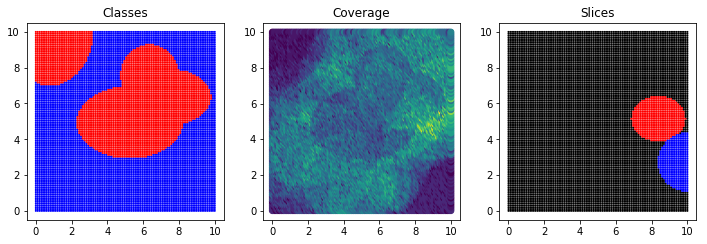

[Trial 0]
---------- Training DP ----------


/dfs/scratch0/vschen/metal-slicing-repro/metal/contrib/slicing/utils.py:33: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  L[selected, j] = flip(polarity)


Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.666, valid/accuracy=0.702
Saving model at iteration 1 with best score 0.702
[2 epo]: train/loss=0.646, valid/accuracy=0.718
Saving model at iteration 2 with best score 0.718
[3 epo]: train/loss=0.640, valid/accuracy=0.789
Saving model at iteration 3 with best score 0.789
[4 epo]: train/loss=0.629, valid/accuracy=0.847
Saving model at iteration 4 with best score 0.847
[5 epo]: train/loss=0.623, valid/accuracy=0.870
Saving model at iteration 5 with best score 0.870
[6 epo]: train/loss=0.620, valid/accuracy=0.833
[7 epo]: train/loss=0.618, valid/accuracy=0.910
Saving model at iteration 7 with best score 0.910
[

[8 epo]: train/loss=0.616, valid/accuracy=0.870
[9 epo]: train/loss=0.615, valid/accuracy=0.882
[10 epo]: train/loss=0.612, valid/accuracy=0.912
[11 epo]: train/loss=0.614, valid/accuracy=0.916
[12 epo]: train/loss=0.612, valid/accuracy=0.931
[13 epo]: train/loss=0.608, valid/accuracy=0.936
Saving model at iteration 13 with best score 0.936
[14 epo]: train/loss=0.608, valid/accuracy=0.929
[15 epo]: train/loss=0.607, valid/accuracy=0.905
[16 epo]: train/loss=0.607, valid/accuracy=0.934
[17 epo]: train/loss=0.607, valid/accuracy=0.895
[18 epo]: train/loss=0.606, valid/accuracy=0.924
[19 epo]: train/loss=0.607, valid/accuracy=0.911
[20 epo]: train/loss=0.606, valid/accuracy=0.888
[21 epo]: train/loss=0.606, valid/accuracy=0.886
[22 epo]: train/loss=0.606, valid/accuracy=0.914
[23 epo]: train/loss=0.607, valid/accuracy=0.931
[24 epo]: train/loss=0.604, valid/accuracy=0.921
[25 epo]: train/loss=0.604, valid/accuracy=0.909
[26 epo]: train/loss=0.605, valid/accuracy=0.932
[27 epo]: train/loss

[40 epo]: train/loss=0.591, valid/accuracy=0.938
Restoring best model from iteration 24 with score 0.953
Finished Training
Accuracy: 0.953
        y=1    y=2   
 l=1    857    84    
 l=2    33    1526   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Slice Weight: 0.1
Input Network: Sequential(
  (0): MLPModule(
    (input_layer): Sequential(
      (0): Lin

[1 epo]: train/loss=18.874, valid/accuracy=0.732
Saving model at iteration 1 with best score 0.732
[2 epo]: train/loss=18.294, valid/accuracy=0.835
Saving model at iteration 2 with best score 0.835
[3 epo]: train/loss=17.842, valid/accuracy=0.908
Saving model at iteration 3 with best score 0.908
[4 epo]: train/loss=17.734, valid/accuracy=0.859
[5 epo]: train/loss=17.515, valid/accuracy=0.901
[6 epo]: train/loss=17.594, valid/accuracy=0.828
[7 epo]: train/loss=17.452, valid/accuracy=0.838
[8 epo]: train/loss=17.425, valid/accuracy=0.892
[9 epo]: train/loss=17.360, valid/accuracy=0.820
[10 epo]: train/loss=17.378, valid/accuracy=0.850
[11 epo]: train/loss=17.327, valid/accuracy=0.925
Saving model at iteration 11 with best score 0.925
[12 epo]: train/loss=17.271, valid/accuracy=0.883
[13 epo]: train/loss=17.226, valid/accuracy=0.907
[14 epo]: train/loss=17.159, valid/accuracy=0.902
[15 epo]: train/loss=17.173, valid/accuracy=0.914
[16 epo]: train/loss=17.162, valid/accuracy=0.930
Saving m

[28 epo]: train/loss=16.904, valid/accuracy=0.922
[29 epo]: train/loss=16.833, valid/accuracy=0.931
[30 epo]: train/loss=16.842, valid/accuracy=0.904
[31 epo]: train/loss=16.834, valid/accuracy=0.942
[32 epo]: train/loss=16.825, valid/accuracy=0.954
Saving model at iteration 32 with best score 0.954
[33 epo]: train/loss=16.830, valid/accuracy=0.952
[34 epo]: train/loss=16.838, valid/accuracy=0.937
[35 epo]: train/loss=16.851, valid/accuracy=0.878
[36 epo]: train/loss=16.832, valid/accuracy=0.958
Saving model at iteration 36 with best score 0.958
[37 epo]: train/loss=16.835, valid/accuracy=0.949
[38 epo]: train/loss=16.809, valid/accuracy=0.935
[39 epo]: train/loss=16.798, valid/accuracy=0.916
[40 epo]: train/loss=16.762, valid/accuracy=0.929
Restoring best model from iteration 36 with score 0.958
Finished Training
Accuracy: 0.958
        y=1    y=2   
 l=1    872    69    
 l=2    35    1524   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 40/40 LFs

Networ

[1 epo]: train/loss=0.674, valid/accuracy=0.710
Saving model at iteration 1 with best score 0.710
[2 epo]: train/loss=0.646, valid/accuracy=0.741
Saving model at iteration 2 with best score 0.741
[3 epo]: train/loss=0.636, valid/accuracy=0.817
Saving model at iteration 3 with best score 0.817
[4 epo]: train/loss=0.624, valid/accuracy=0.826
Saving model at iteration 4 with best score 0.826
[5 epo]: train/loss=0.615, valid/accuracy=0.857
Saving model at iteration 5 with best score 0.857
[6 epo]: train/loss=0.611, valid/accuracy=0.864
Saving model at iteration 6 with best score 0.864
[7 epo]: train/loss=0.609, valid/accuracy=0.826
[8 epo]: train/loss=0.605, valid/accuracy=0.872
Saving model at iteration 8 with best score 0.872
[9 epo]: train/loss=0.606, valid/accuracy=0.869
[10 epo]: train/loss=0.604, valid/accuracy=0.851
[11 epo]: train/loss=0.604, valid/accuracy=0.853
[12 epo]: train/loss=0.604, valid/accuracy=0.870
[13 epo]: train/loss=0.600, valid/accuracy=0.921
Saving model at iterat

[12 epo]: train/loss=0.615, valid/accuracy=0.891
[13 epo]: train/loss=0.612, valid/accuracy=0.893
[14 epo]: train/loss=0.613, valid/accuracy=0.865
[15 epo]: train/loss=0.610, valid/accuracy=0.901
[16 epo]: train/loss=0.610, valid/accuracy=0.884
[17 epo]: train/loss=0.608, valid/accuracy=0.925
Saving model at iteration 17 with best score 0.925
[18 epo]: train/loss=0.608, valid/accuracy=0.917
[19 epo]: train/loss=0.608, valid/accuracy=0.861
[20 epo]: train/loss=0.608, valid/accuracy=0.854
[21 epo]: train/loss=0.608, valid/accuracy=0.905
[22 epo]: train/loss=0.608, valid/accuracy=0.894
[23 epo]: train/loss=0.608, valid/accuracy=0.934
Saving model at iteration 23 with best score 0.934
[24 epo]: train/loss=0.608, valid/accuracy=0.929
[25 epo]: train/loss=0.607, valid/accuracy=0.939
Saving model at iteration 25 with best score 0.939
[26 epo]: train/loss=0.605, valid/accuracy=0.896
[27 epo]: train/loss=0.605, valid/accuracy=0.871
[28 epo]: train/loss=0.605, valid/accuracy=0.919
[29 epo]: trai

---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Slice Weight: 0.1
Input Network: Sequential(
  (0): MLPModule(
    (input_layer): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
      (2): Linear(in_features=10, out_features=10, bias=True)
      (3): ReLU()
    )
  )
)
L_head: Linear(in_features=10, out_features=40, 

[3 epo]: train/loss=17.721, valid/accuracy=0.854
[4 epo]: train/loss=17.575, valid/accuracy=0.831
[5 epo]: train/loss=17.557, valid/accuracy=0.829
[6 epo]: train/loss=17.501, valid/accuracy=0.892
Saving model at iteration 6 with best score 0.892
[7 epo]: train/loss=17.466, valid/accuracy=0.849
[8 epo]: train/loss=17.461, valid/accuracy=0.902
Saving model at iteration 8 with best score 0.902
[9 epo]: train/loss=17.452, valid/accuracy=0.875
[10 epo]: train/loss=17.484, valid/accuracy=0.836
[11 epo]: train/loss=17.412, valid/accuracy=0.880
[12 epo]: train/loss=17.417, valid/accuracy=0.907
Saving model at iteration 12 with best score 0.907
[13 epo]: train/loss=17.311, valid/accuracy=0.902
[14 epo]: train/loss=17.294, valid/accuracy=0.883
[15 epo]: train/loss=17.324, valid/accuracy=0.904
[16 epo]: train/loss=17.315, valid/accuracy=0.945
Saving model at iteration 16 with best score 0.945
[17 epo]: train/loss=17.275, valid/accuracy=0.901
[18 epo]: train/loss=17.268, valid/accuracy=0.911
[19 e

[30 epo]: train/loss=16.722, valid/accuracy=0.949
[31 epo]: train/loss=16.724, valid/accuracy=0.959
Saving model at iteration 31 with best score 0.959
[32 epo]: train/loss=16.722, valid/accuracy=0.920
[33 epo]: train/loss=16.726, valid/accuracy=0.961
Saving model at iteration 33 with best score 0.961
[34 epo]: train/loss=16.727, valid/accuracy=0.944
[35 epo]: train/loss=16.675, valid/accuracy=0.951
[36 epo]: train/loss=16.671, valid/accuracy=0.945
[37 epo]: train/loss=16.677, valid/accuracy=0.944
[38 epo]: train/loss=16.684, valid/accuracy=0.954
[39 epo]: train/loss=16.681, valid/accuracy=0.943
[40 epo]: train/loss=16.668, valid/accuracy=0.956
Restoring best model from iteration 33 with score 0.961
Finished Training
Accuracy: 0.961
        y=1    y=2   
 l=1    869    72    
 l=2    26    1533   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2

[2 epo]: train/loss=0.638, valid/accuracy=0.793
[3 epo]: train/loss=0.632, valid/accuracy=0.798
[4 epo]: train/loss=0.628, valid/accuracy=0.785
[5 epo]: train/loss=0.623, valid/accuracy=0.841
Saving model at iteration 5 with best score 0.841
[6 epo]: train/loss=0.620, valid/accuracy=0.862
Saving model at iteration 6 with best score 0.862
[7 epo]: train/loss=0.615, valid/accuracy=0.829
[8 epo]: train/loss=0.609, valid/accuracy=0.837
[9 epo]: train/loss=0.608, valid/accuracy=0.850
[10 epo]: train/loss=0.609, valid/accuracy=0.854
[11 epo]: train/loss=0.607, valid/accuracy=0.858
[12 epo]: train/loss=0.606, valid/accuracy=0.765
[13 epo]: train/loss=0.611, valid/accuracy=0.753
[14 epo]: train/loss=0.605, valid/accuracy=0.780
[15 epo]: train/loss=0.606, valid/accuracy=0.790
[16 epo]: train/loss=0.605, valid/accuracy=0.798
[17 epo]: train/loss=0.605, valid/accuracy=0.818
[18 epo]: train/loss=0.605, valid/accuracy=0.784
[19 epo]: train/loss=0.604, valid/accuracy=0.850
[20 epo]: train/loss=0.604

[15 epo]: train/loss=0.606, valid/accuracy=0.897
[16 epo]: train/loss=0.605, valid/accuracy=0.883
[17 epo]: train/loss=0.606, valid/accuracy=0.840
[18 epo]: train/loss=0.606, valid/accuracy=0.879
[19 epo]: train/loss=0.605, valid/accuracy=0.912
[20 epo]: train/loss=0.605, valid/accuracy=0.890
[21 epo]: train/loss=0.605, valid/accuracy=0.911
[22 epo]: train/loss=0.605, valid/accuracy=0.926
Saving model at iteration 22 with best score 0.926
[23 epo]: train/loss=0.606, valid/accuracy=0.914
[24 epo]: train/loss=0.604, valid/accuracy=0.877
[25 epo]: train/loss=0.603, valid/accuracy=0.908
[26 epo]: train/loss=0.603, valid/accuracy=0.880
[27 epo]: train/loss=0.603, valid/accuracy=0.918
[28 epo]: train/loss=0.603, valid/accuracy=0.892
[29 epo]: train/loss=0.603, valid/accuracy=0.910
[30 epo]: train/loss=0.603, valid/accuracy=0.908
[31 epo]: train/loss=0.603, valid/accuracy=0.896
[32 epo]: train/loss=0.603, valid/accuracy=0.932
Saving model at iteration 32 with best score 0.932
[33 epo]: train/

[1 epo]: train/loss=18.752, valid/accuracy=0.726
Saving model at iteration 1 with best score 0.726
[2 epo]: train/loss=17.935, valid/accuracy=0.923
Saving model at iteration 2 with best score 0.923
[3 epo]: train/loss=17.493, valid/accuracy=0.760
[4 epo]: train/loss=17.416, valid/accuracy=0.779
[5 epo]: train/loss=17.321, valid/accuracy=0.910
[6 epo]: train/loss=17.329, valid/accuracy=0.896
[7 epo]: train/loss=17.267, valid/accuracy=0.858
[8 epo]: train/loss=17.273, valid/accuracy=0.840
[9 epo]: train/loss=17.218, valid/accuracy=0.808
[10 epo]: train/loss=17.150, valid/accuracy=0.861
[11 epo]: train/loss=17.177, valid/accuracy=0.839
[12 epo]: train/loss=17.185, valid/accuracy=0.906
[13 epo]: train/loss=17.062, valid/accuracy=0.879
[14 epo]: train/loss=17.033, valid/accuracy=0.868
[15 epo]: train/loss=17.060, valid/accuracy=0.856
[16 epo]: train/loss=17.054, valid/accuracy=0.897
[17 epo]: train/loss=17.034, valid/accuracy=0.914
[18 epo]: train/loss=17.093, valid/accuracy=0.926
Saving mo

[20 epo]: train/loss=17.157, valid/accuracy=0.912
[21 epo]: train/loss=17.168, valid/accuracy=0.943
Saving model at iteration 21 with best score 0.943
[22 epo]: train/loss=17.158, valid/accuracy=0.907
[23 epo]: train/loss=17.122, valid/accuracy=0.916
[24 epo]: train/loss=17.153, valid/accuracy=0.937
[25 epo]: train/loss=17.072, valid/accuracy=0.932
[26 epo]: train/loss=17.073, valid/accuracy=0.893
[27 epo]: train/loss=17.089, valid/accuracy=0.882
[28 epo]: train/loss=17.070, valid/accuracy=0.914
[29 epo]: train/loss=17.072, valid/accuracy=0.917
[30 epo]: train/loss=17.061, valid/accuracy=0.944
Saving model at iteration 30 with best score 0.944
[31 epo]: train/loss=17.052, valid/accuracy=0.919
[32 epo]: train/loss=17.060, valid/accuracy=0.942
[33 epo]: train/loss=17.056, valid/accuracy=0.919
[34 epo]: train/loss=17.058, valid/accuracy=0.934
[35 epo]: train/loss=17.062, valid/accuracy=0.944
[36 epo]: train/loss=17.027, valid/accuracy=0.942
[37 epo]: train/loss=17.025, valid/accuracy=0.93

---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: False
Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=40, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=2, bias=True)
  (Y_criteria): SoftCrossEntropyLoss()
)

[1 epo]: train/loss=0.660, valid/accuracy=0.776
Saving mod

[11 epo]: train/loss=0.600, valid/accuracy=0.922
[12 epo]: train/loss=0.599, valid/accuracy=0.915
[13 epo]: train/loss=0.595, valid/accuracy=0.874
[14 epo]: train/loss=0.596, valid/accuracy=0.872
[15 epo]: train/loss=0.596, valid/accuracy=0.884
[16 epo]: train/loss=0.595, valid/accuracy=0.927
Saving model at iteration 16 with best score 0.927
[17 epo]: train/loss=0.594, valid/accuracy=0.886
[18 epo]: train/loss=0.595, valid/accuracy=0.916
[19 epo]: train/loss=0.595, valid/accuracy=0.882
[20 epo]: train/loss=0.595, valid/accuracy=0.925
[21 epo]: train/loss=0.594, valid/accuracy=0.910
[22 epo]: train/loss=0.595, valid/accuracy=0.925
[23 epo]: train/loss=0.594, valid/accuracy=0.876
[24 epo]: train/loss=0.592, valid/accuracy=0.949
Saving model at iteration 24 with best score 0.949
[25 epo]: train/loss=0.592, valid/accuracy=0.922
[26 epo]: train/loss=0.592, valid/accuracy=0.921
[27 epo]: train/loss=0.593, valid/accuracy=0.944
[28 epo]: train/loss=0.592, valid/accuracy=0.952
Saving model at 

[27 epo]: train/loss=0.606, valid/accuracy=0.958
Saving model at iteration 27 with best score 0.958
[28 epo]: train/loss=0.606, valid/accuracy=0.910
[29 epo]: train/loss=0.605, valid/accuracy=0.912
[30 epo]: train/loss=0.605, valid/accuracy=0.927
[31 epo]: train/loss=0.605, valid/accuracy=0.874
[32 epo]: train/loss=0.606, valid/accuracy=0.912
[33 epo]: train/loss=0.605, valid/accuracy=0.942
[34 epo]: train/loss=0.605, valid/accuracy=0.945
[35 epo]: train/loss=0.604, valid/accuracy=0.901
[36 epo]: train/loss=0.603, valid/accuracy=0.936
[37 epo]: train/loss=0.603, valid/accuracy=0.914
[38 epo]: train/loss=0.604, valid/accuracy=0.925
[39 epo]: train/loss=0.603, valid/accuracy=0.933
[40 epo]: train/loss=0.603, valid/accuracy=0.943
Restoring best model from iteration 27 with score 0.958
Finished Training
Accuracy: 0.958
        y=1    y=2   
 l=1    897    44    
 l=2    60    1499   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:


[1 epo]: train/loss=18.751, valid/accuracy=0.757
Saving model at iteration 1 with best score 0.757
[2 epo]: train/loss=18.127, valid/accuracy=0.774
Saving model at iteration 2 with best score 0.774
[3 epo]: train/loss=17.857, valid/accuracy=0.843
Saving model at iteration 3 with best score 0.843
[4 epo]: train/loss=17.576, valid/accuracy=0.844
Saving model at iteration 4 with best score 0.844
[5 epo]: train/loss=17.415, valid/accuracy=0.882
Saving model at iteration 5 with best score 0.882
[6 epo]: train/loss=17.297, valid/accuracy=0.904
Saving model at iteration 6 with best score 0.904
[7 epo]: train/loss=17.283, valid/accuracy=0.917
Saving model at iteration 7 with best score 0.917
[8 epo]: train/loss=17.105, valid/accuracy=0.909
[9 epo]: train/loss=17.072, valid/accuracy=0.897
[10 epo]: train/loss=17.037, valid/accuracy=0.855
[11 epo]: train/loss=17.022, valid/accuracy=0.874
[12 epo]: train/loss=17.053, valid/accuracy=0.918
Saving model at iteration 12 with best score 0.918
[13 epo]

[13 epo]: train/loss=17.224, valid/accuracy=0.872
[14 epo]: train/loss=17.222, valid/accuracy=0.893
[15 epo]: train/loss=17.186, valid/accuracy=0.937
Saving model at iteration 15 with best score 0.937
[16 epo]: train/loss=17.213, valid/accuracy=0.900
[17 epo]: train/loss=17.069, valid/accuracy=0.906
[18 epo]: train/loss=17.047, valid/accuracy=0.954
Saving model at iteration 18 with best score 0.954
[19 epo]: train/loss=17.040, valid/accuracy=0.934
[20 epo]: train/loss=17.030, valid/accuracy=0.950
[21 epo]: train/loss=17.026, valid/accuracy=0.945
[22 epo]: train/loss=16.998, valid/accuracy=0.932
[23 epo]: train/loss=17.024, valid/accuracy=0.935
[24 epo]: train/loss=17.011, valid/accuracy=0.958
Saving model at iteration 24 with best score 0.958
[25 epo]: train/loss=17.012, valid/accuracy=0.946
[26 epo]: train/loss=17.033, valid/accuracy=0.930
[27 epo]: train/loss=16.998, valid/accuracy=0.925
[28 epo]: train/loss=16.956, valid/accuracy=0.944
[29 epo]: train/loss=16.932, valid/accuracy=0.9

[40 epo]: train/loss=16.902, valid/accuracy=0.928
Restoring best model from iteration 39 with score 0.931
Finished Training
Accuracy: 0.931
        y=1    y=2   
 l=1    859    82    
 l=2    90    1469   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: False
Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=40, bias=Fal

[11 epo]: train/loss=0.614, valid/accuracy=0.858
Saving model at iteration 11 with best score 0.858
[12 epo]: train/loss=0.611, valid/accuracy=0.835
[13 epo]: train/loss=0.608, valid/accuracy=0.842
[14 epo]: train/loss=0.607, valid/accuracy=0.850
[15 epo]: train/loss=0.605, valid/accuracy=0.869
Saving model at iteration 15 with best score 0.869
[16 epo]: train/loss=0.605, valid/accuracy=0.865
[17 epo]: train/loss=0.606, valid/accuracy=0.838
[18 epo]: train/loss=0.605, valid/accuracy=0.815
[19 epo]: train/loss=0.604, valid/accuracy=0.861
[20 epo]: train/loss=0.604, valid/accuracy=0.849
[21 epo]: train/loss=0.604, valid/accuracy=0.896
Saving model at iteration 21 with best score 0.896
[22 epo]: train/loss=0.604, valid/accuracy=0.828
[23 epo]: train/loss=0.603, valid/accuracy=0.856
[24 epo]: train/loss=0.601, valid/accuracy=0.879
[25 epo]: train/loss=0.601, valid/accuracy=0.890
[26 epo]: train/loss=0.600, valid/accuracy=0.850
[27 epo]: train/loss=0.600, valid/accuracy=0.863
[28 epo]: trai

[26 epo]: train/loss=0.605, valid/accuracy=0.933
Saving model at iteration 26 with best score 0.933
[27 epo]: train/loss=0.605, valid/accuracy=0.901
[28 epo]: train/loss=0.604, valid/accuracy=0.911
[29 epo]: train/loss=0.604, valid/accuracy=0.887
[30 epo]: train/loss=0.604, valid/accuracy=0.927
[31 epo]: train/loss=0.604, valid/accuracy=0.895
[32 epo]: train/loss=0.604, valid/accuracy=0.903
[33 epo]: train/loss=0.604, valid/accuracy=0.898
[34 epo]: train/loss=0.605, valid/accuracy=0.880
[35 epo]: train/loss=0.604, valid/accuracy=0.898
[36 epo]: train/loss=0.604, valid/accuracy=0.917
[37 epo]: train/loss=0.604, valid/accuracy=0.906
[38 epo]: train/loss=0.603, valid/accuracy=0.896
[39 epo]: train/loss=0.603, valid/accuracy=0.882
[40 epo]: train/loss=0.603, valid/accuracy=0.895
Restoring best model from iteration 26 with score 0.933
Finished Training
Accuracy: 0.933
        y=1    y=2   
 l=1    816    125   
 l=2    43    1516   
---------- Training SM_ON ----------
Added pepper=0.1 rand

[1 epo]: train/loss=19.119, valid/accuracy=0.680
Saving model at iteration 1 with best score 0.680
[2 epo]: train/loss=18.123, valid/accuracy=0.782
Saving model at iteration 2 with best score 0.782
[3 epo]: train/loss=17.770, valid/accuracy=0.838
Saving model at iteration 3 with best score 0.838
[4 epo]: train/loss=17.682, valid/accuracy=0.823
[5 epo]: train/loss=17.498, valid/accuracy=0.822
[6 epo]: train/loss=17.357, valid/accuracy=0.808
[7 epo]: train/loss=17.340, valid/accuracy=0.941
Saving model at iteration 7 with best score 0.941
[8 epo]: train/loss=17.325, valid/accuracy=0.854
[9 epo]: train/loss=17.269, valid/accuracy=0.768
[10 epo]: train/loss=17.210, valid/accuracy=0.908
[11 epo]: train/loss=17.244, valid/accuracy=0.914
[12 epo]: train/loss=17.211, valid/accuracy=0.826
[13 epo]: train/loss=17.098, valid/accuracy=0.871
[14 epo]: train/loss=17.127, valid/accuracy=0.906
[15 epo]: train/loss=17.058, valid/accuracy=0.885
[16 epo]: train/loss=17.062, valid/accuracy=0.880
[17 epo]:

[19 epo]: train/loss=17.127, valid/accuracy=0.869
[20 epo]: train/loss=17.130, valid/accuracy=0.898
[21 epo]: train/loss=17.134, valid/accuracy=0.833
[22 epo]: train/loss=17.118, valid/accuracy=0.950
Saving model at iteration 22 with best score 0.950
[23 epo]: train/loss=17.112, valid/accuracy=0.902
[24 epo]: train/loss=17.082, valid/accuracy=0.893
[25 epo]: train/loss=17.117, valid/accuracy=0.908
[26 epo]: train/loss=17.091, valid/accuracy=0.924
[27 epo]: train/loss=17.036, valid/accuracy=0.882
[28 epo]: train/loss=17.024, valid/accuracy=0.913
[29 epo]: train/loss=17.024, valid/accuracy=0.946
[30 epo]: train/loss=17.008, valid/accuracy=0.942
[31 epo]: train/loss=17.017, valid/accuracy=0.935
[32 epo]: train/loss=17.021, valid/accuracy=0.956
Saving model at iteration 32 with best score 0.956
[33 epo]: train/loss=17.013, valid/accuracy=0.921
[34 epo]: train/loss=17.013, valid/accuracy=0.945
[35 epo]: train/loss=17.000, valid/accuracy=0.918
[36 epo]: train/loss=17.001, valid/accuracy=0.94

[1 epo]: train/loss=0.664, valid/accuracy=0.800
Saving model at iteration 1 with best score 0.800
[2 epo]: train/loss=0.638, valid/accuracy=0.898
Saving model at iteration 2 with best score 0.898
[3 epo]: train/loss=0.621, valid/accuracy=0.837
[4 epo]: train/loss=0.621, valid/accuracy=0.838
[5 epo]: train/loss=0.616, valid/accuracy=0.831
[6 epo]: train/loss=0.615, valid/accuracy=0.832
[7 epo]: train/loss=0.614, valid/accuracy=0.896
[8 epo]: train/loss=0.615, valid/accuracy=0.898
[9 epo]: train/loss=0.614, valid/accuracy=0.914
Saving model at iteration 9 with best score 0.914
[10 epo]: train/loss=0.615, valid/accuracy=0.796
[11 epo]: train/loss=0.617, valid/accuracy=0.884
[12 epo]: train/loss=0.614, valid/accuracy=0.938
Saving model at iteration 12 with best score 0.938
[13 epo]: train/loss=0.612, valid/accuracy=0.833
[14 epo]: train/loss=0.614, valid/accuracy=0.886
[15 epo]: train/loss=0.614, valid/accuracy=0.907
[16 epo]: train/loss=0.611, valid/accuracy=0.880
[17 epo]: train/loss=0.6

[31 epo]: train/loss=0.596, valid/accuracy=0.898
[32 epo]: train/loss=0.595, valid/accuracy=0.916
[33 epo]: train/loss=0.595, valid/accuracy=0.899
[34 epo]: train/loss=0.594, valid/accuracy=0.870
[35 epo]: train/loss=0.594, valid/accuracy=0.909
[36 epo]: train/loss=0.594, valid/accuracy=0.926
[37 epo]: train/loss=0.593, valid/accuracy=0.876
[38 epo]: train/loss=0.593, valid/accuracy=0.931
[39 epo]: train/loss=0.593, valid/accuracy=0.899
[40 epo]: train/loss=0.594, valid/accuracy=0.920
Restoring best model from iteration 21 with score 0.942
Finished Training
Accuracy: 0.942
        y=1    y=2   
 l=1    876    65    
 l=2    80    1479   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
    

[1 epo]: train/loss=18.759, valid/accuracy=0.756
Saving model at iteration 1 with best score 0.756
[2 epo]: train/loss=17.863, valid/accuracy=0.822
Saving model at iteration 2 with best score 0.822
[3 epo]: train/loss=17.580, valid/accuracy=0.889
Saving model at iteration 3 with best score 0.889
[4 epo]: train/loss=17.454, valid/accuracy=0.866
[5 epo]: train/loss=17.350, valid/accuracy=0.877
[6 epo]: train/loss=17.368, valid/accuracy=0.871
[7 epo]: train/loss=17.296, valid/accuracy=0.906
Saving model at iteration 7 with best score 0.906
[8 epo]: train/loss=17.234, valid/accuracy=0.891
[9 epo]: train/loss=17.241, valid/accuracy=0.951
Saving model at iteration 9 with best score 0.951
[10 epo]: train/loss=17.174, valid/accuracy=0.878
[11 epo]: train/loss=17.179, valid/accuracy=0.921
[12 epo]: train/loss=17.211, valid/accuracy=0.881
[13 epo]: train/loss=17.093, valid/accuracy=0.908
[14 epo]: train/loss=17.086, valid/accuracy=0.942
[15 epo]: train/loss=17.076, valid/accuracy=0.950
[16 epo]:

[28 epo]: train/loss=16.729, valid/accuracy=0.954
[29 epo]: train/loss=16.723, valid/accuracy=0.948
[30 epo]: train/loss=16.715, valid/accuracy=0.965
Saving model at iteration 30 with best score 0.965
[31 epo]: train/loss=16.711, valid/accuracy=0.937
[32 epo]: train/loss=16.715, valid/accuracy=0.956
[33 epo]: train/loss=16.707, valid/accuracy=0.927
[34 epo]: train/loss=16.714, valid/accuracy=0.952
[35 epo]: train/loss=16.674, valid/accuracy=0.958
[36 epo]: train/loss=16.667, valid/accuracy=0.936
[37 epo]: train/loss=16.667, valid/accuracy=0.950
[38 epo]: train/loss=16.667, valid/accuracy=0.947
[39 epo]: train/loss=16.659, valid/accuracy=0.964
[40 epo]: train/loss=16.658, valid/accuracy=0.946
Restoring best model from iteration 30 with score 0.965
Finished Training
Accuracy: 0.965
        y=1    y=2   
 l=1    882    59    
 l=2    29    1530   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()

[1 epo]: train/loss=0.669, valid/accuracy=0.695
Saving model at iteration 1 with best score 0.695
[2 epo]: train/loss=0.649, valid/accuracy=0.743
Saving model at iteration 2 with best score 0.743
[3 epo]: train/loss=0.639, valid/accuracy=0.756
Saving model at iteration 3 with best score 0.756
[4 epo]: train/loss=0.630, valid/accuracy=0.786
Saving model at iteration 4 with best score 0.786
[5 epo]: train/loss=0.623, valid/accuracy=0.794
Saving model at iteration 5 with best score 0.794
[6 epo]: train/loss=0.622, valid/accuracy=0.769
[7 epo]: train/loss=0.617, valid/accuracy=0.796
Saving model at iteration 7 with best score 0.796
[8 epo]: train/loss=0.616, valid/accuracy=0.785
[9 epo]: train/loss=0.613, valid/accuracy=0.870
Saving model at iteration 9 with best score 0.870
[10 epo]: train/loss=0.610, valid/accuracy=0.869
[11 epo]: train/loss=0.607, valid/accuracy=0.870
[12 epo]: train/loss=0.604, valid/accuracy=0.815
[13 epo]: train/loss=0.601, valid/accuracy=0.934
Saving model at iterat

[15 epo]: train/loss=0.607, valid/accuracy=0.923
[16 epo]: train/loss=0.608, valid/accuracy=0.877
[17 epo]: train/loss=0.607, valid/accuracy=0.900
[18 epo]: train/loss=0.607, valid/accuracy=0.924
[19 epo]: train/loss=0.606, valid/accuracy=0.958
Saving model at iteration 19 with best score 0.958
[20 epo]: train/loss=0.607, valid/accuracy=0.929
[21 epo]: train/loss=0.606, valid/accuracy=0.908
[22 epo]: train/loss=0.606, valid/accuracy=0.906
[23 epo]: train/loss=0.606, valid/accuracy=0.912
[24 epo]: train/loss=0.605, valid/accuracy=0.900
[25 epo]: train/loss=0.605, valid/accuracy=0.921
[26 epo]: train/loss=0.605, valid/accuracy=0.911
[27 epo]: train/loss=0.604, valid/accuracy=0.904
[28 epo]: train/loss=0.604, valid/accuracy=0.932
[29 epo]: train/loss=0.604, valid/accuracy=0.931
[30 epo]: train/loss=0.604, valid/accuracy=0.930
[31 epo]: train/loss=0.604, valid/accuracy=0.912
[32 epo]: train/loss=0.603, valid/accuracy=0.886
[33 epo]: train/loss=0.604, valid/accuracy=0.900
[34 epo]: train/lo

[1 epo]: train/loss=18.475, valid/accuracy=0.820
Saving model at iteration 1 with best score 0.820
[2 epo]: train/loss=17.635, valid/accuracy=0.921
Saving model at iteration 2 with best score 0.921
[3 epo]: train/loss=17.555, valid/accuracy=0.885
[4 epo]: train/loss=17.353, valid/accuracy=0.812
[5 epo]: train/loss=17.261, valid/accuracy=0.906
[6 epo]: train/loss=17.279, valid/accuracy=0.848
[7 epo]: train/loss=17.209, valid/accuracy=0.858
[8 epo]: train/loss=17.182, valid/accuracy=0.878
[9 epo]: train/loss=17.167, valid/accuracy=0.854
[10 epo]: train/loss=17.167, valid/accuracy=0.854
[11 epo]: train/loss=17.115, valid/accuracy=0.898
[12 epo]: train/loss=17.161, valid/accuracy=0.886
[13 epo]: train/loss=17.058, valid/accuracy=0.940
Saving model at iteration 13 with best score 0.940
[14 epo]: train/loss=17.035, valid/accuracy=0.936
[15 epo]: train/loss=17.062, valid/accuracy=0.904
[16 epo]: train/loss=16.924, valid/accuracy=0.951
Saving model at iteration 16 with best score 0.951
[17 epo

[19 epo]: train/loss=17.389, valid/accuracy=0.833
[20 epo]: train/loss=17.294, valid/accuracy=0.848
[21 epo]: train/loss=17.298, valid/accuracy=0.861
[22 epo]: train/loss=17.335, valid/accuracy=0.819
[23 epo]: train/loss=17.290, valid/accuracy=0.843
[24 epo]: train/loss=17.291, valid/accuracy=0.807
[25 epo]: train/loss=17.230, valid/accuracy=0.836
[26 epo]: train/loss=17.216, valid/accuracy=0.842
[27 epo]: train/loss=17.233, valid/accuracy=0.869
Saving model at iteration 27 with best score 0.869
[28 epo]: train/loss=17.222, valid/accuracy=0.864
[29 epo]: train/loss=17.212, valid/accuracy=0.849
[30 epo]: train/loss=17.206, valid/accuracy=0.847
[31 epo]: train/loss=17.190, valid/accuracy=0.862
[32 epo]: train/loss=17.189, valid/accuracy=0.857
[33 epo]: train/loss=17.177, valid/accuracy=0.864
[34 epo]: train/loss=17.192, valid/accuracy=0.818
[35 epo]: train/loss=17.211, valid/accuracy=0.837
[36 epo]: train/loss=17.167, valid/accuracy=0.862
[37 epo]: train/loss=17.158, valid/accuracy=0.868

[1 epo]: train/loss=0.662, valid/accuracy=0.736
Saving model at iteration 1 with best score 0.736
[2 epo]: train/loss=0.638, valid/accuracy=0.856
Saving model at iteration 2 with best score 0.856
[3 epo]: train/loss=0.623, valid/accuracy=0.774
[4 epo]: train/loss=0.620, valid/accuracy=0.808
[5 epo]: train/loss=0.618, valid/accuracy=0.872
Saving model at iteration 5 with best score 0.872
[6 epo]: train/loss=0.616, valid/accuracy=0.870
[7 epo]: train/loss=0.613, valid/accuracy=0.766
[8 epo]: train/loss=0.614, valid/accuracy=0.863
[9 epo]: train/loss=0.614, valid/accuracy=0.860
[10 epo]: train/loss=0.612, valid/accuracy=0.883
Saving model at iteration 10 with best score 0.883
[11 epo]: train/loss=0.610, valid/accuracy=0.894
Saving model at iteration 11 with best score 0.894
[12 epo]: train/loss=0.611, valid/accuracy=0.873
[13 epo]: train/loss=0.607, valid/accuracy=0.888
[14 epo]: train/loss=0.608, valid/accuracy=0.926
Saving model at iteration 14 with best score 0.926
[15 epo]: train/loss

[30 epo]: train/loss=0.595, valid/accuracy=0.929
[31 epo]: train/loss=0.595, valid/accuracy=0.914
[32 epo]: train/loss=0.596, valid/accuracy=0.956
Saving model at iteration 32 with best score 0.956
[33 epo]: train/loss=0.595, valid/accuracy=0.925
[34 epo]: train/loss=0.595, valid/accuracy=0.943
[35 epo]: train/loss=0.594, valid/accuracy=0.906
[36 epo]: train/loss=0.594, valid/accuracy=0.950
[37 epo]: train/loss=0.594, valid/accuracy=0.959
Saving model at iteration 37 with best score 0.959
[38 epo]: train/loss=0.594, valid/accuracy=0.899
[39 epo]: train/loss=0.594, valid/accuracy=0.945
[40 epo]: train/loss=0.594, valid/accuracy=0.912
Restoring best model from iteration 37 with score 0.959
Finished Training
Accuracy: 0.959
        y=1    y=2   
 l=1    893    48    
 l=2    54    1505   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
       

[1 epo]: train/loss=19.248, valid/accuracy=0.731
Saving model at iteration 1 with best score 0.731
[2 epo]: train/loss=18.246, valid/accuracy=0.783
Saving model at iteration 2 with best score 0.783
[3 epo]: train/loss=17.785, valid/accuracy=0.918
Saving model at iteration 3 with best score 0.918
[4 epo]: train/loss=17.608, valid/accuracy=0.824
[5 epo]: train/loss=17.449, valid/accuracy=0.926
Saving model at iteration 5 with best score 0.926
[6 epo]: train/loss=17.459, valid/accuracy=0.897
[7 epo]: train/loss=17.391, valid/accuracy=0.919
[8 epo]: train/loss=17.349, valid/accuracy=0.879
[9 epo]: train/loss=17.298, valid/accuracy=0.916
[10 epo]: train/loss=17.338, valid/accuracy=0.916
[11 epo]: train/loss=17.382, valid/accuracy=0.908
[12 epo]: train/loss=17.372, valid/accuracy=0.945
Saving model at iteration 12 with best score 0.945
[13 epo]: train/loss=17.211, valid/accuracy=0.929
[14 epo]: train/loss=17.145, valid/accuracy=0.910
[15 epo]: train/loss=17.201, valid/accuracy=0.889
[16 epo]

[24 epo]: train/loss=16.905, valid/accuracy=0.928
[25 epo]: train/loss=16.886, valid/accuracy=0.913
[26 epo]: train/loss=16.893, valid/accuracy=0.926
[27 epo]: train/loss=16.895, valid/accuracy=0.923
[28 epo]: train/loss=16.873, valid/accuracy=0.921
[29 epo]: train/loss=16.860, valid/accuracy=0.950
Saving model at iteration 29 with best score 0.950
[30 epo]: train/loss=16.866, valid/accuracy=0.929
[31 epo]: train/loss=16.906, valid/accuracy=0.927
[32 epo]: train/loss=16.847, valid/accuracy=0.922
[33 epo]: train/loss=16.855, valid/accuracy=0.912
[34 epo]: train/loss=16.856, valid/accuracy=0.947
[35 epo]: train/loss=16.808, valid/accuracy=0.940
[36 epo]: train/loss=16.810, valid/accuracy=0.932
[37 epo]: train/loss=16.794, valid/accuracy=0.946
[38 epo]: train/loss=16.803, valid/accuracy=0.949
[39 epo]: train/loss=16.787, valid/accuracy=0.926
[40 epo]: train/loss=16.797, valid/accuracy=0.935
Restoring best model from iteration 29 with score 0.950
Finished Training
Accuracy: 0.950
        y

[Trial 22]
---------- Training DP ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.651, valid/accuracy=0.808
Saving model at iteration 1 with best score 0.808
[2 epo]: train/loss=0.637, valid/accuracy=0.768
[3 epo]: train/loss=0.631, valid/accuracy=0.803
[4 epo]: train/loss=0.626, valid/accuracy=0.843
Saving model at iteration 4 with best score 0.843
[5 epo]: train/loss=0.616, valid/accuracy=0.838
[6 epo]: train/loss=0.615, valid/accuracy=0.916
Saving model at iteration 6 with best score 0.916
[7 epo]: train/loss=0.612, valid/accuracy=0.809
[8 epo]: train/loss=0.609, valid/accuracy=0.868
[9 epo]: train/loss=0.609, valid/accuracy=0.844
[10 epo]: 

[7 epo]: train/loss=0.615, valid/accuracy=0.892
Saving model at iteration 7 with best score 0.892
[8 epo]: train/loss=0.617, valid/accuracy=0.861
[9 epo]: train/loss=0.613, valid/accuracy=0.817
[10 epo]: train/loss=0.612, valid/accuracy=0.914
Saving model at iteration 10 with best score 0.914
[11 epo]: train/loss=0.612, valid/accuracy=0.886
[12 epo]: train/loss=0.611, valid/accuracy=0.849
[13 epo]: train/loss=0.607, valid/accuracy=0.902
[14 epo]: train/loss=0.606, valid/accuracy=0.851
[15 epo]: train/loss=0.607, valid/accuracy=0.902
[16 epo]: train/loss=0.606, valid/accuracy=0.915
Saving model at iteration 16 with best score 0.915
[17 epo]: train/loss=0.607, valid/accuracy=0.891
[18 epo]: train/loss=0.606, valid/accuracy=0.919
Saving model at iteration 18 with best score 0.919
[19 epo]: train/loss=0.605, valid/accuracy=0.930
Saving model at iteration 19 with best score 0.930
[20 epo]: train/loss=0.605, valid/accuracy=0.914
[21 epo]: train/loss=0.605, valid/accuracy=0.908
[22 epo]: trai

[33 epo]: train/loss=0.597, valid/accuracy=0.892
[34 epo]: train/loss=0.597, valid/accuracy=0.874
[35 epo]: train/loss=0.596, valid/accuracy=0.894
[36 epo]: train/loss=0.595, valid/accuracy=0.891
[37 epo]: train/loss=0.596, valid/accuracy=0.911
[38 epo]: train/loss=0.595, valid/accuracy=0.897
[39 epo]: train/loss=0.595, valid/accuracy=0.911
[40 epo]: train/loss=0.595, valid/accuracy=0.902
Restoring best model from iteration 19 with score 0.924
Finished Training
Accuracy: 0.924
        y=1    y=2   
 l=1    795    146   
 l=2    44    1515   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
    

[1 epo]: train/loss=18.801, valid/accuracy=0.811
Saving model at iteration 1 with best score 0.811
[2 epo]: train/loss=18.079, valid/accuracy=0.787
[3 epo]: train/loss=17.883, valid/accuracy=0.851
Saving model at iteration 3 with best score 0.851
[4 epo]: train/loss=17.654, valid/accuracy=0.862
Saving model at iteration 4 with best score 0.862
[5 epo]: train/loss=17.579, valid/accuracy=0.871
Saving model at iteration 5 with best score 0.871
[6 epo]: train/loss=17.478, valid/accuracy=0.879
Saving model at iteration 6 with best score 0.879
[7 epo]: train/loss=17.402, valid/accuracy=0.845
[8 epo]: train/loss=17.453, valid/accuracy=0.886
Saving model at iteration 8 with best score 0.886
[9 epo]: train/loss=17.435, valid/accuracy=0.902
Saving model at iteration 9 with best score 0.902
[10 epo]: train/loss=17.363, valid/accuracy=0.909
Saving model at iteration 10 with best score 0.909
[11 epo]: train/loss=17.347, valid/accuracy=0.912
Saving model at iteration 11 with best score 0.912
[12 epo

[21 epo]: train/loss=16.912, valid/accuracy=0.938
[22 epo]: train/loss=16.921, valid/accuracy=0.906
[23 epo]: train/loss=16.967, valid/accuracy=0.932
[24 epo]: train/loss=16.841, valid/accuracy=0.904
[25 epo]: train/loss=16.847, valid/accuracy=0.918
[26 epo]: train/loss=16.820, valid/accuracy=0.929
[27 epo]: train/loss=16.812, valid/accuracy=0.915
[28 epo]: train/loss=16.792, valid/accuracy=0.918
[29 epo]: train/loss=16.798, valid/accuracy=0.934
[30 epo]: train/loss=16.792, valid/accuracy=0.907
[31 epo]: train/loss=16.791, valid/accuracy=0.934
[32 epo]: train/loss=16.789, valid/accuracy=0.951
Saving model at iteration 32 with best score 0.951
[33 epo]: train/loss=16.778, valid/accuracy=0.964
Saving model at iteration 33 with best score 0.964
[34 epo]: train/loss=16.770, valid/accuracy=0.951
[35 epo]: train/loss=16.728, valid/accuracy=0.944
[36 epo]: train/loss=16.717, valid/accuracy=0.944
[37 epo]: train/loss=16.735, valid/accuracy=0.928
[38 epo]: train/loss=16.718, valid/accuracy=0.94

[40 epo]: train/loss=16.863, valid/accuracy=0.945
Restoring best model from iteration 35 with score 0.969
Finished Training
Accuracy: 0.969
        y=1    y=2   
 l=1    897    44    
 l=2    33    1526   
[Trial 25]
---------- Training DP ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.670, valid/accuracy=0.703
Saving model at iteration 1 with best score 0.703
[2 epo]: train/loss=0.646, valid/accuracy=0.723
Saving model at iteration 2 with best score 0.723
[3 epo]: train/loss=0.635, valid/accuracy=0.744
Saving model at iteration 3 with best score 0.744
[4 epo]: train/loss=0.631, valid/accuracy=0.800
Saving model at iteration 4 with best score 

[15 epo]: train/loss=17.223, valid/accuracy=0.930
Saving model at iteration 15 with best score 0.930
[16 epo]: train/loss=17.229, valid/accuracy=0.903
[17 epo]: train/loss=17.205, valid/accuracy=0.907
[18 epo]: train/loss=17.237, valid/accuracy=0.873
[19 epo]: train/loss=17.204, valid/accuracy=0.928
[20 epo]: train/loss=17.214, valid/accuracy=0.842
[21 epo]: train/loss=17.220, valid/accuracy=0.914
[22 epo]: train/loss=17.187, valid/accuracy=0.896
[23 epo]: train/loss=17.188, valid/accuracy=0.853
[24 epo]: train/loss=17.146, valid/accuracy=0.899
[25 epo]: train/loss=17.132, valid/accuracy=0.898
[26 epo]: train/loss=17.129, valid/accuracy=0.900
[27 epo]: train/loss=17.134, valid/accuracy=0.926
[28 epo]: train/loss=17.125, valid/accuracy=0.907
[29 epo]: train/loss=17.103, valid/accuracy=0.912
[30 epo]: train/loss=17.119, valid/accuracy=0.916
[31 epo]: train/loss=17.104, valid/accuracy=0.919
[32 epo]: train/loss=17.112, valid/accuracy=0.930
[33 epo]: train/loss=17.119, valid/accuracy=0.916

[1 epo]: train/loss=0.673, valid/accuracy=0.801
Saving model at iteration 1 with best score 0.801
[2 epo]: train/loss=0.643, valid/accuracy=0.824
Saving model at iteration 2 with best score 0.824
[3 epo]: train/loss=0.631, valid/accuracy=0.796
[4 epo]: train/loss=0.626, valid/accuracy=0.899
Saving model at iteration 4 with best score 0.899
[5 epo]: train/loss=0.622, valid/accuracy=0.826
[6 epo]: train/loss=0.618, valid/accuracy=0.796
[7 epo]: train/loss=0.618, valid/accuracy=0.907
Saving model at iteration 7 with best score 0.907
[8 epo]: train/loss=0.616, valid/accuracy=0.810
[9 epo]: train/loss=0.620, valid/accuracy=0.922
Saving model at iteration 9 with best score 0.922
[10 epo]: train/loss=0.618, valid/accuracy=0.827
[11 epo]: train/loss=0.616, valid/accuracy=0.840
[12 epo]: train/loss=0.613, valid/accuracy=0.854
[13 epo]: train/loss=0.615, valid/accuracy=0.839
[14 epo]: train/loss=0.614, valid/accuracy=0.830
[15 epo]: train/loss=0.609, valid/accuracy=0.908
[16 epo]: train/loss=0.6

[34 epo]: train/loss=0.596, valid/accuracy=0.894
[35 epo]: train/loss=0.595, valid/accuracy=0.915
[36 epo]: train/loss=0.595, valid/accuracy=0.911
[37 epo]: train/loss=0.595, valid/accuracy=0.932
[38 epo]: train/loss=0.595, valid/accuracy=0.894
[39 epo]: train/loss=0.595, valid/accuracy=0.922
[40 epo]: train/loss=0.595, valid/accuracy=0.916
Restoring best model from iteration 17 with score 0.932
Finished Training
Accuracy: 0.932
        y=1    y=2   
 l=1    846    95    
 l=2    74    1485   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.

[1 epo]: train/loss=19.080, valid/accuracy=0.724
Saving model at iteration 1 with best score 0.724
[2 epo]: train/loss=18.116, valid/accuracy=0.829
Saving model at iteration 2 with best score 0.829
[3 epo]: train/loss=17.765, valid/accuracy=0.855
Saving model at iteration 3 with best score 0.855
[4 epo]: train/loss=17.719, valid/accuracy=0.819
[5 epo]: train/loss=17.518, valid/accuracy=0.865
Saving model at iteration 5 with best score 0.865
[6 epo]: train/loss=17.514, valid/accuracy=0.875
Saving model at iteration 6 with best score 0.875
[7 epo]: train/loss=17.473, valid/accuracy=0.893
Saving model at iteration 7 with best score 0.893
[8 epo]: train/loss=17.462, valid/accuracy=0.876
[9 epo]: train/loss=17.425, valid/accuracy=0.855
[10 epo]: train/loss=17.352, valid/accuracy=0.835
[11 epo]: train/loss=17.328, valid/accuracy=0.901
Saving model at iteration 11 with best score 0.901
[12 epo]: train/loss=17.382, valid/accuracy=0.890
[13 epo]: train/loss=17.187, valid/accuracy=0.898
[14 epo]

[25 epo]: train/loss=17.028, valid/accuracy=0.928
[26 epo]: train/loss=16.888, valid/accuracy=0.928
[27 epo]: train/loss=16.867, valid/accuracy=0.908
[28 epo]: train/loss=16.871, valid/accuracy=0.928
[29 epo]: train/loss=16.855, valid/accuracy=0.900
[30 epo]: train/loss=16.854, valid/accuracy=0.904
[31 epo]: train/loss=16.860, valid/accuracy=0.914
[32 epo]: train/loss=16.866, valid/accuracy=0.946
[33 epo]: train/loss=16.846, valid/accuracy=0.932
[34 epo]: train/loss=16.868, valid/accuracy=0.920
[35 epo]: train/loss=16.858, valid/accuracy=0.915
[36 epo]: train/loss=16.836, valid/accuracy=0.913
[37 epo]: train/loss=16.795, valid/accuracy=0.924
[38 epo]: train/loss=16.793, valid/accuracy=0.937
[39 epo]: train/loss=16.794, valid/accuracy=0.930
[40 epo]: train/loss=16.789, valid/accuracy=0.924
Restoring best model from iteration 24 with score 0.950
Finished Training
Accuracy: 0.950
        y=1    y=2   
 l=1    880    61    
 l=2    65    1494   
---------- Training SM_HAT ----------
Added 

[1 epo]: train/loss=0.655, valid/accuracy=0.743
Saving model at iteration 1 with best score 0.743
[2 epo]: train/loss=0.634, valid/accuracy=0.842
Saving model at iteration 2 with best score 0.842
[3 epo]: train/loss=0.626, valid/accuracy=0.819
[4 epo]: train/loss=0.619, valid/accuracy=0.843
Saving model at iteration 4 with best score 0.843
[5 epo]: train/loss=0.615, valid/accuracy=0.861
Saving model at iteration 5 with best score 0.861
[6 epo]: train/loss=0.616, valid/accuracy=0.865
Saving model at iteration 6 with best score 0.865
[7 epo]: train/loss=0.612, valid/accuracy=0.890
Saving model at iteration 7 with best score 0.890
[8 epo]: train/loss=0.609, valid/accuracy=0.838
[9 epo]: train/loss=0.607, valid/accuracy=0.908
Saving model at iteration 9 with best score 0.908
[10 epo]: train/loss=0.608, valid/accuracy=0.870
[11 epo]: train/loss=0.609, valid/accuracy=0.864
[12 epo]: train/loss=0.606, valid/accuracy=0.858
[13 epo]: train/loss=0.602, valid/accuracy=0.867
[14 epo]: train/loss=0

[14 epo]: train/loss=0.614, valid/accuracy=0.865
[15 epo]: train/loss=0.613, valid/accuracy=0.893
[16 epo]: train/loss=0.613, valid/accuracy=0.930
Saving model at iteration 16 with best score 0.930
[17 epo]: train/loss=0.613, valid/accuracy=0.839
[18 epo]: train/loss=0.613, valid/accuracy=0.891
[19 epo]: train/loss=0.612, valid/accuracy=0.918
[20 epo]: train/loss=0.612, valid/accuracy=0.898
[21 epo]: train/loss=0.613, valid/accuracy=0.876
[22 epo]: train/loss=0.610, valid/accuracy=0.855
[23 epo]: train/loss=0.612, valid/accuracy=0.876
[24 epo]: train/loss=0.610, valid/accuracy=0.902
[25 epo]: train/loss=0.610, valid/accuracy=0.921
[26 epo]: train/loss=0.610, valid/accuracy=0.916
[27 epo]: train/loss=0.610, valid/accuracy=0.867
[28 epo]: train/loss=0.609, valid/accuracy=0.894
[29 epo]: train/loss=0.609, valid/accuracy=0.913
[30 epo]: train/loss=0.609, valid/accuracy=0.890
[31 epo]: train/loss=0.609, valid/accuracy=0.908
[32 epo]: train/loss=0.609, valid/accuracy=0.934
Saving model at it

[1 epo]: train/loss=18.517, valid/accuracy=0.803
Saving model at iteration 1 with best score 0.803
[2 epo]: train/loss=17.995, valid/accuracy=0.830
Saving model at iteration 2 with best score 0.830
[3 epo]: train/loss=17.584, valid/accuracy=0.878
Saving model at iteration 3 with best score 0.878
[4 epo]: train/loss=17.385, valid/accuracy=0.872
[5 epo]: train/loss=17.307, valid/accuracy=0.903
Saving model at iteration 5 with best score 0.903
[6 epo]: train/loss=17.158, valid/accuracy=0.928
Saving model at iteration 6 with best score 0.928
[7 epo]: train/loss=17.123, valid/accuracy=0.919
[8 epo]: train/loss=17.098, valid/accuracy=0.883
[9 epo]: train/loss=17.109, valid/accuracy=0.911
[10 epo]: train/loss=17.091, valid/accuracy=0.930
Saving model at iteration 10 with best score 0.930
[11 epo]: train/loss=17.087, valid/accuracy=0.870
[12 epo]: train/loss=17.040, valid/accuracy=0.938
Saving model at iteration 12 with best score 0.938
[13 epo]: train/loss=16.904, valid/accuracy=0.899
[14 epo

[15 epo]: train/loss=17.105, valid/accuracy=0.943
[16 epo]: train/loss=17.096, valid/accuracy=0.895
[17 epo]: train/loss=17.087, valid/accuracy=0.922
[18 epo]: train/loss=17.081, valid/accuracy=0.936
[19 epo]: train/loss=17.088, valid/accuracy=0.924
[20 epo]: train/loss=17.071, valid/accuracy=0.964
Saving model at iteration 20 with best score 0.964
[21 epo]: train/loss=17.095, valid/accuracy=0.896
[22 epo]: train/loss=17.088, valid/accuracy=0.930
[23 epo]: train/loss=17.044, valid/accuracy=0.904
[24 epo]: train/loss=17.011, valid/accuracy=0.925
[25 epo]: train/loss=17.015, valid/accuracy=0.942
[26 epo]: train/loss=17.005, valid/accuracy=0.934
[27 epo]: train/loss=17.014, valid/accuracy=0.952
[28 epo]: train/loss=17.000, valid/accuracy=0.931
[29 epo]: train/loss=17.018, valid/accuracy=0.930
[30 epo]: train/loss=16.985, valid/accuracy=0.898
[31 epo]: train/loss=17.000, valid/accuracy=0.911
[32 epo]: train/loss=16.995, valid/accuracy=0.943
[33 epo]: train/loss=16.996, valid/accuracy=0.953

[1 epo]: train/loss=0.660, valid/accuracy=0.782
Saving model at iteration 1 with best score 0.782
[2 epo]: train/loss=0.639, valid/accuracy=0.821
Saving model at iteration 2 with best score 0.821
[3 epo]: train/loss=0.631, valid/accuracy=0.771
[4 epo]: train/loss=0.625, valid/accuracy=0.881
Saving model at iteration 4 with best score 0.881
[5 epo]: train/loss=0.622, valid/accuracy=0.801
[6 epo]: train/loss=0.617, valid/accuracy=0.858
[7 epo]: train/loss=0.616, valid/accuracy=0.844
[8 epo]: train/loss=0.616, valid/accuracy=0.825
[9 epo]: train/loss=0.611, valid/accuracy=0.866
[10 epo]: train/loss=0.610, valid/accuracy=0.923
Saving model at iteration 10 with best score 0.923
[11 epo]: train/loss=0.609, valid/accuracy=0.844
[12 epo]: train/loss=0.608, valid/accuracy=0.918
[13 epo]: train/loss=0.608, valid/accuracy=0.929
Saving model at iteration 13 with best score 0.929
[14 epo]: train/loss=0.609, valid/accuracy=0.920
[15 epo]: train/loss=0.605, valid/accuracy=0.914
[16 epo]: train/loss=0

[24 epo]: train/loss=0.596, valid/accuracy=0.895
[25 epo]: train/loss=0.595, valid/accuracy=0.894
[26 epo]: train/loss=0.596, valid/accuracy=0.896
[27 epo]: train/loss=0.595, valid/accuracy=0.934
[28 epo]: train/loss=0.595, valid/accuracy=0.918
[29 epo]: train/loss=0.595, valid/accuracy=0.938
Saving model at iteration 29 with best score 0.938
[30 epo]: train/loss=0.595, valid/accuracy=0.936
[31 epo]: train/loss=0.595, valid/accuracy=0.936
[32 epo]: train/loss=0.595, valid/accuracy=0.899
[33 epo]: train/loss=0.595, valid/accuracy=0.877
[34 epo]: train/loss=0.595, valid/accuracy=0.912
[35 epo]: train/loss=0.594, valid/accuracy=0.952
Saving model at iteration 35 with best score 0.952
[36 epo]: train/loss=0.594, valid/accuracy=0.930
[37 epo]: train/loss=0.594, valid/accuracy=0.908
[38 epo]: train/loss=0.594, valid/accuracy=0.916
[39 epo]: train/loss=0.594, valid/accuracy=0.936
[40 epo]: train/loss=0.593, valid/accuracy=0.942
Restoring best model from iteration 35 with score 0.952
Finished 

[40 epo]: train/loss=0.603, valid/accuracy=0.874
Restoring best model from iteration 27 with score 0.930
Finished Training
Accuracy: 0.930
        y=1    y=2   
 l=1    779    162   
 l=2    12    1547   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Resetting base model parameters
SliceOnlineModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=40, bias=False)
  (L_criteria): 

[3 epo]: train/loss=17.503, valid/accuracy=0.852
[4 epo]: train/loss=17.284, valid/accuracy=0.869
[5 epo]: train/loss=17.216, valid/accuracy=0.926
[6 epo]: train/loss=17.286, valid/accuracy=0.848
[7 epo]: train/loss=17.227, valid/accuracy=0.841
[8 epo]: train/loss=17.226, valid/accuracy=0.896
[9 epo]: train/loss=17.231, valid/accuracy=0.877
[10 epo]: train/loss=17.132, valid/accuracy=0.867
[11 epo]: train/loss=17.091, valid/accuracy=0.910
[12 epo]: train/loss=17.041, valid/accuracy=0.894
[13 epo]: train/loss=16.974, valid/accuracy=0.881
[14 epo]: train/loss=16.949, valid/accuracy=0.936
[15 epo]: train/loss=16.961, valid/accuracy=0.915
[16 epo]: train/loss=16.945, valid/accuracy=0.932
[17 epo]: train/loss=16.947, valid/accuracy=0.923
[18 epo]: train/loss=16.926, valid/accuracy=0.887
[19 epo]: train/loss=16.946, valid/accuracy=0.924
[20 epo]: train/loss=16.953, valid/accuracy=0.891
[21 epo]: train/loss=16.915, valid/accuracy=0.945
Saving model at iteration 21 with best score 0.945
[22 ep

[26 epo]: train/loss=17.207, valid/accuracy=0.941
[27 epo]: train/loss=17.150, valid/accuracy=0.949
Saving model at iteration 27 with best score 0.949
[28 epo]: train/loss=17.147, valid/accuracy=0.948
[29 epo]: train/loss=17.184, valid/accuracy=0.940
[30 epo]: train/loss=17.149, valid/accuracy=0.910
[31 epo]: train/loss=17.137, valid/accuracy=0.912
[32 epo]: train/loss=17.136, valid/accuracy=0.942
[33 epo]: train/loss=17.150, valid/accuracy=0.917
[34 epo]: train/loss=17.142, valid/accuracy=0.931
[35 epo]: train/loss=17.136, valid/accuracy=0.946
[36 epo]: train/loss=17.170, valid/accuracy=0.954
Saving model at iteration 36 with best score 0.954
[37 epo]: train/loss=17.128, valid/accuracy=0.957
Saving model at iteration 37 with best score 0.957
[38 epo]: train/loss=17.093, valid/accuracy=0.938
[39 epo]: train/loss=17.086, valid/accuracy=0.932
[40 epo]: train/loss=17.088, valid/accuracy=0.935
Restoring best model from iteration 37 with score 0.957
Finished Training
Accuracy: 0.957
       

[1 epo]: train/loss=0.661, valid/accuracy=0.718
Saving model at iteration 1 with best score 0.718
[2 epo]: train/loss=0.637, valid/accuracy=0.733
Saving model at iteration 2 with best score 0.733
[3 epo]: train/loss=0.626, valid/accuracy=0.853
Saving model at iteration 3 with best score 0.853
[4 epo]: train/loss=0.619, valid/accuracy=0.809
[5 epo]: train/loss=0.617, valid/accuracy=0.801
[6 epo]: train/loss=0.616, valid/accuracy=0.879
Saving model at iteration 6 with best score 0.879
[7 epo]: train/loss=0.615, valid/accuracy=0.818
[8 epo]: train/loss=0.615, valid/accuracy=0.879
Saving model at iteration 8 with best score 0.879
[9 epo]: train/loss=0.613, valid/accuracy=0.911
Saving model at iteration 9 with best score 0.911
[10 epo]: train/loss=0.613, valid/accuracy=0.876
[11 epo]: train/loss=0.615, valid/accuracy=0.874
[12 epo]: train/loss=0.613, valid/accuracy=0.923
Saving model at iteration 12 with best score 0.923
[13 epo]: train/loss=0.609, valid/accuracy=0.873
[14 epo]: train/loss=

[31 epo]: train/loss=0.601, valid/accuracy=0.901
[32 epo]: train/loss=0.602, valid/accuracy=0.895
[33 epo]: train/loss=0.601, valid/accuracy=0.906
[34 epo]: train/loss=0.602, valid/accuracy=0.870
[35 epo]: train/loss=0.600, valid/accuracy=0.892
[36 epo]: train/loss=0.600, valid/accuracy=0.912
[37 epo]: train/loss=0.600, valid/accuracy=0.890
[38 epo]: train/loss=0.600, valid/accuracy=0.920
[39 epo]: train/loss=0.600, valid/accuracy=0.896
[40 epo]: train/loss=0.600, valid/accuracy=0.890
Restoring best model from iteration 7 with score 0.940
Finished Training
Accuracy: 0.940
        y=1    y=2   
 l=1    887    54    
 l=2    96    1463   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
     

[1 epo]: train/loss=18.989, valid/accuracy=0.732
Saving model at iteration 1 with best score 0.732
[2 epo]: train/loss=18.459, valid/accuracy=0.768
Saving model at iteration 2 with best score 0.768
[3 epo]: train/loss=18.245, valid/accuracy=0.815
Saving model at iteration 3 with best score 0.815
[4 epo]: train/loss=18.205, valid/accuracy=0.832
Saving model at iteration 4 with best score 0.832
[5 epo]: train/loss=18.060, valid/accuracy=0.840
Saving model at iteration 5 with best score 0.840
[6 epo]: train/loss=17.969, valid/accuracy=0.838
[7 epo]: train/loss=17.847, valid/accuracy=0.865
Saving model at iteration 7 with best score 0.865
[8 epo]: train/loss=17.639, valid/accuracy=0.858
[9 epo]: train/loss=17.500, valid/accuracy=0.884
Saving model at iteration 9 with best score 0.884
[10 epo]: train/loss=17.383, valid/accuracy=0.887
Saving model at iteration 10 with best score 0.887
[11 epo]: train/loss=17.300, valid/accuracy=0.868
[12 epo]: train/loss=17.261, valid/accuracy=0.905
Saving m

[18 epo]: train/loss=17.041, valid/accuracy=0.938
[19 epo]: train/loss=17.067, valid/accuracy=0.899
[20 epo]: train/loss=17.010, valid/accuracy=0.940
[21 epo]: train/loss=17.008, valid/accuracy=0.929
[22 epo]: train/loss=17.025, valid/accuracy=0.905
[23 epo]: train/loss=16.985, valid/accuracy=0.916
[24 epo]: train/loss=16.936, valid/accuracy=0.940
[25 epo]: train/loss=16.936, valid/accuracy=0.923
[26 epo]: train/loss=16.925, valid/accuracy=0.934
[27 epo]: train/loss=16.912, valid/accuracy=0.945
[28 epo]: train/loss=16.931, valid/accuracy=0.942
[29 epo]: train/loss=16.932, valid/accuracy=0.911
[30 epo]: train/loss=16.909, valid/accuracy=0.928
[31 epo]: train/loss=16.906, valid/accuracy=0.940
[32 epo]: train/loss=16.914, valid/accuracy=0.934
[33 epo]: train/loss=16.904, valid/accuracy=0.927
[34 epo]: train/loss=16.915, valid/accuracy=0.932
[35 epo]: train/loss=16.870, valid/accuracy=0.936
[36 epo]: train/loss=16.877, valid/accuracy=0.950
Saving model at iteration 36 with best score 0.950

[40 epo]: train/loss=16.882, valid/accuracy=0.945
Restoring best model from iteration 33 with score 0.964
Finished Training
Accuracy: 0.964
        y=1    y=2   
 l=1    896    45    
 l=2    44    1515   
[Trial 37]
---------- Training DP ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.652, valid/accuracy=0.776
Saving model at iteration 1 with best score 0.776
[2 epo]: train/loss=0.635, valid/accuracy=0.774
[3 epo]: train/loss=0.627, valid/accuracy=0.788
Saving model at iteration 3 with best score 0.788
[4 epo]: train/loss=0.622, valid/accuracy=0.834
Saving model at iteration 4 with best score 0.834
[5 epo]: train/loss=0.621, valid/accuracy=0.

[6 epo]: train/loss=0.634, valid/accuracy=0.792
[7 epo]: train/loss=0.630, valid/accuracy=0.806
[8 epo]: train/loss=0.625, valid/accuracy=0.865
Saving model at iteration 8 with best score 0.865
[9 epo]: train/loss=0.619, valid/accuracy=0.849
[10 epo]: train/loss=0.619, valid/accuracy=0.872
Saving model at iteration 10 with best score 0.872
[11 epo]: train/loss=0.617, valid/accuracy=0.858
[12 epo]: train/loss=0.615, valid/accuracy=0.897
Saving model at iteration 12 with best score 0.897
[13 epo]: train/loss=0.610, valid/accuracy=0.881
[14 epo]: train/loss=0.610, valid/accuracy=0.859
[15 epo]: train/loss=0.610, valid/accuracy=0.905
Saving model at iteration 15 with best score 0.905
[16 epo]: train/loss=0.608, valid/accuracy=0.853
[17 epo]: train/loss=0.609, valid/accuracy=0.884
[18 epo]: train/loss=0.608, valid/accuracy=0.867
[19 epo]: train/loss=0.608, valid/accuracy=0.929
Saving model at iteration 19 with best score 0.929
[20 epo]: train/loss=0.607, valid/accuracy=0.902
[21 epo]: train

[33 epo]: train/loss=0.593, valid/accuracy=0.898
[34 epo]: train/loss=0.593, valid/accuracy=0.875
[35 epo]: train/loss=0.592, valid/accuracy=0.916
[36 epo]: train/loss=0.592, valid/accuracy=0.919
[37 epo]: train/loss=0.593, valid/accuracy=0.915
[38 epo]: train/loss=0.593, valid/accuracy=0.915
[39 epo]: train/loss=0.592, valid/accuracy=0.911
[40 epo]: train/loss=0.592, valid/accuracy=0.902
Restoring best model from iteration 24 with score 0.939
Finished Training
Accuracy: 0.939
        y=1    y=2   
 l=1    831    110   
 l=2    43    1516   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
    

[1 epo]: train/loss=18.886, valid/accuracy=0.793
Saving model at iteration 1 with best score 0.793
[2 epo]: train/loss=18.337, valid/accuracy=0.826
Saving model at iteration 2 with best score 0.826
[3 epo]: train/loss=17.981, valid/accuracy=0.876
Saving model at iteration 3 with best score 0.876
[4 epo]: train/loss=17.737, valid/accuracy=0.820
[5 epo]: train/loss=17.636, valid/accuracy=0.805
[6 epo]: train/loss=17.582, valid/accuracy=0.852
[7 epo]: train/loss=17.480, valid/accuracy=0.942
Saving model at iteration 7 with best score 0.942
[8 epo]: train/loss=17.468, valid/accuracy=0.876
[9 epo]: train/loss=17.386, valid/accuracy=0.900
[10 epo]: train/loss=17.343, valid/accuracy=0.875
[11 epo]: train/loss=17.338, valid/accuracy=0.856
[12 epo]: train/loss=17.350, valid/accuracy=0.922
[13 epo]: train/loss=17.284, valid/accuracy=0.903
[14 epo]: train/loss=17.240, valid/accuracy=0.916
[15 epo]: train/loss=17.218, valid/accuracy=0.932
[16 epo]: train/loss=17.227, valid/accuracy=0.918
[17 epo]:

[26 epo]: train/loss=16.691, valid/accuracy=0.956
[27 epo]: train/loss=16.678, valid/accuracy=0.935
[28 epo]: train/loss=16.669, valid/accuracy=0.972
Saving model at iteration 28 with best score 0.972
[29 epo]: train/loss=16.673, valid/accuracy=0.947
[30 epo]: train/loss=16.657, valid/accuracy=0.928
[31 epo]: train/loss=16.673, valid/accuracy=0.947
[32 epo]: train/loss=16.648, valid/accuracy=0.924
[33 epo]: train/loss=16.682, valid/accuracy=0.963
[34 epo]: train/loss=16.651, valid/accuracy=0.953
[35 epo]: train/loss=16.623, valid/accuracy=0.973
Saving model at iteration 35 with best score 0.973
[36 epo]: train/loss=16.627, valid/accuracy=0.950
[37 epo]: train/loss=16.615, valid/accuracy=0.948
[38 epo]: train/loss=16.623, valid/accuracy=0.968
[39 epo]: train/loss=16.617, valid/accuracy=0.960
[40 epo]: train/loss=16.616, valid/accuracy=0.972
Restoring best model from iteration 35 with score 0.973
Finished Training
Accuracy: 0.973
        y=1    y=2   
 l=1    915    26    
 l=2    41    

Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.651, valid/accuracy=0.804
Saving model at iteration 1 with best score 0.804
[2 epo]: train/loss=0.636, valid/accuracy=0.839
Saving model at iteration 2 with best score 0.839
[3 epo]: train/loss=0.630, valid/accuracy=0.799
[4 epo]: train/loss=0.626, valid/accuracy=0.838
[5 epo]: train/loss=0.622, valid/accuracy=0.858
Saving model at iteration 5 with best score 0.858
[6 epo]: train/loss=0.614, valid/accuracy=0.780
[7 epo]: train/loss=0.611, valid/accuracy=0.868
Saving model at iteration 7 with best score 0.868
[8 epo]: train/loss=0.609, valid/accuracy=0.843
[9 epo]: train/loss=0.605, valid/accuracy=0.874
Savin

[8 epo]: train/loss=0.613, valid/accuracy=0.937
Saving model at iteration 8 with best score 0.937
[9 epo]: train/loss=0.612, valid/accuracy=0.926
[10 epo]: train/loss=0.608, valid/accuracy=0.888
[11 epo]: train/loss=0.609, valid/accuracy=0.870
[12 epo]: train/loss=0.610, valid/accuracy=0.906
[13 epo]: train/loss=0.605, valid/accuracy=0.938
Saving model at iteration 13 with best score 0.938
[14 epo]: train/loss=0.604, valid/accuracy=0.930
[15 epo]: train/loss=0.604, valid/accuracy=0.916
[16 epo]: train/loss=0.603, valid/accuracy=0.917
[17 epo]: train/loss=0.604, valid/accuracy=0.903
[18 epo]: train/loss=0.604, valid/accuracy=0.929
[19 epo]: train/loss=0.604, valid/accuracy=0.906
[20 epo]: train/loss=0.604, valid/accuracy=0.897
[21 epo]: train/loss=0.604, valid/accuracy=0.948
Saving model at iteration 21 with best score 0.948
[22 epo]: train/loss=0.604, valid/accuracy=0.876
[23 epo]: train/loss=0.603, valid/accuracy=0.936
[24 epo]: train/loss=0.602, valid/accuracy=0.917
[25 epo]: train/l

[33 epo]: train/loss=0.600, valid/accuracy=0.918
[34 epo]: train/loss=0.600, valid/accuracy=0.947
[35 epo]: train/loss=0.598, valid/accuracy=0.906
[36 epo]: train/loss=0.598, valid/accuracy=0.922
[37 epo]: train/loss=0.598, valid/accuracy=0.922
[38 epo]: train/loss=0.598, valid/accuracy=0.908
[39 epo]: train/loss=0.598, valid/accuracy=0.937
[40 epo]: train/loss=0.599, valid/accuracy=0.897
Restoring best model from iteration 24 with score 0.953
Finished Training
Accuracy: 0.953
        y=1    y=2   
 l=1    855    86    
 l=2    31    1528   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
    

[1 epo]: train/loss=18.986, valid/accuracy=0.710
Saving model at iteration 1 with best score 0.710
[2 epo]: train/loss=18.350, valid/accuracy=0.776
Saving model at iteration 2 with best score 0.776
[3 epo]: train/loss=18.053, valid/accuracy=0.778
Saving model at iteration 3 with best score 0.778
[4 epo]: train/loss=17.825, valid/accuracy=0.804
Saving model at iteration 4 with best score 0.804
[5 epo]: train/loss=17.727, valid/accuracy=0.774
[6 epo]: train/loss=17.702, valid/accuracy=0.866
Saving model at iteration 6 with best score 0.866
[7 epo]: train/loss=17.518, valid/accuracy=0.793
[8 epo]: train/loss=17.501, valid/accuracy=0.854
[9 epo]: train/loss=17.434, valid/accuracy=0.906
Saving model at iteration 9 with best score 0.906
[10 epo]: train/loss=17.374, valid/accuracy=0.883
[11 epo]: train/loss=17.350, valid/accuracy=0.880
[12 epo]: train/loss=17.367, valid/accuracy=0.902
[13 epo]: train/loss=17.221, valid/accuracy=0.898
[14 epo]: train/loss=17.188, valid/accuracy=0.915
Saving mo

[26 epo]: train/loss=17.234, valid/accuracy=0.812
[27 epo]: train/loss=17.203, valid/accuracy=0.833
[28 epo]: train/loss=17.209, valid/accuracy=0.836
[29 epo]: train/loss=17.197, valid/accuracy=0.801
[30 epo]: train/loss=17.203, valid/accuracy=0.835
[31 epo]: train/loss=17.191, valid/accuracy=0.806
[32 epo]: train/loss=17.185, valid/accuracy=0.818
[33 epo]: train/loss=17.201, valid/accuracy=0.852
Saving model at iteration 33 with best score 0.852
[34 epo]: train/loss=17.183, valid/accuracy=0.810
[35 epo]: train/loss=17.162, valid/accuracy=0.824
[36 epo]: train/loss=17.158, valid/accuracy=0.842
[37 epo]: train/loss=17.154, valid/accuracy=0.826
[38 epo]: train/loss=17.152, valid/accuracy=0.820
[39 epo]: train/loss=17.145, valid/accuracy=0.833
[40 epo]: train/loss=17.168, valid/accuracy=0.842
Restoring best model from iteration 33 with score 0.852
Finished Training
Accuracy: 0.852
        y=1    y=2   
 l=1    629    312   
 l=2    58    1501   
---------- Training SM_HAT ----------
Added

[1 epo]: train/loss=0.664, valid/accuracy=0.692
Saving model at iteration 1 with best score 0.692
[2 epo]: train/loss=0.646, valid/accuracy=0.808
Saving model at iteration 2 with best score 0.808
[3 epo]: train/loss=0.635, valid/accuracy=0.807
[4 epo]: train/loss=0.629, valid/accuracy=0.792
[5 epo]: train/loss=0.623, valid/accuracy=0.848
Saving model at iteration 5 with best score 0.848
[6 epo]: train/loss=0.615, valid/accuracy=0.789
[7 epo]: train/loss=0.614, valid/accuracy=0.865
Saving model at iteration 7 with best score 0.865
[8 epo]: train/loss=0.609, valid/accuracy=0.837
[9 epo]: train/loss=0.608, valid/accuracy=0.883
Saving model at iteration 9 with best score 0.883
[10 epo]: train/loss=0.608, valid/accuracy=0.834
[11 epo]: train/loss=0.610, valid/accuracy=0.850
[12 epo]: train/loss=0.607, valid/accuracy=0.892
Saving model at iteration 12 with best score 0.892
[13 epo]: train/loss=0.600, valid/accuracy=0.899
Saving model at iteration 13 with best score 0.899
[14 epo]: train/loss

[21 epo]: train/loss=0.607, valid/accuracy=0.896
[22 epo]: train/loss=0.607, valid/accuracy=0.883
[23 epo]: train/loss=0.606, valid/accuracy=0.915
[24 epo]: train/loss=0.604, valid/accuracy=0.937
Saving model at iteration 24 with best score 0.937
[25 epo]: train/loss=0.604, valid/accuracy=0.881
[26 epo]: train/loss=0.604, valid/accuracy=0.905
[27 epo]: train/loss=0.604, valid/accuracy=0.914
[28 epo]: train/loss=0.604, valid/accuracy=0.894
[29 epo]: train/loss=0.604, valid/accuracy=0.934
[30 epo]: train/loss=0.604, valid/accuracy=0.904
[31 epo]: train/loss=0.604, valid/accuracy=0.898
[32 epo]: train/loss=0.604, valid/accuracy=0.892
[33 epo]: train/loss=0.603, valid/accuracy=0.919
[34 epo]: train/loss=0.604, valid/accuracy=0.886
[35 epo]: train/loss=0.603, valid/accuracy=0.903
[36 epo]: train/loss=0.603, valid/accuracy=0.913
[37 epo]: train/loss=0.603, valid/accuracy=0.934
[38 epo]: train/loss=0.603, valid/accuracy=0.890
[39 epo]: train/loss=0.603, valid/accuracy=0.917
[40 epo]: train/lo

[1 epo]: train/loss=18.710, valid/accuracy=0.680
Saving model at iteration 1 with best score 0.680
[2 epo]: train/loss=18.305, valid/accuracy=0.829
Saving model at iteration 2 with best score 0.829
[3 epo]: train/loss=17.972, valid/accuracy=0.855
Saving model at iteration 3 with best score 0.855
[4 epo]: train/loss=17.687, valid/accuracy=0.863
Saving model at iteration 4 with best score 0.863
[5 epo]: train/loss=17.456, valid/accuracy=0.941
Saving model at iteration 5 with best score 0.941
[6 epo]: train/loss=17.426, valid/accuracy=0.866
[7 epo]: train/loss=17.343, valid/accuracy=0.893
[8 epo]: train/loss=17.297, valid/accuracy=0.902
[9 epo]: train/loss=17.178, valid/accuracy=0.838
[10 epo]: train/loss=17.150, valid/accuracy=0.847
[11 epo]: train/loss=17.136, valid/accuracy=0.884
[12 epo]: train/loss=17.051, valid/accuracy=0.926
[13 epo]: train/loss=16.916, valid/accuracy=0.908
[14 epo]: train/loss=16.890, valid/accuracy=0.907
[15 epo]: train/loss=16.884, valid/accuracy=0.864
[16 epo]:

[21 epo]: train/loss=17.164, valid/accuracy=0.875
[22 epo]: train/loss=17.101, valid/accuracy=0.823
[23 epo]: train/loss=17.125, valid/accuracy=0.874
[24 epo]: train/loss=17.054, valid/accuracy=0.874
[25 epo]: train/loss=17.051, valid/accuracy=0.833
[26 epo]: train/loss=17.061, valid/accuracy=0.881
[27 epo]: train/loss=17.051, valid/accuracy=0.880
[28 epo]: train/loss=17.052, valid/accuracy=0.875
[29 epo]: train/loss=17.055, valid/accuracy=0.867
[30 epo]: train/loss=17.073, valid/accuracy=0.872
[31 epo]: train/loss=17.047, valid/accuracy=0.870
[32 epo]: train/loss=17.043, valid/accuracy=0.907
Saving model at iteration 32 with best score 0.907
[33 epo]: train/loss=16.997, valid/accuracy=0.922
Saving model at iteration 33 with best score 0.922
[34 epo]: train/loss=16.996, valid/accuracy=0.942
Saving model at iteration 34 with best score 0.942
[35 epo]: train/loss=16.951, valid/accuracy=0.930
[36 epo]: train/loss=16.947, valid/accuracy=0.928
[37 epo]: train/loss=16.947, valid/accuracy=0.9

[1 epo]: train/loss=0.660, valid/accuracy=0.722
Saving model at iteration 1 with best score 0.722
[2 epo]: train/loss=0.642, valid/accuracy=0.768
Saving model at iteration 2 with best score 0.768
[3 epo]: train/loss=0.635, valid/accuracy=0.802
Saving model at iteration 3 with best score 0.802
[4 epo]: train/loss=0.628, valid/accuracy=0.804
Saving model at iteration 4 with best score 0.804
[5 epo]: train/loss=0.621, valid/accuracy=0.763
[6 epo]: train/loss=0.616, valid/accuracy=0.868
Saving model at iteration 6 with best score 0.868
[7 epo]: train/loss=0.614, valid/accuracy=0.909
Saving model at iteration 7 with best score 0.909
[8 epo]: train/loss=0.612, valid/accuracy=0.830
[9 epo]: train/loss=0.612, valid/accuracy=0.875
[10 epo]: train/loss=0.612, valid/accuracy=0.854
[11 epo]: train/loss=0.611, valid/accuracy=0.824
[12 epo]: train/loss=0.611, valid/accuracy=0.912
Saving model at iteration 12 with best score 0.912
[13 epo]: train/loss=0.607, valid/accuracy=0.912
[14 epo]: train/loss=

[31 epo]: train/loss=0.596, valid/accuracy=0.939
[32 epo]: train/loss=0.595, valid/accuracy=0.960
Saving model at iteration 32 with best score 0.960
[33 epo]: train/loss=0.595, valid/accuracy=0.926
[34 epo]: train/loss=0.595, valid/accuracy=0.930
[35 epo]: train/loss=0.594, valid/accuracy=0.917
[36 epo]: train/loss=0.594, valid/accuracy=0.947
[37 epo]: train/loss=0.593, valid/accuracy=0.924
[38 epo]: train/loss=0.593, valid/accuracy=0.936
[39 epo]: train/loss=0.593, valid/accuracy=0.918
[40 epo]: train/loss=0.594, valid/accuracy=0.936
Restoring best model from iteration 32 with score 0.960
Finished Training
Accuracy: 0.960
        y=1    y=2   
 l=1    872    69    
 l=2    32    1527   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 40/40 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [

[1 epo]: train/loss=18.931, valid/accuracy=0.704
Saving model at iteration 1 with best score 0.704
[2 epo]: train/loss=18.313, valid/accuracy=0.734
Saving model at iteration 2 with best score 0.734
[3 epo]: train/loss=17.960, valid/accuracy=0.807
Saving model at iteration 3 with best score 0.807
[4 epo]: train/loss=17.780, valid/accuracy=0.836
Saving model at iteration 4 with best score 0.836
[5 epo]: train/loss=17.645, valid/accuracy=0.885
Saving model at iteration 5 with best score 0.885
[6 epo]: train/loss=17.579, valid/accuracy=0.869
[7 epo]: train/loss=17.485, valid/accuracy=0.804
[8 epo]: train/loss=17.472, valid/accuracy=0.832
[9 epo]: train/loss=17.375, valid/accuracy=0.828
[10 epo]: train/loss=17.387, valid/accuracy=0.948
Saving model at iteration 10 with best score 0.948
[11 epo]: train/loss=17.311, valid/accuracy=0.894
[12 epo]: train/loss=17.289, valid/accuracy=0.895
[13 epo]: train/loss=17.231, valid/accuracy=0.886
[14 epo]: train/loss=17.176, valid/accuracy=0.921
[15 epo]

[31 epo]: train/loss=16.783, valid/accuracy=0.942
[32 epo]: train/loss=16.795, valid/accuracy=0.935
[33 epo]: train/loss=16.779, valid/accuracy=0.923
[34 epo]: train/loss=16.777, valid/accuracy=0.920
[35 epo]: train/loss=16.738, valid/accuracy=0.916
[36 epo]: train/loss=16.746, valid/accuracy=0.930
[37 epo]: train/loss=16.735, valid/accuracy=0.944
[38 epo]: train/loss=16.735, valid/accuracy=0.918
[39 epo]: train/loss=16.742, valid/accuracy=0.928
[40 epo]: train/loss=16.725, valid/accuracy=0.919
Restoring best model from iteration 24 with score 0.949
Finished Training
Accuracy: 0.949
        y=1    y=2   
 l=1    872    69    
 l=2    59    1500   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 40/40 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (

[4 epo]: train/loss=0.615, valid/accuracy=0.871
Saving model at iteration 4 with best score 0.871
[5 epo]: train/loss=0.613, valid/accuracy=0.829
[6 epo]: train/loss=0.610, valid/accuracy=0.857
[7 epo]: train/loss=0.607, valid/accuracy=0.777
[8 epo]: train/loss=0.605, valid/accuracy=0.801
[9 epo]: train/loss=0.605, valid/accuracy=0.867
[10 epo]: train/loss=0.603, valid/accuracy=0.855
[11 epo]: train/loss=0.603, valid/accuracy=0.872
Saving model at iteration 11 with best score 0.872
[12 epo]: train/loss=0.599, valid/accuracy=0.866
[13 epo]: train/loss=0.596, valid/accuracy=0.938
Saving model at iteration 13 with best score 0.938
[14 epo]: train/loss=0.595, valid/accuracy=0.922
[15 epo]: train/loss=0.594, valid/accuracy=0.925
[16 epo]: train/loss=0.595, valid/accuracy=0.910
[17 epo]: train/loss=0.595, valid/accuracy=0.930
[18 epo]: train/loss=0.594, valid/accuracy=0.912
[19 epo]: train/loss=0.594, valid/accuracy=0.912
[20 epo]: train/loss=0.593, valid/accuracy=0.926
[21 epo]: train/loss=

[19 epo]: train/loss=0.611, valid/accuracy=0.832
[20 epo]: train/loss=0.610, valid/accuracy=0.811
[21 epo]: train/loss=0.611, valid/accuracy=0.812
[22 epo]: train/loss=0.611, valid/accuracy=0.806
[23 epo]: train/loss=0.610, valid/accuracy=0.850
[24 epo]: train/loss=0.608, valid/accuracy=0.835
[25 epo]: train/loss=0.608, valid/accuracy=0.834
[26 epo]: train/loss=0.607, valid/accuracy=0.860
[27 epo]: train/loss=0.608, valid/accuracy=0.812
[28 epo]: train/loss=0.607, valid/accuracy=0.860
[29 epo]: train/loss=0.608, valid/accuracy=0.849
[30 epo]: train/loss=0.608, valid/accuracy=0.859
[31 epo]: train/loss=0.608, valid/accuracy=0.867
Saving model at iteration 31 with best score 0.867
[32 epo]: train/loss=0.607, valid/accuracy=0.858
[33 epo]: train/loss=0.607, valid/accuracy=0.832
[34 epo]: train/loss=0.608, valid/accuracy=0.857
[35 epo]: train/loss=0.606, valid/accuracy=0.842
[36 epo]: train/loss=0.606, valid/accuracy=0.843
[37 epo]: train/loss=0.606, valid/accuracy=0.861
[38 epo]: train/lo

[1 epo]: train/loss=18.900, valid/accuracy=0.722
Saving model at iteration 1 with best score 0.722
[2 epo]: train/loss=18.024, valid/accuracy=0.823
Saving model at iteration 2 with best score 0.823
[3 epo]: train/loss=17.636, valid/accuracy=0.881
Saving model at iteration 3 with best score 0.881
[4 epo]: train/loss=17.443, valid/accuracy=0.847
[5 epo]: train/loss=17.408, valid/accuracy=0.796
[6 epo]: train/loss=17.343, valid/accuracy=0.919
Saving model at iteration 6 with best score 0.919
[7 epo]: train/loss=17.235, valid/accuracy=0.832
[8 epo]: train/loss=17.190, valid/accuracy=0.912
[9 epo]: train/loss=17.182, valid/accuracy=0.938
Saving model at iteration 9 with best score 0.938
[10 epo]: train/loss=17.121, valid/accuracy=0.879
[11 epo]: train/loss=17.179, valid/accuracy=0.879
[12 epo]: train/loss=17.095, valid/accuracy=0.907
[13 epo]: train/loss=16.958, valid/accuracy=0.904
[14 epo]: train/loss=16.975, valid/accuracy=0.879
[15 epo]: train/loss=16.968, valid/accuracy=0.908
[16 epo]:

[23 epo]: train/loss=17.207, valid/accuracy=0.876
[24 epo]: train/loss=17.189, valid/accuracy=0.906
[25 epo]: train/loss=17.163, valid/accuracy=0.929
Saving model at iteration 25 with best score 0.929
[26 epo]: train/loss=17.152, valid/accuracy=0.908
[27 epo]: train/loss=17.142, valid/accuracy=0.897
[28 epo]: train/loss=17.137, valid/accuracy=0.896
[29 epo]: train/loss=17.149, valid/accuracy=0.884
[30 epo]: train/loss=17.144, valid/accuracy=0.925
[31 epo]: train/loss=17.136, valid/accuracy=0.886
[32 epo]: train/loss=17.118, valid/accuracy=0.886
[33 epo]: train/loss=17.130, valid/accuracy=0.921
[34 epo]: train/loss=17.121, valid/accuracy=0.900
[35 epo]: train/loss=17.088, valid/accuracy=0.908
[36 epo]: train/loss=17.086, valid/accuracy=0.884
[37 epo]: train/loss=17.077, valid/accuracy=0.899
[38 epo]: train/loss=17.082, valid/accuracy=0.912
[39 epo]: train/loss=17.079, valid/accuracy=0.916
[40 epo]: train/loss=17.072, valid/accuracy=0.915
Restoring best model from iteration 25 with score

In [5]:
%%time
from collections import defaultdict

from metal.label_model import MajorityLabelVoter
from metal.utils import split_data
from metal.contrib.backends.snorkel_gm_wrapper import SnorkelLabelModel
from metal.contrib.slicing.experiment_utils import (
    create_data_loader,
    train_model,
    train_slice_dp,
    search_upweighting_models,
    eval_model
)
from metal.contrib.slicing.utils import (
    get_L_weights_from_targeting_lfs_idx,
    unipolarize
)
from metal.contrib.slicing.mixture_of_experts import train_MoE_model

NUM_SLICES = 2
K = 2
M = 20
N = 10000
unipolar = False
pepper = 0.1
print(f"Pepper: {pepper}")
# A base to add to trial number to set a unique seed for each trial
salt = 24 #np.random.randint(1e6)
print(f"Salt: {salt}")


L_kwargs = {'max_r': 7} if unipolar else {'max_r': 5} 
L_kwargs.update({
    "min_acc": 0.7
})
Z_kwargs = {'num_slices': NUM_SLICES}
L, X, Y, Z, targeting_lfs_idx = generate_dataset(K, M, N, 
                                                 L_kwargs=L_kwargs,
                                                 Z_kwargs=Z_kwargs,
                                                 unipolar=unipolar,
                                                 slice_source="maxmin",
#                                                  seed=(salt + trial),
                                                 seed = salt,
                                                 plotting=True)

L = unipolarize(L.copy())

Ls, Xs, Ys, Zs = split_data(L, X, Y, Z, splits=[0.5, 0.25, 0.25], shuffle=True)
L_train_raw = Ls[0].copy() # TEMP

NUM_TRIALS = 50
sm_hat_config["slice_kwargs"]["mask_abstains"] = False
sm_on_config["slice_kwargs"]["mask_abstains"] = False

model_configs = {
#     "UNI": uni_config,
#     "UP": up_config,
#     "MoE": moe_confi1g,
    "DP": dp_config,
    'SM_DP': sm_dp_config,
    "SM_HAT": sm_hat_config,
    "SM_ON": sm_on_config,
}

history = defaultdict(list)
for trial in range(NUM_TRIALS):
    print(f"[Trial {trial}]")
    
    for model_name, model_config in model_configs.items():
        print ("-"*10, "Training", model_name, "-"*10)    
        
        Ls[0] = L_train_raw.copy() # TEMP: Reset to unpeppered version
    
        
        # Generate weak labels
        if model_name == "UNI":
            Y_train = MajorityLabelVoter().predict_proba(Ls[0])
        else:
            label_model = SnorkelLabelModel()
            label_model.train_model(Ls[0])
            Y_train = label_model.predict_proba(Ls[0])
        # TODO: don't overwrite Y_train
        Ys[0] = Y_train

        from metal.contrib.slicing.utils import add_pepper
        Ls[0] = add_pepper(Ls[0], pepper)
        
        # Train end model
        if model_name == "UNI":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == 'UP':
            # generates weighted Y_train and overwrites overwrites Ys[0] internally
            model = search_upweighting_models(model_config, Ls, Xs, Ys, Zs, 
                                              targeting_lfs_idx, verbose=False)
        elif model_name == "MoE":
            model = train_MoE_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == "DP":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == "SM_HAT":
            model = train_model(model_config, Ls, Xs, Ys, Zs, model_key="hat")
        elif model_name == "SM_ON":
            model = train_model(model_config, Ls, Xs, Ys, Zs, model_key="online")
        elif model_name == 'SM_DP':
            model = train_slice_dp(model_config, Ls, Xs, Ys, Zs)    
        else:
            raise Exception(f"Unrecognized model_name: {model_name}")
            
        test_loader = create_data_loader(Ls, Xs, Ys, Zs, model_config, 'test')
        results = eval_model(model, test_loader, verbose=False, summary=False)

        # Save results
        history[model_name].append(results)

In [6]:
from metal.contrib.slicing.experiment_utils import parse_history

print(f"Average (n={NUM_TRIALS}):")
df = parse_history(history, NUM_SLICES)
df

Average (n=50):


,DP,SM_DP,SM_HAT,SM_ON
all,0.931120,0.943920,0.926112,0.941912
slice_0,0.928580,0.942596,0.924543,0.940135
slice_1,0.915776,0.922360,0.898634,0.926087
slice_2,0.998833,0.997167,0.992000,0.996000
slice_avg,0.947730,0.954041,0.938392,0.954074


## Bipolar LFs, No Masking

Pepper: 0.1
Salt: 24


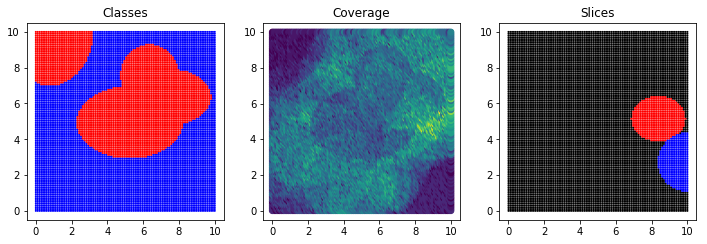

[Trial 0]
---------- Training DP ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

[1 epo]: train/loss=0.670, valid/accuracy=0.725
Saving model at iteration 1 with best score 0.725
[2 epo]: train/loss=0.646, valid/accuracy=0.737
Saving model at iteration 2 with best score 0.737
[3 epo]: train/loss=0.629, valid/accuracy=0.844
Saving model at iteration 3 with best score 0.844
[4 epo]: train/loss=0.609, valid/accuracy=0.914
Saving model at iteration 4 with best score 0.914
[5 epo]: train/loss=0.600, valid/accuracy=0.915
Saving model at iteration 5 with best score 0.915
[6 epo]: train/loss=0.594, valid/accuracy=0.786
[7 epo]: train/loss=0.588, valid/accuracy=0.868
[8 epo]:

[10 epo]: train/loss=0.607, valid/accuracy=0.832
[11 epo]: train/loss=0.604, valid/accuracy=0.854
[12 epo]: train/loss=0.606, valid/accuracy=0.855
[13 epo]: train/loss=0.599, valid/accuracy=0.854
[14 epo]: train/loss=0.597, valid/accuracy=0.852
[15 epo]: train/loss=0.596, valid/accuracy=0.857
Saving model at iteration 15 with best score 0.857
[16 epo]: train/loss=0.596, valid/accuracy=0.814
[17 epo]: train/loss=0.596, valid/accuracy=0.850
[18 epo]: train/loss=0.596, valid/accuracy=0.812
[19 epo]: train/loss=0.596, valid/accuracy=0.843
[20 epo]: train/loss=0.595, valid/accuracy=0.867
Saving model at iteration 20 with best score 0.867
[21 epo]: train/loss=0.595, valid/accuracy=0.838
[22 epo]: train/loss=0.595, valid/accuracy=0.824
[23 epo]: train/loss=0.595, valid/accuracy=0.865
[24 epo]: train/loss=0.591, valid/accuracy=0.857
[25 epo]: train/loss=0.592, valid/accuracy=0.877
Saving model at iteration 25 with best score 0.877
[26 epo]: train/loss=0.592, valid/accuracy=0.836
[27 epo]: trai

[38 epo]: train/loss=0.563, valid/accuracy=0.960
[39 epo]: train/loss=0.563, valid/accuracy=0.946
[40 epo]: train/loss=0.563, valid/accuracy=0.940
Restoring best model from iteration 31 with score 0.969
Finished Training
Accuracy: 0.969
        y=1    y=2   
 l=1    892    49    
 l=2    29    1530   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Slice Weight: 0.1
Input Network: Sequential(
  (0): MLPModule(
    (input_layer): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
      (2): Linear(in_features=10, out_features=10, bias=True)
      (3): ReLU()
    )
  )
)
L_head: Linear(in_features

[2 epo]: train/loss=18.265, valid/accuracy=0.762
[3 epo]: train/loss=17.421, valid/accuracy=0.906
Saving model at iteration 3 with best score 0.906
[4 epo]: train/loss=16.932, valid/accuracy=0.920
Saving model at iteration 4 with best score 0.920
[5 epo]: train/loss=16.840, valid/accuracy=0.864
[6 epo]: train/loss=16.940, valid/accuracy=0.904
[7 epo]: train/loss=16.768, valid/accuracy=0.919
[8 epo]: train/loss=16.718, valid/accuracy=0.892
[9 epo]: train/loss=16.701, valid/accuracy=0.872
[10 epo]: train/loss=16.737, valid/accuracy=0.876
[11 epo]: train/loss=16.777, valid/accuracy=0.894
[12 epo]: train/loss=16.678, valid/accuracy=0.872
[13 epo]: train/loss=16.741, valid/accuracy=0.915
[14 epo]: train/loss=16.504, valid/accuracy=0.921
Saving model at iteration 14 with best score 0.921
[15 epo]: train/loss=16.446, valid/accuracy=0.940
Saving model at iteration 15 with best score 0.940
[16 epo]: train/loss=16.491, valid/accuracy=0.922
[17 epo]: train/loss=16.472, valid/accuracy=0.908
[18 ep

[32 epo]: train/loss=15.765, valid/accuracy=0.967
Saving model at iteration 32 with best score 0.967
[33 epo]: train/loss=15.765, valid/accuracy=0.944
[34 epo]: train/loss=15.744, valid/accuracy=0.922
[35 epo]: train/loss=15.682, valid/accuracy=0.941
[36 epo]: train/loss=15.699, valid/accuracy=0.951
[37 epo]: train/loss=15.664, valid/accuracy=0.950
[38 epo]: train/loss=15.671, valid/accuracy=0.947
[39 epo]: train/loss=15.661, valid/accuracy=0.948
[40 epo]: train/loss=15.664, valid/accuracy=0.957
Restoring best model from iteration 32 with score 0.967
Finished Training
Accuracy: 0.967
        y=1    y=2   
 l=1    905    36    
 l=2    47    1512   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (

[1 epo]: train/loss=0.657, valid/accuracy=0.795
Saving model at iteration 1 with best score 0.795
[2 epo]: train/loss=0.632, valid/accuracy=0.844
Saving model at iteration 2 with best score 0.844
[3 epo]: train/loss=0.612, valid/accuracy=0.871
Saving model at iteration 3 with best score 0.871
[4 epo]: train/loss=0.601, valid/accuracy=0.857
[5 epo]: train/loss=0.600, valid/accuracy=0.892
Saving model at iteration 5 with best score 0.892
[6 epo]: train/loss=0.598, valid/accuracy=0.852
[7 epo]: train/loss=0.593, valid/accuracy=0.898
Saving model at iteration 7 with best score 0.898
[8 epo]: train/loss=0.600, valid/accuracy=0.837
[9 epo]: train/loss=0.591, valid/accuracy=0.934
Saving model at iteration 9 with best score 0.934
[10 epo]: train/loss=0.595, valid/accuracy=0.933
[11 epo]: train/loss=0.587, valid/accuracy=0.889
[12 epo]: train/loss=0.587, valid/accuracy=0.815
[13 epo]: train/loss=0.580, valid/accuracy=0.891
[14 epo]: train/loss=0.579, valid/accuracy=0.886
[15 epo]: train/loss=0.

[17 epo]: train/loss=0.584, valid/accuracy=0.892
[18 epo]: train/loss=0.587, valid/accuracy=0.905
[19 epo]: train/loss=0.584, valid/accuracy=0.940
Saving model at iteration 19 with best score 0.940
[20 epo]: train/loss=0.586, valid/accuracy=0.938
[21 epo]: train/loss=0.584, valid/accuracy=0.934
[22 epo]: train/loss=0.584, valid/accuracy=0.938
[23 epo]: train/loss=0.584, valid/accuracy=0.943
Saving model at iteration 23 with best score 0.943
[24 epo]: train/loss=0.581, valid/accuracy=0.942
[25 epo]: train/loss=0.580, valid/accuracy=0.927
[26 epo]: train/loss=0.581, valid/accuracy=0.942
[27 epo]: train/loss=0.581, valid/accuracy=0.924
[28 epo]: train/loss=0.580, valid/accuracy=0.944
Saving model at iteration 28 with best score 0.944
[29 epo]: train/loss=0.580, valid/accuracy=0.948
Saving model at iteration 29 with best score 0.948
[30 epo]: train/loss=0.580, valid/accuracy=0.940
[31 epo]: train/loss=0.580, valid/accuracy=0.948
Saving model at iteration 31 with best score 0.948
[32 epo]: 

---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Slice Weight: 0.1
Input Network: Sequential(
  (0): MLPModule(
    (input_layer): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
      (2): Linear(in_features=10, out_features=10, bias=True)
      (3): ReLU()
    )
  )
)
L_head: Linear(in_features=10, out_features=20, bias=False)
Y_head: Linear(in_features=20, out_features=2, bias=True)
Criteria: BCEWithLogitsLoss() SoftCrossEntropyLoss()
[1 epo]: train/loss=19.020, valid/accuracy=0.726
Saving model at iteration 1 with best score 0.726
[2 epo]: train/loss=18.249, valid/accuracy=0.741
Saving mod

[4 epo]: train/loss=17.200, valid/accuracy=0.823
Saving model at iteration 4 with best score 0.823
[5 epo]: train/loss=17.073, valid/accuracy=0.816
[6 epo]: train/loss=16.859, valid/accuracy=0.886
Saving model at iteration 6 with best score 0.886
[7 epo]: train/loss=16.861, valid/accuracy=0.884
[8 epo]: train/loss=16.758, valid/accuracy=0.941
Saving model at iteration 8 with best score 0.941
[9 epo]: train/loss=16.779, valid/accuracy=0.878
[10 epo]: train/loss=16.732, valid/accuracy=0.917
[11 epo]: train/loss=16.695, valid/accuracy=0.927
[12 epo]: train/loss=16.598, valid/accuracy=0.914
[13 epo]: train/loss=16.478, valid/accuracy=0.932
[14 epo]: train/loss=16.439, valid/accuracy=0.944
Saving model at iteration 14 with best score 0.944
[15 epo]: train/loss=16.400, valid/accuracy=0.917
[16 epo]: train/loss=16.428, valid/accuracy=0.926
[17 epo]: train/loss=16.410, valid/accuracy=0.957
Saving model at iteration 17 with best score 0.957
[18 epo]: train/loss=16.379, valid/accuracy=0.932
[19 

[32 epo]: train/loss=15.614, valid/accuracy=0.965
[33 epo]: train/loss=15.647, valid/accuracy=0.963
[34 epo]: train/loss=15.663, valid/accuracy=0.962
[35 epo]: train/loss=15.568, valid/accuracy=0.966
[36 epo]: train/loss=15.559, valid/accuracy=0.958
[37 epo]: train/loss=15.568, valid/accuracy=0.960
[38 epo]: train/loss=15.572, valid/accuracy=0.956
[39 epo]: train/loss=15.570, valid/accuracy=0.965
[40 epo]: train/loss=15.553, valid/accuracy=0.962
Restoring best model from iteration 31 with score 0.967
Finished Training
Accuracy: 0.967
        y=1    y=2   
 l=1    918    23    
 l=2    59    1500   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=Tru

[3 epo]: train/loss=0.614, valid/accuracy=0.779
[4 epo]: train/loss=0.605, valid/accuracy=0.834
[5 epo]: train/loss=0.595, valid/accuracy=0.860
Saving model at iteration 5 with best score 0.860
[6 epo]: train/loss=0.587, valid/accuracy=0.908
Saving model at iteration 6 with best score 0.908
[7 epo]: train/loss=0.584, valid/accuracy=0.893
[8 epo]: train/loss=0.582, valid/accuracy=0.923
Saving model at iteration 8 with best score 0.923
[9 epo]: train/loss=0.578, valid/accuracy=0.919
[10 epo]: train/loss=0.578, valid/accuracy=0.934
Saving model at iteration 10 with best score 0.934
[11 epo]: train/loss=0.576, valid/accuracy=0.906
[12 epo]: train/loss=0.576, valid/accuracy=0.922
[13 epo]: train/loss=0.571, valid/accuracy=0.926
[14 epo]: train/loss=0.570, valid/accuracy=0.915
[15 epo]: train/loss=0.569, valid/accuracy=0.918
[16 epo]: train/loss=0.572, valid/accuracy=0.944
Saving model at iteration 16 with best score 0.944
[17 epo]: train/loss=0.570, valid/accuracy=0.961
Saving model at iter

[18 epo]: train/loss=0.580, valid/accuracy=0.918
[19 epo]: train/loss=0.581, valid/accuracy=0.954
[20 epo]: train/loss=0.579, valid/accuracy=0.914
[21 epo]: train/loss=0.581, valid/accuracy=0.958
Saving model at iteration 21 with best score 0.958
[22 epo]: train/loss=0.579, valid/accuracy=0.960
Saving model at iteration 22 with best score 0.960
[23 epo]: train/loss=0.579, valid/accuracy=0.955
[24 epo]: train/loss=0.578, valid/accuracy=0.962
Saving model at iteration 24 with best score 0.962
[25 epo]: train/loss=0.578, valid/accuracy=0.956
[26 epo]: train/loss=0.578, valid/accuracy=0.943
[27 epo]: train/loss=0.578, valid/accuracy=0.939
[28 epo]: train/loss=0.578, valid/accuracy=0.958
[29 epo]: train/loss=0.578, valid/accuracy=0.946
[30 epo]: train/loss=0.577, valid/accuracy=0.957
[31 epo]: train/loss=0.578, valid/accuracy=0.957
[32 epo]: train/loss=0.577, valid/accuracy=0.956
[33 epo]: train/loss=0.577, valid/accuracy=0.920
[34 epo]: train/loss=0.577, valid/accuracy=0.952
[35 epo]: trai

[1 epo]: train/loss=19.088, valid/accuracy=0.723
Saving model at iteration 1 with best score 0.723
[2 epo]: train/loss=18.099, valid/accuracy=0.773
Saving model at iteration 2 with best score 0.773
[3 epo]: train/loss=17.522, valid/accuracy=0.725
[4 epo]: train/loss=17.174, valid/accuracy=0.800
Saving model at iteration 4 with best score 0.800
[5 epo]: train/loss=16.855, valid/accuracy=0.806
Saving model at iteration 5 with best score 0.806
[6 epo]: train/loss=16.630, valid/accuracy=0.861
Saving model at iteration 6 with best score 0.861
[7 epo]: train/loss=16.523, valid/accuracy=0.824
[8 epo]: train/loss=16.564, valid/accuracy=0.837
[9 epo]: train/loss=16.611, valid/accuracy=0.826
[10 epo]: train/loss=16.360, valid/accuracy=0.848
[11 epo]: train/loss=16.523, valid/accuracy=0.850
[12 epo]: train/loss=16.516, valid/accuracy=0.840
[13 epo]: train/loss=16.234, valid/accuracy=0.869
Saving model at iteration 13 with best score 0.869
[14 epo]: train/loss=16.227, valid/accuracy=0.838
[15 epo]

[21 epo]: train/loss=16.386, valid/accuracy=0.942
[22 epo]: train/loss=16.364, valid/accuracy=0.936
[23 epo]: train/loss=16.331, valid/accuracy=0.966
Saving model at iteration 23 with best score 0.966
[24 epo]: train/loss=16.292, valid/accuracy=0.930
[25 epo]: train/loss=16.272, valid/accuracy=0.958
[26 epo]: train/loss=16.281, valid/accuracy=0.966
[27 epo]: train/loss=16.267, valid/accuracy=0.958
[28 epo]: train/loss=16.284, valid/accuracy=0.968
Saving model at iteration 28 with best score 0.968
[29 epo]: train/loss=16.268, valid/accuracy=0.938
[30 epo]: train/loss=16.260, valid/accuracy=0.960
[31 epo]: train/loss=16.269, valid/accuracy=0.944
[32 epo]: train/loss=16.252, valid/accuracy=0.963
[33 epo]: train/loss=16.243, valid/accuracy=0.933
[34 epo]: train/loss=16.241, valid/accuracy=0.937
[35 epo]: train/loss=16.204, valid/accuracy=0.962
[36 epo]: train/loss=16.198, valid/accuracy=0.966
[37 epo]: train/loss=16.190, valid/accuracy=0.963
[38 epo]: train/loss=16.202, valid/accuracy=0.95

[1 epo]: train/loss=0.663, valid/accuracy=0.776
Saving model at iteration 1 with best score 0.776
[2 epo]: train/loss=0.637, valid/accuracy=0.853
Saving model at iteration 2 with best score 0.853
[3 epo]: train/loss=0.613, valid/accuracy=0.876
Saving model at iteration 3 with best score 0.876
[4 epo]: train/loss=0.604, valid/accuracy=0.834
[5 epo]: train/loss=0.600, valid/accuracy=0.862
[6 epo]: train/loss=0.598, valid/accuracy=0.950
Saving model at iteration 6 with best score 0.950
[7 epo]: train/loss=0.596, valid/accuracy=0.887
[8 epo]: train/loss=0.594, valid/accuracy=0.916
[9 epo]: train/loss=0.594, valid/accuracy=0.887
[10 epo]: train/loss=0.592, valid/accuracy=0.901
[11 epo]: train/loss=0.592, valid/accuracy=0.900
[12 epo]: train/loss=0.591, valid/accuracy=0.913
[13 epo]: train/loss=0.587, valid/accuracy=0.927
[14 epo]: train/loss=0.586, valid/accuracy=0.940
[15 epo]: train/loss=0.585, valid/accuracy=0.959
Saving model at iteration 15 with best score 0.959
[16 epo]: train/loss=0.

[28 epo]: train/loss=0.570, valid/accuracy=0.959
[29 epo]: train/loss=0.570, valid/accuracy=0.965
[30 epo]: train/loss=0.570, valid/accuracy=0.962
[31 epo]: train/loss=0.571, valid/accuracy=0.951
[32 epo]: train/loss=0.571, valid/accuracy=0.958
[33 epo]: train/loss=0.570, valid/accuracy=0.966
Saving model at iteration 33 with best score 0.966
[34 epo]: train/loss=0.571, valid/accuracy=0.960
[35 epo]: train/loss=0.570, valid/accuracy=0.964
[36 epo]: train/loss=0.570, valid/accuracy=0.964
[37 epo]: train/loss=0.569, valid/accuracy=0.964
[38 epo]: train/loss=0.569, valid/accuracy=0.969
Saving model at iteration 38 with best score 0.969
[39 epo]: train/loss=0.570, valid/accuracy=0.968
[40 epo]: train/loss=0.569, valid/accuracy=0.957
Restoring best model from iteration 38 with score 0.969
Finished Training
Accuracy: 0.969
        y=1    y=2   
 l=1    907    34    
 l=2    44    1515   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighti

[1 epo]: train/loss=19.034, valid/accuracy=0.728
Saving model at iteration 1 with best score 0.728
[2 epo]: train/loss=18.034, valid/accuracy=0.760
Saving model at iteration 2 with best score 0.760
[3 epo]: train/loss=17.494, valid/accuracy=0.795
Saving model at iteration 3 with best score 0.795
[4 epo]: train/loss=17.127, valid/accuracy=0.822
Saving model at iteration 4 with best score 0.822
[5 epo]: train/loss=17.007, valid/accuracy=0.914
Saving model at iteration 5 with best score 0.914
[6 epo]: train/loss=16.944, valid/accuracy=0.866
[7 epo]: train/loss=16.863, valid/accuracy=0.820
[8 epo]: train/loss=16.877, valid/accuracy=0.840
[9 epo]: train/loss=16.727, valid/accuracy=0.824
[10 epo]: train/loss=16.757, valid/accuracy=0.882
[11 epo]: train/loss=16.639, valid/accuracy=0.881
[12 epo]: train/loss=16.639, valid/accuracy=0.940
Saving model at iteration 12 with best score 0.940
[13 epo]: train/loss=16.468, valid/accuracy=0.930
[14 epo]: train/loss=16.389, valid/accuracy=0.941
Saving m

[28 epo]: train/loss=15.782, valid/accuracy=0.962
[29 epo]: train/loss=15.767, valid/accuracy=0.957
[30 epo]: train/loss=15.771, valid/accuracy=0.962
[31 epo]: train/loss=15.776, valid/accuracy=0.961
[32 epo]: train/loss=15.774, valid/accuracy=0.944
[33 epo]: train/loss=15.780, valid/accuracy=0.968
[34 epo]: train/loss=15.750, valid/accuracy=0.965
[35 epo]: train/loss=15.779, valid/accuracy=0.952
[36 epo]: train/loss=15.697, valid/accuracy=0.966
[37 epo]: train/loss=15.698, valid/accuracy=0.956
[38 epo]: train/loss=15.700, valid/accuracy=0.956
[39 epo]: train/loss=15.698, valid/accuracy=0.962
[40 epo]: train/loss=15.692, valid/accuracy=0.956
Restoring best model from iteration 26 with score 0.968
Finished Training
Accuracy: 0.968
        y=1    y=2   
 l=1    896    45    
 l=2    35    1524   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, o

[1 epo]: train/loss=0.655, valid/accuracy=0.790
Saving model at iteration 1 with best score 0.790
[2 epo]: train/loss=0.634, valid/accuracy=0.842
Saving model at iteration 2 with best score 0.842
[3 epo]: train/loss=0.612, valid/accuracy=0.900
Saving model at iteration 3 with best score 0.900
[4 epo]: train/loss=0.604, valid/accuracy=0.865
[5 epo]: train/loss=0.595, valid/accuracy=0.884
[6 epo]: train/loss=0.588, valid/accuracy=0.943
Saving model at iteration 6 with best score 0.943
[7 epo]: train/loss=0.585, valid/accuracy=0.846
[8 epo]: train/loss=0.587, valid/accuracy=0.924
[9 epo]: train/loss=0.580, valid/accuracy=0.913
[10 epo]: train/loss=0.576, valid/accuracy=0.896
[11 epo]: train/loss=0.582, valid/accuracy=0.869
[12 epo]: train/loss=0.576, valid/accuracy=0.941
[13 epo]: train/loss=0.572, valid/accuracy=0.918
[14 epo]: train/loss=0.572, valid/accuracy=0.938
[15 epo]: train/loss=0.571, valid/accuracy=0.921
[16 epo]: train/loss=0.569, valid/accuracy=0.928
[17 epo]: train/loss=0.56

[20 epo]: train/loss=0.613, valid/accuracy=0.851
[21 epo]: train/loss=0.613, valid/accuracy=0.858
[22 epo]: train/loss=0.613, valid/accuracy=0.852
[23 epo]: train/loss=0.614, valid/accuracy=0.861
[24 epo]: train/loss=0.613, valid/accuracy=0.855
[25 epo]: train/loss=0.613, valid/accuracy=0.844
[26 epo]: train/loss=0.613, valid/accuracy=0.868
Saving model at iteration 26 with best score 0.868
[27 epo]: train/loss=0.613, valid/accuracy=0.845
[28 epo]: train/loss=0.612, valid/accuracy=0.852
[29 epo]: train/loss=0.613, valid/accuracy=0.864
[30 epo]: train/loss=0.612, valid/accuracy=0.856
[31 epo]: train/loss=0.612, valid/accuracy=0.855
[32 epo]: train/loss=0.612, valid/accuracy=0.848
[33 epo]: train/loss=0.612, valid/accuracy=0.858
[34 epo]: train/loss=0.612, valid/accuracy=0.847
[35 epo]: train/loss=0.612, valid/accuracy=0.858
[36 epo]: train/loss=0.612, valid/accuracy=0.859
[37 epo]: train/loss=0.612, valid/accuracy=0.849
[38 epo]: train/loss=0.611, valid/accuracy=0.856
[39 epo]: train/lo

[1 epo]: train/loss=18.942, valid/accuracy=0.741
Saving model at iteration 1 with best score 0.741
[2 epo]: train/loss=18.131, valid/accuracy=0.838
Saving model at iteration 2 with best score 0.838
[3 epo]: train/loss=17.744, valid/accuracy=0.774
[4 epo]: train/loss=17.680, valid/accuracy=0.829
[5 epo]: train/loss=17.567, valid/accuracy=0.865
Saving model at iteration 5 with best score 0.865
[6 epo]: train/loss=17.568, valid/accuracy=0.813
[7 epo]: train/loss=17.645, valid/accuracy=0.805
[8 epo]: train/loss=17.492, valid/accuracy=0.852
[9 epo]: train/loss=17.436, valid/accuracy=0.832
[10 epo]: train/loss=17.464, valid/accuracy=0.868
Saving model at iteration 10 with best score 0.868
[11 epo]: train/loss=17.418, valid/accuracy=0.824
[12 epo]: train/loss=17.317, valid/accuracy=0.837
[13 epo]: train/loss=17.249, valid/accuracy=0.842
[14 epo]: train/loss=17.235, valid/accuracy=0.870
Saving model at iteration 14 with best score 0.870
[15 epo]: train/loss=17.196, valid/accuracy=0.830
[16 epo

[17 epo]: train/loss=16.313, valid/accuracy=0.957
[18 epo]: train/loss=16.236, valid/accuracy=0.948
[19 epo]: train/loss=16.239, valid/accuracy=0.951
[20 epo]: train/loss=16.235, valid/accuracy=0.958
[21 epo]: train/loss=16.245, valid/accuracy=0.941
[22 epo]: train/loss=16.194, valid/accuracy=0.951
[23 epo]: train/loss=16.206, valid/accuracy=0.955
[24 epo]: train/loss=16.181, valid/accuracy=0.946
[25 epo]: train/loss=16.143, valid/accuracy=0.961
[26 epo]: train/loss=16.092, valid/accuracy=0.934
[27 epo]: train/loss=16.099, valid/accuracy=0.949
[28 epo]: train/loss=16.094, valid/accuracy=0.964
Saving model at iteration 28 with best score 0.964
[29 epo]: train/loss=16.104, valid/accuracy=0.962
[30 epo]: train/loss=16.082, valid/accuracy=0.966
Saving model at iteration 30 with best score 0.966
[31 epo]: train/loss=16.067, valid/accuracy=0.956
[32 epo]: train/loss=16.070, valid/accuracy=0.956
[33 epo]: train/loss=16.085, valid/accuracy=0.964
[34 epo]: train/loss=16.071, valid/accuracy=0.95

[1 epo]: train/loss=0.678, valid/accuracy=0.773
Saving model at iteration 1 with best score 0.773
[2 epo]: train/loss=0.637, valid/accuracy=0.849
Saving model at iteration 2 with best score 0.849
[3 epo]: train/loss=0.621, valid/accuracy=0.836
[4 epo]: train/loss=0.609, valid/accuracy=0.817
[5 epo]: train/loss=0.607, valid/accuracy=0.816
[6 epo]: train/loss=0.603, valid/accuracy=0.842
[7 epo]: train/loss=0.604, valid/accuracy=0.899
Saving model at iteration 7 with best score 0.899
[8 epo]: train/loss=0.598, valid/accuracy=0.903
Saving model at iteration 8 with best score 0.903
[9 epo]: train/loss=0.601, valid/accuracy=0.910
Saving model at iteration 9 with best score 0.910
[10 epo]: train/loss=0.599, valid/accuracy=0.912
Saving model at iteration 10 with best score 0.912
[11 epo]: train/loss=0.598, valid/accuracy=0.878
[12 epo]: train/loss=0.597, valid/accuracy=0.916
Saving model at iteration 12 with best score 0.916
[13 epo]: train/loss=0.592, valid/accuracy=0.890
[14 epo]: train/loss

[29 epo]: train/loss=0.567, valid/accuracy=0.942
[30 epo]: train/loss=0.566, valid/accuracy=0.934
[31 epo]: train/loss=0.566, valid/accuracy=0.921
[32 epo]: train/loss=0.567, valid/accuracy=0.921
[33 epo]: train/loss=0.566, valid/accuracy=0.932
[34 epo]: train/loss=0.566, valid/accuracy=0.936
[35 epo]: train/loss=0.565, valid/accuracy=0.927
[36 epo]: train/loss=0.565, valid/accuracy=0.937
[37 epo]: train/loss=0.565, valid/accuracy=0.934
[38 epo]: train/loss=0.565, valid/accuracy=0.932
[39 epo]: train/loss=0.564, valid/accuracy=0.921
[40 epo]: train/loss=0.565, valid/accuracy=0.934
Restoring best model from iteration 16 with score 0.956
Finished Training
Accuracy: 0.956
        y=1    y=2   
 l=1    891    50    
 l=2    61    1498   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
     

[1 epo]: train/loss=18.980, valid/accuracy=0.823
Saving model at iteration 1 with best score 0.823
[2 epo]: train/loss=17.880, valid/accuracy=0.912
Saving model at iteration 2 with best score 0.912
[3 epo]: train/loss=17.292, valid/accuracy=0.896
[4 epo]: train/loss=17.044, valid/accuracy=0.902
[5 epo]: train/loss=16.858, valid/accuracy=0.874
[6 epo]: train/loss=16.854, valid/accuracy=0.905
[7 epo]: train/loss=16.788, valid/accuracy=0.869
[8 epo]: train/loss=16.745, valid/accuracy=0.908
[9 epo]: train/loss=16.740, valid/accuracy=0.882
[10 epo]: train/loss=16.668, valid/accuracy=0.886
[11 epo]: train/loss=16.622, valid/accuracy=0.922
Saving model at iteration 11 with best score 0.922
[12 epo]: train/loss=16.593, valid/accuracy=0.917
[13 epo]: train/loss=16.474, valid/accuracy=0.939
Saving model at iteration 13 with best score 0.939
[14 epo]: train/loss=16.471, valid/accuracy=0.927
[15 epo]: train/loss=16.480, valid/accuracy=0.884
[16 epo]: train/loss=16.440, valid/accuracy=0.940
Saving 

[31 epo]: train/loss=15.838, valid/accuracy=0.950
[32 epo]: train/loss=15.820, valid/accuracy=0.941
[33 epo]: train/loss=15.783, valid/accuracy=0.958
Saving model at iteration 33 with best score 0.958
[34 epo]: train/loss=15.801, valid/accuracy=0.950
[35 epo]: train/loss=15.734, valid/accuracy=0.952
[36 epo]: train/loss=15.735, valid/accuracy=0.954
[37 epo]: train/loss=15.730, valid/accuracy=0.964
Saving model at iteration 37 with best score 0.964
[38 epo]: train/loss=15.719, valid/accuracy=0.963
[39 epo]: train/loss=15.722, valid/accuracy=0.947
[40 epo]: train/loss=15.704, valid/accuracy=0.953
Restoring best model from iteration 37 with score 0.964
Finished Training
Accuracy: 0.964
        y=1    y=2   
 l=1    902    39    
 l=2    52    1507   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
 

[1 epo]: train/loss=0.671, valid/accuracy=0.703
Saving model at iteration 1 with best score 0.703
[2 epo]: train/loss=0.648, valid/accuracy=0.825
Saving model at iteration 2 with best score 0.825
[3 epo]: train/loss=0.633, valid/accuracy=0.879
Saving model at iteration 3 with best score 0.879
[4 epo]: train/loss=0.613, valid/accuracy=0.927
Saving model at iteration 4 with best score 0.927
[5 epo]: train/loss=0.602, valid/accuracy=0.834
[6 epo]: train/loss=0.607, valid/accuracy=0.928
Saving model at iteration 6 with best score 0.928
[7 epo]: train/loss=0.598, valid/accuracy=0.897
[8 epo]: train/loss=0.592, valid/accuracy=0.916
[9 epo]: train/loss=0.596, valid/accuracy=0.915
[10 epo]: train/loss=0.593, valid/accuracy=0.841
[11 epo]: train/loss=0.593, valid/accuracy=0.875
[12 epo]: train/loss=0.589, valid/accuracy=0.928
Saving model at iteration 12 with best score 0.928
[13 epo]: train/loss=0.583, valid/accuracy=0.903
[14 epo]: train/loss=0.583, valid/accuracy=0.931
Saving model at iterat

[17 epo]: train/loss=0.583, valid/accuracy=0.910
[18 epo]: train/loss=0.583, valid/accuracy=0.952
Saving model at iteration 18 with best score 0.952
[19 epo]: train/loss=0.583, valid/accuracy=0.950
[20 epo]: train/loss=0.582, valid/accuracy=0.946
[21 epo]: train/loss=0.582, valid/accuracy=0.952
[22 epo]: train/loss=0.581, valid/accuracy=0.905
[23 epo]: train/loss=0.580, valid/accuracy=0.952
[24 epo]: train/loss=0.578, valid/accuracy=0.940
[25 epo]: train/loss=0.578, valid/accuracy=0.956
Saving model at iteration 25 with best score 0.956
[26 epo]: train/loss=0.578, valid/accuracy=0.956
[27 epo]: train/loss=0.578, valid/accuracy=0.947
[28 epo]: train/loss=0.578, valid/accuracy=0.951
[29 epo]: train/loss=0.577, valid/accuracy=0.933
[30 epo]: train/loss=0.578, valid/accuracy=0.926
[31 epo]: train/loss=0.578, valid/accuracy=0.944
[32 epo]: train/loss=0.578, valid/accuracy=0.922
[33 epo]: train/loss=0.579, valid/accuracy=0.942
[34 epo]: train/loss=0.579, valid/accuracy=0.921
[35 epo]: train/

---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Slice Weight: 0.1
Input Network: Sequential(
  (0): MLPModule(
    (input_layer): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
      (2): Linear(in_features=10, out_features=10, bias=True)
      (3): ReLU()
    )
  )
)
L_head: Linear(in_features=10, out_features=20, bias=False)
Y_head: Linear(in_features=20, out_features=2, bias=True)
Criteria: BCEWithLogitsLoss() SoftCrossEntropyLoss()
[1 epo]: train/loss=18.542, valid/accuracy=0.770
Saving model at iteration 1 with best score 0.770
[2 epo]: train/loss=17.960, valid/accuracy=0.732
[3 epo]: t

[4 epo]: train/loss=17.189, valid/accuracy=0.830
[5 epo]: train/loss=17.081, valid/accuracy=0.868
[6 epo]: train/loss=16.888, valid/accuracy=0.870
[7 epo]: train/loss=16.797, valid/accuracy=0.868
[8 epo]: train/loss=16.872, valid/accuracy=0.875
[9 epo]: train/loss=16.742, valid/accuracy=0.936
Saving model at iteration 9 with best score 0.936
[10 epo]: train/loss=16.717, valid/accuracy=0.938
Saving model at iteration 10 with best score 0.938
[11 epo]: train/loss=16.627, valid/accuracy=0.945
Saving model at iteration 11 with best score 0.945
[12 epo]: train/loss=16.612, valid/accuracy=0.914
[13 epo]: train/loss=16.490, valid/accuracy=0.934
[14 epo]: train/loss=16.442, valid/accuracy=0.935
[15 epo]: train/loss=16.425, valid/accuracy=0.933
[16 epo]: train/loss=16.406, valid/accuracy=0.946
Saving model at iteration 16 with best score 0.946
[17 epo]: train/loss=16.472, valid/accuracy=0.932
[18 epo]: train/loss=16.382, valid/accuracy=0.912
[19 epo]: train/loss=16.434, valid/accuracy=0.933
[20

[30 epo]: train/loss=15.839, valid/accuracy=0.945
[31 epo]: train/loss=15.826, valid/accuracy=0.939
[32 epo]: train/loss=15.820, valid/accuracy=0.952
[33 epo]: train/loss=15.813, valid/accuracy=0.950
[34 epo]: train/loss=15.862, valid/accuracy=0.947
[35 epo]: train/loss=15.790, valid/accuracy=0.957
Saving model at iteration 35 with best score 0.957
[36 epo]: train/loss=15.778, valid/accuracy=0.963
Saving model at iteration 36 with best score 0.963
[37 epo]: train/loss=15.778, valid/accuracy=0.950
[38 epo]: train/loss=15.784, valid/accuracy=0.951
[39 epo]: train/loss=15.740, valid/accuracy=0.956
[40 epo]: train/loss=15.755, valid/accuracy=0.952
Restoring best model from iteration 36 with score 0.963
Finished Training
Accuracy: 0.963
        y=1    y=2   
 l=1    877    64    
 l=2    28    1531   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2,

[1 epo]: train/loss=0.674, valid/accuracy=0.624
Saving model at iteration 1 with best score 0.624
[2 epo]: train/loss=0.644, valid/accuracy=0.788
Saving model at iteration 2 with best score 0.788
[3 epo]: train/loss=0.628, valid/accuracy=0.819
Saving model at iteration 3 with best score 0.819
[4 epo]: train/loss=0.617, valid/accuracy=0.840
Saving model at iteration 4 with best score 0.840
[5 epo]: train/loss=0.606, valid/accuracy=0.830
[6 epo]: train/loss=0.601, valid/accuracy=0.909
Saving model at iteration 6 with best score 0.909
[7 epo]: train/loss=0.592, valid/accuracy=0.856
[8 epo]: train/loss=0.595, valid/accuracy=0.911
Saving model at iteration 8 with best score 0.911
[9 epo]: train/loss=0.586, valid/accuracy=0.899
[10 epo]: train/loss=0.589, valid/accuracy=0.888
[11 epo]: train/loss=0.585, valid/accuracy=0.918
Saving model at iteration 11 with best score 0.918
[12 epo]: train/loss=0.581, valid/accuracy=0.871
[13 epo]: train/loss=0.578, valid/accuracy=0.911
[14 epo]: train/loss=

[21 epo]: train/loss=0.580, valid/accuracy=0.965
Saving model at iteration 21 with best score 0.965
[22 epo]: train/loss=0.580, valid/accuracy=0.923
[23 epo]: train/loss=0.581, valid/accuracy=0.929
[24 epo]: train/loss=0.577, valid/accuracy=0.959
[25 epo]: train/loss=0.577, valid/accuracy=0.916
[26 epo]: train/loss=0.577, valid/accuracy=0.944
[27 epo]: train/loss=0.577, valid/accuracy=0.962
[28 epo]: train/loss=0.577, valid/accuracy=0.954
[29 epo]: train/loss=0.577, valid/accuracy=0.925
[30 epo]: train/loss=0.577, valid/accuracy=0.951
[31 epo]: train/loss=0.578, valid/accuracy=0.939
[32 epo]: train/loss=0.577, valid/accuracy=0.959
[33 epo]: train/loss=0.577, valid/accuracy=0.926
[34 epo]: train/loss=0.576, valid/accuracy=0.953
[35 epo]: train/loss=0.575, valid/accuracy=0.960
[36 epo]: train/loss=0.576, valid/accuracy=0.957
[37 epo]: train/loss=0.575, valid/accuracy=0.957
[38 epo]: train/loss=0.575, valid/accuracy=0.954
[39 epo]: train/loss=0.576, valid/accuracy=0.957
[40 epo]: train/lo

[1 epo]: train/loss=18.652, valid/accuracy=0.805
Saving model at iteration 1 with best score 0.805
[2 epo]: train/loss=17.554, valid/accuracy=0.850
Saving model at iteration 2 with best score 0.850
[3 epo]: train/loss=17.063, valid/accuracy=0.815
[4 epo]: train/loss=16.916, valid/accuracy=0.890
Saving model at iteration 4 with best score 0.890
[5 epo]: train/loss=16.710, valid/accuracy=0.851
[6 epo]: train/loss=16.523, valid/accuracy=0.942
Saving model at iteration 6 with best score 0.942
[7 epo]: train/loss=16.478, valid/accuracy=0.926
[8 epo]: train/loss=16.392, valid/accuracy=0.912
[9 epo]: train/loss=16.539, valid/accuracy=0.940
[10 epo]: train/loss=16.330, valid/accuracy=0.874
[11 epo]: train/loss=16.329, valid/accuracy=0.840
[12 epo]: train/loss=16.319, valid/accuracy=0.933
[13 epo]: train/loss=16.171, valid/accuracy=0.928
[14 epo]: train/loss=16.119, valid/accuracy=0.927
[15 epo]: train/loss=16.120, valid/accuracy=0.931
[16 epo]: train/loss=16.072, valid/accuracy=0.955
Saving mo

[19 epo]: train/loss=17.211, valid/accuracy=0.879
Saving model at iteration 19 with best score 0.879
[20 epo]: train/loss=17.097, valid/accuracy=0.884
Saving model at iteration 20 with best score 0.884
[21 epo]: train/loss=17.015, valid/accuracy=0.861
[22 epo]: train/loss=17.000, valid/accuracy=0.879
[23 epo]: train/loss=16.879, valid/accuracy=0.869
[24 epo]: train/loss=16.815, valid/accuracy=0.890
Saving model at iteration 24 with best score 0.890
[25 epo]: train/loss=16.783, valid/accuracy=0.881
[26 epo]: train/loss=16.768, valid/accuracy=0.836
[27 epo]: train/loss=16.766, valid/accuracy=0.864
[28 epo]: train/loss=16.735, valid/accuracy=0.817
[29 epo]: train/loss=16.745, valid/accuracy=0.875
[30 epo]: train/loss=16.766, valid/accuracy=0.850
[31 epo]: train/loss=16.747, valid/accuracy=0.830
[32 epo]: train/loss=16.748, valid/accuracy=0.832
[33 epo]: train/loss=16.718, valid/accuracy=0.845
[34 epo]: train/loss=16.730, valid/accuracy=0.871
[35 epo]: train/loss=16.683, valid/accuracy=0.8

---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: False
Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=2, bias=True)
  (Y_criteria): SoftCrossEntropyLoss()
)

[1 epo]: train/loss=0.664, valid/accuracy=0.808
Saving mode

[9 epo]: train/loss=0.588, valid/accuracy=0.838
[10 epo]: train/loss=0.590, valid/accuracy=0.928
Saving model at iteration 10 with best score 0.928
[11 epo]: train/loss=0.590, valid/accuracy=0.911
[12 epo]: train/loss=0.589, valid/accuracy=0.874
[13 epo]: train/loss=0.579, valid/accuracy=0.942
Saving model at iteration 13 with best score 0.942
[14 epo]: train/loss=0.580, valid/accuracy=0.953
Saving model at iteration 14 with best score 0.953
[15 epo]: train/loss=0.579, valid/accuracy=0.919
[16 epo]: train/loss=0.577, valid/accuracy=0.944
[17 epo]: train/loss=0.576, valid/accuracy=0.954
Saving model at iteration 17 with best score 0.954
[18 epo]: train/loss=0.577, valid/accuracy=0.914
[19 epo]: train/loss=0.578, valid/accuracy=0.950
[20 epo]: train/loss=0.579, valid/accuracy=0.962
Saving model at iteration 20 with best score 0.962
[21 epo]: train/loss=0.574, valid/accuracy=0.955
[22 epo]: train/loss=0.576, valid/accuracy=0.912
[23 epo]: train/loss=0.578, valid/accuracy=0.933
[24 epo]: t

[30 epo]: train/loss=0.577, valid/accuracy=0.949
[31 epo]: train/loss=0.577, valid/accuracy=0.956
[32 epo]: train/loss=0.577, valid/accuracy=0.934
[33 epo]: train/loss=0.577, valid/accuracy=0.962
Saving model at iteration 33 with best score 0.962
[34 epo]: train/loss=0.579, valid/accuracy=0.954
[35 epo]: train/loss=0.577, valid/accuracy=0.944
[36 epo]: train/loss=0.576, valid/accuracy=0.940
[37 epo]: train/loss=0.575, valid/accuracy=0.952
[38 epo]: train/loss=0.575, valid/accuracy=0.949
[39 epo]: train/loss=0.576, valid/accuracy=0.923
[40 epo]: train/loss=0.575, valid/accuracy=0.946
Restoring best model from iteration 33 with score 0.962
Finished Training
Accuracy: 0.962
        y=1    y=2   
 l=1    865    76    
 l=2    20    1539   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequent

[1 epo]: train/loss=18.688, valid/accuracy=0.818
Saving model at iteration 1 with best score 0.818
[2 epo]: train/loss=17.385, valid/accuracy=0.920
Saving model at iteration 2 with best score 0.920
[3 epo]: train/loss=16.960, valid/accuracy=0.855
[4 epo]: train/loss=16.717, valid/accuracy=0.885
[5 epo]: train/loss=16.648, valid/accuracy=0.889
[6 epo]: train/loss=16.535, valid/accuracy=0.838
[7 epo]: train/loss=16.436, valid/accuracy=0.912
[8 epo]: train/loss=16.438, valid/accuracy=0.951
Saving model at iteration 8 with best score 0.951
[9 epo]: train/loss=16.351, valid/accuracy=0.916
[10 epo]: train/loss=16.259, valid/accuracy=0.903
[11 epo]: train/loss=16.285, valid/accuracy=0.909
[12 epo]: train/loss=16.175, valid/accuracy=0.934
[13 epo]: train/loss=15.936, valid/accuracy=0.942
[14 epo]: train/loss=15.998, valid/accuracy=0.946
[15 epo]: train/loss=16.053, valid/accuracy=0.931
[16 epo]: train/loss=15.891, valid/accuracy=0.918
[17 epo]: train/loss=15.995, valid/accuracy=0.934
[18 epo]:

[6 epo]: train/loss=16.497, valid/accuracy=0.907
[7 epo]: train/loss=16.372, valid/accuracy=0.950
Saving model at iteration 7 with best score 0.950
[8 epo]: train/loss=16.402, valid/accuracy=0.926
[9 epo]: train/loss=16.260, valid/accuracy=0.896
[10 epo]: train/loss=16.183, valid/accuracy=0.875
[11 epo]: train/loss=16.220, valid/accuracy=0.942
[12 epo]: train/loss=16.231, valid/accuracy=0.911
[13 epo]: train/loss=16.010, valid/accuracy=0.947
[14 epo]: train/loss=15.934, valid/accuracy=0.879
[15 epo]: train/loss=15.992, valid/accuracy=0.948
[16 epo]: train/loss=15.976, valid/accuracy=0.926
[17 epo]: train/loss=15.975, valid/accuracy=0.944
[18 epo]: train/loss=15.886, valid/accuracy=0.947
[19 epo]: train/loss=15.936, valid/accuracy=0.953
Saving model at iteration 19 with best score 0.953
[20 epo]: train/loss=15.855, valid/accuracy=0.936
[21 epo]: train/loss=15.878, valid/accuracy=0.958
Saving model at iteration 21 with best score 0.958
[22 epo]: train/loss=15.866, valid/accuracy=0.933
[2

[22 epo]: train/loss=16.383, valid/accuracy=0.933
[23 epo]: train/loss=16.437, valid/accuracy=0.919
[24 epo]: train/loss=16.385, valid/accuracy=0.932
[25 epo]: train/loss=16.340, valid/accuracy=0.935
[26 epo]: train/loss=16.418, valid/accuracy=0.944
[27 epo]: train/loss=16.365, valid/accuracy=0.924
[28 epo]: train/loss=16.312, valid/accuracy=0.942
[29 epo]: train/loss=16.337, valid/accuracy=0.963
Saving model at iteration 29 with best score 0.963
[30 epo]: train/loss=16.306, valid/accuracy=0.957
[31 epo]: train/loss=16.328, valid/accuracy=0.952
[32 epo]: train/loss=16.210, valid/accuracy=0.962
[33 epo]: train/loss=16.215, valid/accuracy=0.949
[34 epo]: train/loss=16.177, valid/accuracy=0.943
[35 epo]: train/loss=16.217, valid/accuracy=0.942
[36 epo]: train/loss=16.176, valid/accuracy=0.960
[37 epo]: train/loss=16.200, valid/accuracy=0.958
[38 epo]: train/loss=16.184, valid/accuracy=0.946
[39 epo]: train/loss=16.188, valid/accuracy=0.956
[40 epo]: train/loss=16.205, valid/accuracy=0.952

[1 epo]: train/loss=0.663, valid/accuracy=0.764
Saving model at iteration 1 with best score 0.764
[2 epo]: train/loss=0.639, valid/accuracy=0.817
Saving model at iteration 2 with best score 0.817
[3 epo]: train/loss=0.621, valid/accuracy=0.840
Saving model at iteration 3 with best score 0.840
[4 epo]: train/loss=0.610, valid/accuracy=0.918
Saving model at iteration 4 with best score 0.918
[5 epo]: train/loss=0.604, valid/accuracy=0.913
[6 epo]: train/loss=0.596, valid/accuracy=0.868
[7 epo]: train/loss=0.595, valid/accuracy=0.927
Saving model at iteration 7 with best score 0.927
[8 epo]: train/loss=0.594, valid/accuracy=0.910
[9 epo]: train/loss=0.592, valid/accuracy=0.916
[10 epo]: train/loss=0.591, valid/accuracy=0.937
Saving model at iteration 10 with best score 0.937
[11 epo]: train/loss=0.592, valid/accuracy=0.886
[12 epo]: train/loss=0.592, valid/accuracy=0.855
[13 epo]: train/loss=0.584, valid/accuracy=0.926
[14 epo]: train/loss=0.585, valid/accuracy=0.902
[15 epo]: train/loss=0

[20 epo]: train/loss=0.568, valid/accuracy=0.952
[21 epo]: train/loss=0.567, valid/accuracy=0.902
[22 epo]: train/loss=0.567, valid/accuracy=0.960
[23 epo]: train/loss=0.567, valid/accuracy=0.929
[24 epo]: train/loss=0.565, valid/accuracy=0.958
[25 epo]: train/loss=0.565, valid/accuracy=0.947
[26 epo]: train/loss=0.564, valid/accuracy=0.958
[27 epo]: train/loss=0.564, valid/accuracy=0.960
[28 epo]: train/loss=0.564, valid/accuracy=0.964
Saving model at iteration 28 with best score 0.964
[29 epo]: train/loss=0.565, valid/accuracy=0.956
[30 epo]: train/loss=0.564, valid/accuracy=0.968
Saving model at iteration 30 with best score 0.968
[31 epo]: train/loss=0.564, valid/accuracy=0.968
[32 epo]: train/loss=0.564, valid/accuracy=0.954
[33 epo]: train/loss=0.565, valid/accuracy=0.938
[34 epo]: train/loss=0.564, valid/accuracy=0.942
[35 epo]: train/loss=0.563, valid/accuracy=0.957
[36 epo]: train/loss=0.562, valid/accuracy=0.948
[37 epo]: train/loss=0.563, valid/accuracy=0.944
[38 epo]: train/

[37 epo]: train/loss=0.587, valid/accuracy=0.938
[38 epo]: train/loss=0.587, valid/accuracy=0.924
[39 epo]: train/loss=0.587, valid/accuracy=0.936
[40 epo]: train/loss=0.586, valid/accuracy=0.932
Restoring best model from iteration 36 with score 0.939
Finished Training
Accuracy: 0.939
        y=1    y=2   
 l=1    842    99    
 l=2    54    1505   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Resetting base model parameters
SliceOnlineModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_fea

[5 epo]: train/loss=17.538, valid/accuracy=0.863
Saving model at iteration 5 with best score 0.863
[6 epo]: train/loss=17.064, valid/accuracy=0.878
Saving model at iteration 6 with best score 0.878
[7 epo]: train/loss=16.697, valid/accuracy=0.921
Saving model at iteration 7 with best score 0.921
[8 epo]: train/loss=16.594, valid/accuracy=0.885
[9 epo]: train/loss=16.519, valid/accuracy=0.922
Saving model at iteration 9 with best score 0.922
[10 epo]: train/loss=16.539, valid/accuracy=0.870
[11 epo]: train/loss=16.398, valid/accuracy=0.929
Saving model at iteration 11 with best score 0.929
[12 epo]: train/loss=16.354, valid/accuracy=0.953
Saving model at iteration 12 with best score 0.953
[13 epo]: train/loss=16.335, valid/accuracy=0.955
Saving model at iteration 13 with best score 0.955
[14 epo]: train/loss=16.210, valid/accuracy=0.937
[15 epo]: train/loss=16.141, valid/accuracy=0.950
[16 epo]: train/loss=16.131, valid/accuracy=0.918
[17 epo]: train/loss=16.131, valid/accuracy=0.942
[1

[20 epo]: train/loss=16.313, valid/accuracy=0.932
[21 epo]: train/loss=16.273, valid/accuracy=0.952
[22 epo]: train/loss=16.298, valid/accuracy=0.956
[23 epo]: train/loss=16.219, valid/accuracy=0.936
[24 epo]: train/loss=16.257, valid/accuracy=0.953
[25 epo]: train/loss=16.228, valid/accuracy=0.945
[26 epo]: train/loss=16.153, valid/accuracy=0.960
[27 epo]: train/loss=16.130, valid/accuracy=0.956
[28 epo]: train/loss=16.131, valid/accuracy=0.949
[29 epo]: train/loss=16.121, valid/accuracy=0.963
[30 epo]: train/loss=16.110, valid/accuracy=0.960
[31 epo]: train/loss=16.124, valid/accuracy=0.963
[32 epo]: train/loss=16.124, valid/accuracy=0.958
[33 epo]: train/loss=16.094, valid/accuracy=0.967
Saving model at iteration 33 with best score 0.967
[34 epo]: train/loss=16.099, valid/accuracy=0.958
[35 epo]: train/loss=16.094, valid/accuracy=0.958
[36 epo]: train/loss=16.087, valid/accuracy=0.958
[37 epo]: train/loss=16.049, valid/accuracy=0.967
[38 epo]: train/loss=16.047, valid/accuracy=0.957

[1 epo]: train/loss=0.659, valid/accuracy=0.826
Saving model at iteration 1 with best score 0.826
[2 epo]: train/loss=0.633, valid/accuracy=0.855
Saving model at iteration 2 with best score 0.855
[3 epo]: train/loss=0.619, valid/accuracy=0.888
Saving model at iteration 3 with best score 0.888
[4 epo]: train/loss=0.614, valid/accuracy=0.910
Saving model at iteration 4 with best score 0.910
[5 epo]: train/loss=0.608, valid/accuracy=0.859
[6 epo]: train/loss=0.602, valid/accuracy=0.860
[7 epo]: train/loss=0.599, valid/accuracy=0.892
[8 epo]: train/loss=0.598, valid/accuracy=0.857
[9 epo]: train/loss=0.593, valid/accuracy=0.876
[10 epo]: train/loss=0.596, valid/accuracy=0.886
[11 epo]: train/loss=0.594, valid/accuracy=0.896
[12 epo]: train/loss=0.593, valid/accuracy=0.927
Saving model at iteration 12 with best score 0.927
[13 epo]: train/loss=0.588, valid/accuracy=0.893
[14 epo]: train/loss=0.587, valid/accuracy=0.874
[15 epo]: train/loss=0.587, valid/accuracy=0.883
[16 epo]: train/loss=0.

[29 epo]: train/loss=0.578, valid/accuracy=0.896
[30 epo]: train/loss=0.578, valid/accuracy=0.906
[31 epo]: train/loss=0.578, valid/accuracy=0.910
[32 epo]: train/loss=0.577, valid/accuracy=0.917
[33 epo]: train/loss=0.579, valid/accuracy=0.926
[34 epo]: train/loss=0.577, valid/accuracy=0.928
[35 epo]: train/loss=0.576, valid/accuracy=0.923
[36 epo]: train/loss=0.576, valid/accuracy=0.939
[37 epo]: train/loss=0.576, valid/accuracy=0.903
[38 epo]: train/loss=0.577, valid/accuracy=0.934
[39 epo]: train/loss=0.577, valid/accuracy=0.940
[40 epo]: train/loss=0.576, valid/accuracy=0.934
Restoring best model from iteration 15 with score 0.944
Finished Training
Accuracy: 0.944
        y=1    y=2   
 l=1    825    116   
 l=2    25    1534   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/20 LFs
Slice Heads:
Reweighting: True
L_weights: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
     

[1 epo]: train/loss=18.949, valid/accuracy=0.793
Saving model at iteration 1 with best score 0.793
[2 epo]: train/loss=17.857, valid/accuracy=0.811
Saving model at iteration 2 with best score 0.811
[3 epo]: train/loss=17.361, valid/accuracy=0.890
Saving model at iteration 3 with best score 0.890
[4 epo]: train/loss=17.063, valid/accuracy=0.883
[5 epo]: train/loss=16.901, valid/accuracy=0.836
[6 epo]: train/loss=16.781, valid/accuracy=0.948
Saving model at iteration 6 with best score 0.948
[7 epo]: train/loss=16.746, valid/accuracy=0.934
[8 epo]: train/loss=16.744, valid/accuracy=0.928
[9 epo]: train/loss=16.661, valid/accuracy=0.877
[10 epo]: train/loss=16.633, valid/accuracy=0.910
[11 epo]: train/loss=16.615, valid/accuracy=0.901
[12 epo]: train/loss=16.580, valid/accuracy=0.943
[13 epo]: train/loss=16.436, valid/accuracy=0.919
[14 epo]: train/loss=16.436, valid/accuracy=0.934
[15 epo]: train/loss=16.464, valid/accuracy=0.942
[16 epo]: train/loss=16.410, valid/accuracy=0.938
[17 epo]:

[33 epo]: train/loss=15.688, valid/accuracy=0.962
Saving model at iteration 33 with best score 0.962
[34 epo]: train/loss=15.662, valid/accuracy=0.937
[35 epo]: train/loss=15.597, valid/accuracy=0.956
[36 epo]: train/loss=15.591, valid/accuracy=0.957
[37 epo]: train/loss=15.610, valid/accuracy=0.964
Saving model at iteration 37 with best score 0.964
[38 epo]: train/loss=15.585, valid/accuracy=0.958
[39 epo]: train/loss=15.586, valid/accuracy=0.960
[40 epo]: train/loss=15.591, valid/accuracy=0.959
Restoring best model from iteration 37 with score 0.964
Finished Training
Accuracy: 0.964
        y=1    y=2   
 l=1    879    62    
 l=2    29    1530   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  

[1 epo]: train/loss=0.679, valid/accuracy=0.698
Saving model at iteration 1 with best score 0.698
[2 epo]: train/loss=0.664, valid/accuracy=0.701
Saving model at iteration 2 with best score 0.701
[3 epo]: train/loss=0.655, valid/accuracy=0.812
Saving model at iteration 3 with best score 0.812
[4 epo]: train/loss=0.646, valid/accuracy=0.802
[5 epo]: train/loss=0.629, valid/accuracy=0.845
Saving model at iteration 5 with best score 0.845
[6 epo]: train/loss=0.606, valid/accuracy=0.823
[7 epo]: train/loss=0.613, valid/accuracy=0.869
Saving model at iteration 7 with best score 0.869
[8 epo]: train/loss=0.591, valid/accuracy=0.872
Saving model at iteration 8 with best score 0.872
[9 epo]: train/loss=0.587, valid/accuracy=0.906
Saving model at iteration 9 with best score 0.906
[10 epo]: train/loss=0.582, valid/accuracy=0.920
Saving model at iteration 10 with best score 0.920
[11 epo]: train/loss=0.583, valid/accuracy=0.954
Saving model at iteration 11 with best score 0.954
[12 epo]: train/lo

[16 epo]: train/loss=0.593, valid/accuracy=0.955
Saving model at iteration 16 with best score 0.955
[17 epo]: train/loss=0.590, valid/accuracy=0.949
[18 epo]: train/loss=0.592, valid/accuracy=0.878
[19 epo]: train/loss=0.591, valid/accuracy=0.928
[20 epo]: train/loss=0.589, valid/accuracy=0.916
[21 epo]: train/loss=0.589, valid/accuracy=0.935
[22 epo]: train/loss=0.587, valid/accuracy=0.931
[23 epo]: train/loss=0.587, valid/accuracy=0.945
[24 epo]: train/loss=0.584, valid/accuracy=0.944
[25 epo]: train/loss=0.584, valid/accuracy=0.947
[26 epo]: train/loss=0.584, valid/accuracy=0.933
[27 epo]: train/loss=0.582, valid/accuracy=0.926
[28 epo]: train/loss=0.583, valid/accuracy=0.935
[29 epo]: train/loss=0.582, valid/accuracy=0.946
[30 epo]: train/loss=0.583, valid/accuracy=0.940
[31 epo]: train/loss=0.583, valid/accuracy=0.944
[32 epo]: train/loss=0.583, valid/accuracy=0.949
[33 epo]: train/loss=0.583, valid/accuracy=0.947
[34 epo]: train/loss=0.583, valid/accuracy=0.950
[35 epo]: train/lo

[1 epo]: train/loss=18.594, valid/accuracy=0.777
Saving model at iteration 1 with best score 0.777
[2 epo]: train/loss=17.740, valid/accuracy=0.826
Saving model at iteration 2 with best score 0.826
[3 epo]: train/loss=17.075, valid/accuracy=0.832
Saving model at iteration 3 with best score 0.832
[4 epo]: train/loss=16.569, valid/accuracy=0.915
Saving model at iteration 4 with best score 0.915
[5 epo]: train/loss=16.353, valid/accuracy=0.927
Saving model at iteration 5 with best score 0.927
[6 epo]: train/loss=16.290, valid/accuracy=0.960
Saving model at iteration 6 with best score 0.960
[7 epo]: train/loss=16.238, valid/accuracy=0.932
[8 epo]: train/loss=16.213, valid/accuracy=0.918
[9 epo]: train/loss=16.076, valid/accuracy=0.920
[10 epo]: train/loss=16.089, valid/accuracy=0.910
[11 epo]: train/loss=16.027, valid/accuracy=0.916
[12 epo]: train/loss=16.034, valid/accuracy=0.960
[13 epo]: train/loss=15.863, valid/accuracy=0.945
[14 epo]: train/loss=15.784, valid/accuracy=0.960
Saving mo

[19 epo]: train/loss=16.510, valid/accuracy=0.946
[20 epo]: train/loss=16.479, valid/accuracy=0.921
[21 epo]: train/loss=16.485, valid/accuracy=0.925
[22 epo]: train/loss=16.491, valid/accuracy=0.953
Saving model at iteration 22 with best score 0.953
[23 epo]: train/loss=16.468, valid/accuracy=0.941
[24 epo]: train/loss=16.390, valid/accuracy=0.955
Saving model at iteration 24 with best score 0.955
[25 epo]: train/loss=16.380, valid/accuracy=0.940
[26 epo]: train/loss=16.377, valid/accuracy=0.938
[27 epo]: train/loss=16.403, valid/accuracy=0.962
Saving model at iteration 27 with best score 0.962
[28 epo]: train/loss=16.378, valid/accuracy=0.923
[29 epo]: train/loss=16.406, valid/accuracy=0.935
[30 epo]: train/loss=16.366, valid/accuracy=0.940
[31 epo]: train/loss=16.363, valid/accuracy=0.938
[32 epo]: train/loss=16.352, valid/accuracy=0.947
[33 epo]: train/loss=16.370, valid/accuracy=0.953
[34 epo]: train/loss=16.381, valid/accuracy=0.933
[35 epo]: train/loss=16.302, valid/accuracy=0.9

[1 epo]: train/loss=0.713, valid/accuracy=0.690
Saving model at iteration 1 with best score 0.690
[2 epo]: train/loss=0.651, valid/accuracy=0.750
Saving model at iteration 2 with best score 0.750
[3 epo]: train/loss=0.646, valid/accuracy=0.782
Saving model at iteration 3 with best score 0.782
[4 epo]: train/loss=0.639, valid/accuracy=0.774
[5 epo]: train/loss=0.630, valid/accuracy=0.793
Saving model at iteration 5 with best score 0.793
[6 epo]: train/loss=0.625, valid/accuracy=0.786
[7 epo]: train/loss=0.620, valid/accuracy=0.856
Saving model at iteration 7 with best score 0.856
[8 epo]: train/loss=0.613, valid/accuracy=0.834
[9 epo]: train/loss=0.614, valid/accuracy=0.896
Saving model at iteration 9 with best score 0.896
[10 epo]: train/loss=0.607, valid/accuracy=0.864
[11 epo]: train/loss=0.607, valid/accuracy=0.838
[12 epo]: train/loss=0.604, valid/accuracy=0.908
Saving model at iteration 12 with best score 0.908
[13 epo]: train/loss=0.597, valid/accuracy=0.892
[14 epo]: train/loss=

[25 epo]: train/loss=0.571, valid/accuracy=0.944
[26 epo]: train/loss=0.570, valid/accuracy=0.951
Saving model at iteration 26 with best score 0.951
[27 epo]: train/loss=0.570, valid/accuracy=0.953
Saving model at iteration 27 with best score 0.953
[28 epo]: train/loss=0.570, valid/accuracy=0.950
[29 epo]: train/loss=0.569, valid/accuracy=0.943
[30 epo]: train/loss=0.570, valid/accuracy=0.945
[31 epo]: train/loss=0.571, valid/accuracy=0.931
[32 epo]: train/loss=0.569, valid/accuracy=0.945
[33 epo]: train/loss=0.570, valid/accuracy=0.953
Saving model at iteration 33 with best score 0.953
[34 epo]: train/loss=0.570, valid/accuracy=0.954
Saving model at iteration 34 with best score 0.954
[35 epo]: train/loss=0.569, valid/accuracy=0.953
[36 epo]: train/loss=0.568, valid/accuracy=0.941
[37 epo]: train/loss=0.568, valid/accuracy=0.938
[38 epo]: train/loss=0.568, valid/accuracy=0.945
[39 epo]: train/loss=0.568, valid/accuracy=0.948
[40 epo]: train/loss=0.568, valid/accuracy=0.944
Restoring be

---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Resetting base model parameters
SliceOnlineModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=10, out_features=1, bias=True)
  (Y_criteria): BCEWithLogitsLoss()
  (Y_head_on): Linear(in_features=20, out_features=1, bias=True)
)

[1 epo]: train/l

[12 epo]: train/loss=16.183, valid/accuracy=0.938
Saving model at iteration 12 with best score 0.938
[13 epo]: train/loss=16.011, valid/accuracy=0.932
[14 epo]: train/loss=16.029, valid/accuracy=0.939
Saving model at iteration 14 with best score 0.939
[15 epo]: train/loss=16.037, valid/accuracy=0.938
[16 epo]: train/loss=15.978, valid/accuracy=0.920
[17 epo]: train/loss=16.037, valid/accuracy=0.931
[18 epo]: train/loss=15.967, valid/accuracy=0.961
Saving model at iteration 18 with best score 0.961
[19 epo]: train/loss=15.950, valid/accuracy=0.950
[20 epo]: train/loss=15.909, valid/accuracy=0.937
[21 epo]: train/loss=15.992, valid/accuracy=0.946
[22 epo]: train/loss=15.901, valid/accuracy=0.928
[23 epo]: train/loss=15.898, valid/accuracy=0.918
[24 epo]: train/loss=15.892, valid/accuracy=0.954
[25 epo]: train/loss=15.820, valid/accuracy=0.944
[26 epo]: train/loss=15.833, valid/accuracy=0.957
[27 epo]: train/loss=15.810, valid/accuracy=0.945
[28 epo]: train/loss=15.785, valid/accuracy=0.9

[31 epo]: train/loss=16.214, valid/accuracy=0.952
[32 epo]: train/loss=16.176, valid/accuracy=0.952
[33 epo]: train/loss=16.190, valid/accuracy=0.960
[34 epo]: train/loss=16.185, valid/accuracy=0.936
[35 epo]: train/loss=16.153, valid/accuracy=0.964
Saving model at iteration 35 with best score 0.964
[36 epo]: train/loss=16.114, valid/accuracy=0.953
[37 epo]: train/loss=16.141, valid/accuracy=0.955
[38 epo]: train/loss=16.140, valid/accuracy=0.955
[39 epo]: train/loss=16.127, valid/accuracy=0.956
[40 epo]: train/loss=16.122, valid/accuracy=0.960
Restoring best model from iteration 35 with score 0.964
Finished Training
Accuracy: 0.964
        y=1    y=2   
 l=1    878    63    
 l=2    27    1532   
[Trial 36]
---------- Training DP ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_feature

[1 epo]: train/loss=0.669, valid/accuracy=0.781
Saving model at iteration 1 with best score 0.781
[2 epo]: train/loss=0.632, valid/accuracy=0.847
Saving model at iteration 2 with best score 0.847
[3 epo]: train/loss=0.613, valid/accuracy=0.917
Saving model at iteration 3 with best score 0.917
[4 epo]: train/loss=0.604, valid/accuracy=0.870
[5 epo]: train/loss=0.602, valid/accuracy=0.933
Saving model at iteration 5 with best score 0.933
[6 epo]: train/loss=0.595, valid/accuracy=0.929
[7 epo]: train/loss=0.593, valid/accuracy=0.881
[8 epo]: train/loss=0.589, valid/accuracy=0.868
[9 epo]: train/loss=0.588, valid/accuracy=0.935
Saving model at iteration 9 with best score 0.935
[10 epo]: train/loss=0.590, valid/accuracy=0.928
[11 epo]: train/loss=0.593, valid/accuracy=0.859
[12 epo]: train/loss=0.587, valid/accuracy=0.936
Saving model at iteration 12 with best score 0.936
[13 epo]: train/loss=0.583, valid/accuracy=0.917
[14 epo]: train/loss=0.583, valid/accuracy=0.930
[15 epo]: train/loss=0

[24 epo]: train/loss=0.603, valid/accuracy=0.847
[25 epo]: train/loss=0.603, valid/accuracy=0.849
[26 epo]: train/loss=0.603, valid/accuracy=0.838
[27 epo]: train/loss=0.602, valid/accuracy=0.858
Saving model at iteration 27 with best score 0.858
[28 epo]: train/loss=0.602, valid/accuracy=0.874
Saving model at iteration 28 with best score 0.874
[29 epo]: train/loss=0.602, valid/accuracy=0.858
[30 epo]: train/loss=0.603, valid/accuracy=0.838
[31 epo]: train/loss=0.602, valid/accuracy=0.862
[32 epo]: train/loss=0.602, valid/accuracy=0.855
[33 epo]: train/loss=0.601, valid/accuracy=0.853
[34 epo]: train/loss=0.602, valid/accuracy=0.866
[35 epo]: train/loss=0.600, valid/accuracy=0.869
[36 epo]: train/loss=0.601, valid/accuracy=0.860
[37 epo]: train/loss=0.601, valid/accuracy=0.864
[38 epo]: train/loss=0.600, valid/accuracy=0.860
[39 epo]: train/loss=0.600, valid/accuracy=0.871
[40 epo]: train/loss=0.600, valid/accuracy=0.860
Restoring best model from iteration 28 with score 0.874
Finished 

[1 epo]: train/loss=18.959, valid/accuracy=0.820
Saving model at iteration 1 with best score 0.820
[2 epo]: train/loss=18.200, valid/accuracy=0.904
Saving model at iteration 2 with best score 0.904
[3 epo]: train/loss=17.499, valid/accuracy=0.782
[4 epo]: train/loss=17.127, valid/accuracy=0.850
[5 epo]: train/loss=16.907, valid/accuracy=0.908
Saving model at iteration 5 with best score 0.908
[6 epo]: train/loss=16.723, valid/accuracy=0.806
[7 epo]: train/loss=16.583, valid/accuracy=0.942
Saving model at iteration 7 with best score 0.942
[8 epo]: train/loss=16.545, valid/accuracy=0.942
Saving model at iteration 8 with best score 0.942
[9 epo]: train/loss=16.534, valid/accuracy=0.905
[10 epo]: train/loss=16.477, valid/accuracy=0.949
Saving model at iteration 10 with best score 0.949
[11 epo]: train/loss=16.447, valid/accuracy=0.956
Saving model at iteration 11 with best score 0.956
[12 epo]: train/loss=16.463, valid/accuracy=0.890
[13 epo]: train/loss=16.468, valid/accuracy=0.958
Saving 

[26 epo]: train/loss=15.717, valid/accuracy=0.940
[27 epo]: train/loss=15.722, valid/accuracy=0.946
[28 epo]: train/loss=15.711, valid/accuracy=0.957
[29 epo]: train/loss=15.711, valid/accuracy=0.958
[30 epo]: train/loss=15.722, valid/accuracy=0.942
[31 epo]: train/loss=15.714, valid/accuracy=0.946
[32 epo]: train/loss=15.716, valid/accuracy=0.950
[33 epo]: train/loss=15.719, valid/accuracy=0.950
[34 epo]: train/loss=15.724, valid/accuracy=0.960
Saving model at iteration 34 with best score 0.960
[35 epo]: train/loss=15.666, valid/accuracy=0.946
[36 epo]: train/loss=15.634, valid/accuracy=0.961
Saving model at iteration 36 with best score 0.961
[37 epo]: train/loss=15.645, valid/accuracy=0.959
[38 epo]: train/loss=15.660, valid/accuracy=0.946
[39 epo]: train/loss=15.632, valid/accuracy=0.943
[40 epo]: train/loss=15.629, valid/accuracy=0.939
Restoring best model from iteration 36 with score 0.961
Finished Training
Accuracy: 0.961
        y=1    y=2   
 l=1    870    71    
 l=2    26    

[1 epo]: train/loss=0.673, valid/accuracy=0.687
Saving model at iteration 1 with best score 0.687
[2 epo]: train/loss=0.658, valid/accuracy=0.730
Saving model at iteration 2 with best score 0.730
[3 epo]: train/loss=0.644, valid/accuracy=0.772
Saving model at iteration 3 with best score 0.772
[4 epo]: train/loss=0.632, valid/accuracy=0.804
Saving model at iteration 4 with best score 0.804
[5 epo]: train/loss=0.614, valid/accuracy=0.856
Saving model at iteration 5 with best score 0.856
[6 epo]: train/loss=0.601, valid/accuracy=0.860
Saving model at iteration 6 with best score 0.860
[7 epo]: train/loss=0.596, valid/accuracy=0.812
[8 epo]: train/loss=0.591, valid/accuracy=0.877
Saving model at iteration 8 with best score 0.877
[9 epo]: train/loss=0.590, valid/accuracy=0.872
[10 epo]: train/loss=0.587, valid/accuracy=0.858
[11 epo]: train/loss=0.586, valid/accuracy=0.920
Saving model at iteration 11 with best score 0.920
[12 epo]: train/loss=0.583, valid/accuracy=0.909
[13 epo]: train/loss

[17 epo]: train/loss=0.583, valid/accuracy=0.943
Saving model at iteration 17 with best score 0.943
[18 epo]: train/loss=0.583, valid/accuracy=0.937
[19 epo]: train/loss=0.584, valid/accuracy=0.938
[20 epo]: train/loss=0.582, valid/accuracy=0.926
[21 epo]: train/loss=0.581, valid/accuracy=0.936
[22 epo]: train/loss=0.584, valid/accuracy=0.934
[23 epo]: train/loss=0.583, valid/accuracy=0.934
[24 epo]: train/loss=0.579, valid/accuracy=0.951
Saving model at iteration 24 with best score 0.951
[25 epo]: train/loss=0.579, valid/accuracy=0.931
[26 epo]: train/loss=0.578, valid/accuracy=0.943
[27 epo]: train/loss=0.578, valid/accuracy=0.945
[28 epo]: train/loss=0.578, valid/accuracy=0.945
[29 epo]: train/loss=0.579, valid/accuracy=0.946
[30 epo]: train/loss=0.578, valid/accuracy=0.942
[31 epo]: train/loss=0.578, valid/accuracy=0.950
[32 epo]: train/loss=0.578, valid/accuracy=0.958
Saving model at iteration 32 with best score 0.958
[33 epo]: train/loss=0.578, valid/accuracy=0.945
[34 epo]: trai

[1 epo]: train/loss=18.725, valid/accuracy=0.735
Saving model at iteration 1 with best score 0.735
[2 epo]: train/loss=18.348, valid/accuracy=0.732
[3 epo]: train/loss=18.270, valid/accuracy=0.685
[4 epo]: train/loss=18.085, valid/accuracy=0.783
Saving model at iteration 4 with best score 0.783
[5 epo]: train/loss=17.570, valid/accuracy=0.768
[6 epo]: train/loss=17.327, valid/accuracy=0.840
Saving model at iteration 6 with best score 0.840
[7 epo]: train/loss=17.242, valid/accuracy=0.784
[8 epo]: train/loss=16.977, valid/accuracy=0.837
[9 epo]: train/loss=16.926, valid/accuracy=0.841
Saving model at iteration 9 with best score 0.841
[10 epo]: train/loss=16.969, valid/accuracy=0.840
[11 epo]: train/loss=16.737, valid/accuracy=0.817
[12 epo]: train/loss=16.669, valid/accuracy=0.833
[13 epo]: train/loss=16.613, valid/accuracy=0.788
[14 epo]: train/loss=16.703, valid/accuracy=0.860
Saving model at iteration 14 with best score 0.860
[15 epo]: train/loss=16.272, valid/accuracy=0.877
Saving m

[18 epo]: train/loss=16.458, valid/accuracy=0.930
[19 epo]: train/loss=16.389, valid/accuracy=0.946
[20 epo]: train/loss=16.335, valid/accuracy=0.899
[21 epo]: train/loss=16.358, valid/accuracy=0.922
[22 epo]: train/loss=16.410, valid/accuracy=0.945
[23 epo]: train/loss=16.337, valid/accuracy=0.907
[24 epo]: train/loss=16.250, valid/accuracy=0.935
[25 epo]: train/loss=16.246, valid/accuracy=0.958
[26 epo]: train/loss=16.203, valid/accuracy=0.956
[27 epo]: train/loss=16.231, valid/accuracy=0.951
[28 epo]: train/loss=16.231, valid/accuracy=0.960
[29 epo]: train/loss=16.202, valid/accuracy=0.952
[30 epo]: train/loss=16.198, valid/accuracy=0.945
[31 epo]: train/loss=16.237, valid/accuracy=0.948
[32 epo]: train/loss=16.200, valid/accuracy=0.948
[33 epo]: train/loss=16.188, valid/accuracy=0.953
[34 epo]: train/loss=16.189, valid/accuracy=0.945
[35 epo]: train/loss=16.139, valid/accuracy=0.950
[36 epo]: train/loss=16.142, valid/accuracy=0.959
[37 epo]: train/loss=16.116, valid/accuracy=0.961


[1 epo]: train/loss=0.671, valid/accuracy=0.736
Saving model at iteration 1 with best score 0.736
[2 epo]: train/loss=0.664, valid/accuracy=0.734
[3 epo]: train/loss=0.657, valid/accuracy=0.750
Saving model at iteration 3 with best score 0.750
[4 epo]: train/loss=0.651, valid/accuracy=0.762
Saving model at iteration 4 with best score 0.762
[5 epo]: train/loss=0.643, valid/accuracy=0.795
Saving model at iteration 5 with best score 0.795
[6 epo]: train/loss=0.636, valid/accuracy=0.828
Saving model at iteration 6 with best score 0.828
[7 epo]: train/loss=0.634, valid/accuracy=0.775
[8 epo]: train/loss=0.633, valid/accuracy=0.824
[9 epo]: train/loss=0.626, valid/accuracy=0.798
[10 epo]: train/loss=0.623, valid/accuracy=0.866
Saving model at iteration 10 with best score 0.866
[11 epo]: train/loss=0.627, valid/accuracy=0.839
[12 epo]: train/loss=0.617, valid/accuracy=0.836
[13 epo]: train/loss=0.615, valid/accuracy=0.809
[14 epo]: train/loss=0.610, valid/accuracy=0.852
[15 epo]: train/loss=0

[24 epo]: train/loss=0.567, valid/accuracy=0.972
Saving model at iteration 24 with best score 0.972
[25 epo]: train/loss=0.567, valid/accuracy=0.951
[26 epo]: train/loss=0.567, valid/accuracy=0.961
[27 epo]: train/loss=0.567, valid/accuracy=0.957
[28 epo]: train/loss=0.567, valid/accuracy=0.954
[29 epo]: train/loss=0.567, valid/accuracy=0.934
[30 epo]: train/loss=0.567, valid/accuracy=0.959
[31 epo]: train/loss=0.567, valid/accuracy=0.960
[32 epo]: train/loss=0.566, valid/accuracy=0.930
[33 epo]: train/loss=0.566, valid/accuracy=0.959
[34 epo]: train/loss=0.566, valid/accuracy=0.952
[35 epo]: train/loss=0.565, valid/accuracy=0.957
[36 epo]: train/loss=0.565, valid/accuracy=0.960
[37 epo]: train/loss=0.564, valid/accuracy=0.951
[38 epo]: train/loss=0.564, valid/accuracy=0.970
[39 epo]: train/loss=0.564, valid/accuracy=0.971
[40 epo]: train/loss=0.564, valid/accuracy=0.962
Restoring best model from iteration 24 with score 0.972
Finished Training
Accuracy: 0.972
        y=1    y=2   
 l=1

[1 epo]: train/loss=19.035, valid/accuracy=0.930
Saving model at iteration 1 with best score 0.930
[2 epo]: train/loss=17.620, valid/accuracy=0.930
[3 epo]: train/loss=17.238, valid/accuracy=0.838
[4 epo]: train/loss=17.142, valid/accuracy=0.870
[5 epo]: train/loss=17.122, valid/accuracy=0.869
[6 epo]: train/loss=17.033, valid/accuracy=0.936
Saving model at iteration 6 with best score 0.936
[7 epo]: train/loss=16.991, valid/accuracy=0.906
[8 epo]: train/loss=17.078, valid/accuracy=0.916
[9 epo]: train/loss=16.860, valid/accuracy=0.926
[10 epo]: train/loss=17.008, valid/accuracy=0.933
[11 epo]: train/loss=16.812, valid/accuracy=0.913
[12 epo]: train/loss=16.852, valid/accuracy=0.940
Saving model at iteration 12 with best score 0.940
[13 epo]: train/loss=16.914, valid/accuracy=0.934
[14 epo]: train/loss=16.870, valid/accuracy=0.908
[15 epo]: train/loss=16.600, valid/accuracy=0.916
[16 epo]: train/loss=16.731, valid/accuracy=0.944
Saving model at iteration 16 with best score 0.944
[17 epo

[25 epo]: train/loss=15.919, valid/accuracy=0.945
[26 epo]: train/loss=15.938, valid/accuracy=0.933
[27 epo]: train/loss=15.929, valid/accuracy=0.947
[28 epo]: train/loss=15.909, valid/accuracy=0.928
[29 epo]: train/loss=15.938, valid/accuracy=0.950
[30 epo]: train/loss=15.884, valid/accuracy=0.933
[31 epo]: train/loss=15.912, valid/accuracy=0.936
[32 epo]: train/loss=15.916, valid/accuracy=0.943
[33 epo]: train/loss=15.891, valid/accuracy=0.955
Saving model at iteration 33 with best score 0.955
[34 epo]: train/loss=15.845, valid/accuracy=0.935
[35 epo]: train/loss=15.835, valid/accuracy=0.950
[36 epo]: train/loss=15.819, valid/accuracy=0.943
[37 epo]: train/loss=15.812, valid/accuracy=0.946
[38 epo]: train/loss=15.810, valid/accuracy=0.940
[39 epo]: train/loss=15.822, valid/accuracy=0.949
[40 epo]: train/loss=15.803, valid/accuracy=0.944
Restoring best model from iteration 33 with score 0.955
Finished Training
Accuracy: 0.955
        y=1    y=2   
 l=1    913    28    
 l=2    84    1

[1 epo]: train/loss=0.651, valid/accuracy=0.732
Saving model at iteration 1 with best score 0.732
[2 epo]: train/loss=0.620, valid/accuracy=0.844
Saving model at iteration 2 with best score 0.844
[3 epo]: train/loss=0.598, valid/accuracy=0.886
Saving model at iteration 3 with best score 0.886
[4 epo]: train/loss=0.594, valid/accuracy=0.922
Saving model at iteration 4 with best score 0.922
[5 epo]: train/loss=0.586, valid/accuracy=0.894
[6 epo]: train/loss=0.583, valid/accuracy=0.935
Saving model at iteration 6 with best score 0.935
[7 epo]: train/loss=0.580, valid/accuracy=0.942
Saving model at iteration 7 with best score 0.942
[8 epo]: train/loss=0.581, valid/accuracy=0.927
[9 epo]: train/loss=0.580, valid/accuracy=0.904
[10 epo]: train/loss=0.580, valid/accuracy=0.920
[11 epo]: train/loss=0.579, valid/accuracy=0.934
[12 epo]: train/loss=0.579, valid/accuracy=0.868
[13 epo]: train/loss=0.575, valid/accuracy=0.914
[14 epo]: train/loss=0.574, valid/accuracy=0.946
Saving model at iterati

[21 epo]: train/loss=0.600, valid/accuracy=0.932
[22 epo]: train/loss=0.601, valid/accuracy=0.933
[23 epo]: train/loss=0.599, valid/accuracy=0.926
[24 epo]: train/loss=0.596, valid/accuracy=0.930
[25 epo]: train/loss=0.596, valid/accuracy=0.926
[26 epo]: train/loss=0.596, valid/accuracy=0.930
[27 epo]: train/loss=0.596, valid/accuracy=0.939
Saving model at iteration 27 with best score 0.939
[28 epo]: train/loss=0.595, valid/accuracy=0.906
[29 epo]: train/loss=0.595, valid/accuracy=0.934
[30 epo]: train/loss=0.595, valid/accuracy=0.933
[31 epo]: train/loss=0.595, valid/accuracy=0.923
[32 epo]: train/loss=0.594, valid/accuracy=0.924
[33 epo]: train/loss=0.594, valid/accuracy=0.938
[34 epo]: train/loss=0.594, valid/accuracy=0.935
[35 epo]: train/loss=0.592, valid/accuracy=0.928
[36 epo]: train/loss=0.592, valid/accuracy=0.945
Saving model at iteration 36 with best score 0.945
[37 epo]: train/loss=0.592, valid/accuracy=0.941
[38 epo]: train/loss=0.591, valid/accuracy=0.932
[39 epo]: train/

[1 epo]: train/loss=18.849, valid/accuracy=0.768
Saving model at iteration 1 with best score 0.768
[2 epo]: train/loss=18.111, valid/accuracy=0.807
Saving model at iteration 2 with best score 0.807
[3 epo]: train/loss=17.637, valid/accuracy=0.901
Saving model at iteration 3 with best score 0.901
[4 epo]: train/loss=17.096, valid/accuracy=0.816
[5 epo]: train/loss=16.773, valid/accuracy=0.913
Saving model at iteration 5 with best score 0.913
[6 epo]: train/loss=16.618, valid/accuracy=0.884
[7 epo]: train/loss=16.535, valid/accuracy=0.893
[8 epo]: train/loss=16.338, valid/accuracy=0.893
[9 epo]: train/loss=16.397, valid/accuracy=0.907
[10 epo]: train/loss=16.178, valid/accuracy=0.937
Saving model at iteration 10 with best score 0.937
[11 epo]: train/loss=16.296, valid/accuracy=0.944
Saving model at iteration 11 with best score 0.944
[12 epo]: train/loss=16.236, valid/accuracy=0.889
[13 epo]: train/loss=16.011, valid/accuracy=0.945
Saving model at iteration 13 with best score 0.945
[14 ep

[11 epo]: train/loss=17.156, valid/accuracy=0.745
[12 epo]: train/loss=17.032, valid/accuracy=0.822
[13 epo]: train/loss=16.871, valid/accuracy=0.855
Saving model at iteration 13 with best score 0.855
[14 epo]: train/loss=16.831, valid/accuracy=0.858
Saving model at iteration 14 with best score 0.858
[15 epo]: train/loss=16.746, valid/accuracy=0.870
Saving model at iteration 15 with best score 0.870
[16 epo]: train/loss=16.710, valid/accuracy=0.855
[17 epo]: train/loss=16.708, valid/accuracy=0.828
[18 epo]: train/loss=16.656, valid/accuracy=0.846
[19 epo]: train/loss=16.661, valid/accuracy=0.838
[20 epo]: train/loss=16.627, valid/accuracy=0.862
[21 epo]: train/loss=16.665, valid/accuracy=0.879
Saving model at iteration 21 with best score 0.879
[22 epo]: train/loss=16.633, valid/accuracy=0.854
[23 epo]: train/loss=16.595, valid/accuracy=0.872
[24 epo]: train/loss=16.550, valid/accuracy=0.870
[25 epo]: train/loss=16.530, valid/accuracy=0.879
[26 epo]: train/loss=16.532, valid/accuracy=0.

[39 epo]: train/loss=15.864, valid/accuracy=0.952
[40 epo]: train/loss=15.865, valid/accuracy=0.953
Restoring best model from iteration 30 with score 0.961
Finished Training
Accuracy: 0.961
        y=1    y=2   
 l=1    882    59    
 l=2    39    1520   
---------- Training SM_HAT ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Mask Abstains: False
Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head):

[7 epo]: train/loss=0.593, valid/accuracy=0.898
[8 epo]: train/loss=0.591, valid/accuracy=0.897
[9 epo]: train/loss=0.591, valid/accuracy=0.913
[10 epo]: train/loss=0.590, valid/accuracy=0.903
[11 epo]: train/loss=0.586, valid/accuracy=0.910
[12 epo]: train/loss=0.582, valid/accuracy=0.918
[13 epo]: train/loss=0.577, valid/accuracy=0.950
Saving model at iteration 13 with best score 0.950
[14 epo]: train/loss=0.576, valid/accuracy=0.935
[15 epo]: train/loss=0.574, valid/accuracy=0.946
[16 epo]: train/loss=0.576, valid/accuracy=0.956
Saving model at iteration 16 with best score 0.956
[17 epo]: train/loss=0.575, valid/accuracy=0.873
[18 epo]: train/loss=0.575, valid/accuracy=0.940
[19 epo]: train/loss=0.575, valid/accuracy=0.944
[20 epo]: train/loss=0.574, valid/accuracy=0.888
[21 epo]: train/loss=0.572, valid/accuracy=0.953
[22 epo]: train/loss=0.572, valid/accuracy=0.929
[23 epo]: train/loss=0.573, valid/accuracy=0.905
[24 epo]: train/loss=0.569, valid/accuracy=0.919
[25 epo]: train/los

[28 epo]: train/loss=0.579, valid/accuracy=0.966
[29 epo]: train/loss=0.578, valid/accuracy=0.950
[30 epo]: train/loss=0.579, valid/accuracy=0.956
[31 epo]: train/loss=0.578, valid/accuracy=0.962
[32 epo]: train/loss=0.580, valid/accuracy=0.970
[33 epo]: train/loss=0.579, valid/accuracy=0.956
[34 epo]: train/loss=0.579, valid/accuracy=0.946
[35 epo]: train/loss=0.576, valid/accuracy=0.970
[36 epo]: train/loss=0.577, valid/accuracy=0.966
[37 epo]: train/loss=0.577, valid/accuracy=0.955
[38 epo]: train/loss=0.577, valid/accuracy=0.969
[39 epo]: train/loss=0.576, valid/accuracy=0.963
[40 epo]: train/loss=0.576, valid/accuracy=0.972
Saving model at iteration 40 with best score 0.972
Restoring best model from iteration 40 with score 0.972
Finished Training
Accuracy: 0.972
        y=1    y=2   
 l=1    906    35    
 l=2    34    1525   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/20 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequent

[1 epo]: train/loss=18.492, valid/accuracy=0.811
Saving model at iteration 1 with best score 0.811
[2 epo]: train/loss=17.560, valid/accuracy=0.762
[3 epo]: train/loss=17.116, valid/accuracy=0.844
Saving model at iteration 3 with best score 0.844
[4 epo]: train/loss=16.955, valid/accuracy=0.870
Saving model at iteration 4 with best score 0.870
[5 epo]: train/loss=16.794, valid/accuracy=0.897
Saving model at iteration 5 with best score 0.897
[6 epo]: train/loss=16.631, valid/accuracy=0.950
Saving model at iteration 6 with best score 0.950
[7 epo]: train/loss=16.514, valid/accuracy=0.938
[8 epo]: train/loss=16.483, valid/accuracy=0.882
[9 epo]: train/loss=16.448, valid/accuracy=0.895
[10 epo]: train/loss=16.461, valid/accuracy=0.909
[11 epo]: train/loss=16.486, valid/accuracy=0.920
[12 epo]: train/loss=16.514, valid/accuracy=0.885
[13 epo]: train/loss=16.329, valid/accuracy=0.928
[14 epo]: train/loss=16.116, valid/accuracy=0.896
[15 epo]: train/loss=16.067, valid/accuracy=0.925
[16 epo]:

[18 epo]: train/loss=16.322, valid/accuracy=0.956
Saving model at iteration 18 with best score 0.956
[19 epo]: train/loss=16.274, valid/accuracy=0.931
[20 epo]: train/loss=16.297, valid/accuracy=0.936
[21 epo]: train/loss=16.218, valid/accuracy=0.899
[22 epo]: train/loss=16.263, valid/accuracy=0.915
[23 epo]: train/loss=16.225, valid/accuracy=0.906
[24 epo]: train/loss=16.308, valid/accuracy=0.922
[25 epo]: train/loss=16.191, valid/accuracy=0.947
[26 epo]: train/loss=16.156, valid/accuracy=0.946
[27 epo]: train/loss=16.156, valid/accuracy=0.943
[28 epo]: train/loss=16.163, valid/accuracy=0.956
[29 epo]: train/loss=16.171, valid/accuracy=0.945
[30 epo]: train/loss=16.140, valid/accuracy=0.956
Saving model at iteration 30 with best score 0.956
[31 epo]: train/loss=16.131, valid/accuracy=0.947
[32 epo]: train/loss=16.133, valid/accuracy=0.958
Saving model at iteration 32 with best score 0.958
[33 epo]: train/loss=16.145, valid/accuracy=0.955
[34 epo]: train/loss=16.142, valid/accuracy=0.9

[1 epo]: train/loss=0.660, valid/accuracy=0.770
Saving model at iteration 1 with best score 0.770
[2 epo]: train/loss=0.625, valid/accuracy=0.841
Saving model at iteration 2 with best score 0.841
[3 epo]: train/loss=0.609, valid/accuracy=0.851
Saving model at iteration 3 with best score 0.851
[4 epo]: train/loss=0.604, valid/accuracy=0.887
Saving model at iteration 4 with best score 0.887
[5 epo]: train/loss=0.599, valid/accuracy=0.889
Saving model at iteration 5 with best score 0.889
[6 epo]: train/loss=0.596, valid/accuracy=0.935
Saving model at iteration 6 with best score 0.935
[7 epo]: train/loss=0.594, valid/accuracy=0.910
[8 epo]: train/loss=0.590, valid/accuracy=0.848
[9 epo]: train/loss=0.591, valid/accuracy=0.938
Saving model at iteration 9 with best score 0.938
[10 epo]: train/loss=0.587, valid/accuracy=0.873
[11 epo]: train/loss=0.588, valid/accuracy=0.912
[12 epo]: train/loss=0.587, valid/accuracy=0.900
[13 epo]: train/loss=0.584, valid/accuracy=0.923
[14 epo]: train/loss=0

In [7]:
%%time
from collections import defaultdict

from metal.label_model import MajorityLabelVoter
from metal.utils import split_data
from metal.contrib.backends.snorkel_gm_wrapper import SnorkelLabelModel
from metal.contrib.slicing.experiment_utils import (
    create_data_loader,
    train_model,
    train_slice_dp,
    search_upweighting_models,
    eval_model
)
from metal.contrib.slicing.utils import (
    get_L_weights_from_targeting_lfs_idx,
    unipolarize
)
from metal.contrib.slicing.mixture_of_experts import train_MoE_model

NUM_SLICES = 2
K = 2
M = 20
N = 10000
unipolar = False
pepper = 0.1
print(f"Pepper: {pepper}")
# A base to add to trial number to set a unique seed for each trial
salt = 24 #np.random.randint(1e6)
print(f"Salt: {salt}")


L_kwargs = {'max_r': 7} if unipolar else {'max_r': 5} 
L_kwargs.update({
    "min_acc": 0.7
})
Z_kwargs = {'num_slices': NUM_SLICES}
L, X, Y, Z, targeting_lfs_idx = generate_dataset(K, M, N, 
                                                 L_kwargs=L_kwargs,
                                                 Z_kwargs=Z_kwargs,
                                                 unipolar=unipolar,
                                                 slice_source="maxmin",
#                                                  seed=(salt + trial),
                                                 seed = salt,
                                                 plotting=True)

# L = unipolarize(L.copy())

Ls, Xs, Ys, Zs = split_data(L, X, Y, Z, splits=[0.5, 0.25, 0.25], shuffle=True)
L_train_raw = Ls[0].copy() # TEMP

NUM_TRIALS = 50
sm_hat_config["slice_kwargs"]["mask_abstains"] = False
sm_on_config["slice_kwargs"]["mask_abstains"] = False

model_configs = {
#     "UNI": uni_config,
#     "UP": up_config,
#     "MoE": moe_confi1g,
    "DP": dp_config,
    'SM_DP': sm_dp_config,
    "SM_HAT": sm_hat_config,
    "SM_ON": sm_on_config,
}

history = defaultdict(list)
for trial in range(NUM_TRIALS):
    print(f"[Trial {trial}]")
    
    for model_name, model_config in model_configs.items():
        print ("-"*10, "Training", model_name, "-"*10)    
        
        Ls[0] = L_train_raw.copy() # TEMP: Reset to unpeppered version
    
        
        # Generate weak labels
        if model_name == "UNI":
            Y_train = MajorityLabelVoter().predict_proba(Ls[0])
        else:
            label_model = SnorkelLabelModel()
            label_model.train_model(Ls[0])
            Y_train = label_model.predict_proba(Ls[0])
        # TODO: don't overwrite Y_train
        Ys[0] = Y_train

        from metal.contrib.slicing.utils import add_pepper
        Ls[0] = add_pepper(Ls[0], pepper)
        
        # Train end model
        if model_name == "UNI":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == 'UP':
            # generates weighted Y_train and overwrites overwrites Ys[0] internally
            model = search_upweighting_models(model_config, Ls, Xs, Ys, Zs, 
                                              targeting_lfs_idx, verbose=False)
        elif model_name == "MoE":
            model = train_MoE_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == "DP":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == "SM_HAT":
            model = train_model(model_config, Ls, Xs, Ys, Zs, model_key="hat")
        elif model_name == "SM_ON":
            model = train_model(model_config, Ls, Xs, Ys, Zs, model_key="online")
        elif model_name == 'SM_DP':
            model = train_slice_dp(model_config, Ls, Xs, Ys, Zs)    
        else:
            raise Exception(f"Unrecognized model_name: {model_name}")
            
        test_loader = create_data_loader(Ls, Xs, Ys, Zs, model_config, 'test')
        results = eval_model(model, test_loader, verbose=False, summary=False)

        # Save results
        history[model_name].append(results)
        

In [8]:
from metal.contrib.slicing.experiment_utils import parse_history

print(f"Average (n={NUM_TRIALS}):")
df = parse_history(history, NUM_SLICES)
df

Average (n=50):


,DP,SM_DP,SM_HAT,SM_ON
all,0.943472,0.956120,0.942192,0.948832
slice_0,0.942479,0.955142,0.940748,0.947670
slice_1,0.916273,0.939130,0.920373,0.930062
slice_2,0.998500,0.997000,0.997833,0.995500
slice_avg,0.952417,0.963757,0.952985,0.957744


In [9]:
assert False

AssertionError: 

# DIVIDER

In [ ]:
%%time
from collections import defaultdict

from metal.label_model import MajorityLabelVoter
from metal.utils import split_data
from metal.contrib.backends.snorkel_gm_wrapper import SnorkelLabelModel
from metal.contrib.slicing.experiment_utils import (
    create_data_loader,
    train_model,
    train_slice_dp,
    search_upweighting_models,
    eval_model
)
from metal.contrib.slicing.utils import get_L_weights_from_targeting_lfs_idx
from metal.contrib.slicing.mixture_of_experts import train_MoE_model


model_configs = {
#     "UNI": uni_config,
#     "UP": up_config,
#     "MoE": moe_config,
    "DP": dp_config,
    'SM_DP': sm_dp_config,
    "SM_HAT": sm_hat_config,
    "SM_ON": sm_on_config,
}

NUM_TRIALS = 5
NUM_SLICES = 4
K = 2
M = 20
N = 10000
unipolar = False
pepper = 0.1
print(f"Pepper: {pepper}")
# A base to add to trial number to set a unique seed for each trial
salt = 15 #np.random.randint(1e6)
print(f"Salt: {salt}")


history = defaultdict(list)
for trial in range(NUM_TRIALS):
    print(f"[Trial {trial}]")

    L_kwargs = {'max_r': 7} if unipolar else {'max_r': 5} 
    Z_kwargs = {'num_slices': NUM_SLICES}
    L, X, Y, Z, targeting_lfs_idx = generate_dataset(K, M, N, 
                                                     L_kwargs=L_kwargs,
                                                     Z_kwargs=Z_kwargs,
                                                     unipolar=unipolar,
                                                     return_targeting_lfs=True,
                                                     seed=(salt + trial),
                                                     plotting=False)

    Ls, Xs, Ys, Zs = split_data(L, X, Y, Z, splits=[0.5, 0.25, 0.25], shuffle=True)
    L_train_raw = Ls[0].copy() # TEMP
    
    for model_name, model_config in model_configs.items():
        print ("-"*10, "Training", model_name, "-"*10)

        Ls[0] = L_train_raw.copy() # TEMP: Reset to unpeppered version
        
        # Generate weak labels:
        if model_name == "UNI":
            Y_train = MajorityLabelVoter().predict_proba(Ls[0])
        else:
            label_model = SnorkelLabelModel()
            label_model.train_model(Ls[0])
            Y_train = label_model.predict_proba(Ls[0])
        Ys[0] = Y_train
        
        from metal.contrib.slicing.utils import add_pepper
        Ls[0] = add_pepper(Ls[0], pepper)        
        
        # Train end model
        if model_name == "UNI":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == 'UP':
            # generates weighted Y_train and overwrites overwrites Ys[0] internally
            model = search_upweighting_models(model_config, Ls, Xs, Ys, Zs, 
                                              targeting_lfs_idx, verbose=False)
        elif model_name == "MoE":
            model = train_MoE_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == "DP":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == "SM_HAT":
            model = train_model(model_config, Ls, Xs, Ys, Zs, model_key="hat")
        elif model_name == "SM_ON":
            model = train_model(model_config, Ls, Xs, Ys, Zs, model_key="online")
        elif model_name == 'SM_DP':
            model = train_slice_dp(model_config, Ls, Xs, Ys, Zs)    
        else:
            raise Exception(f"Unrecognized model_name: {model_name}")
            
        test_loader = create_data_loader(Ls, Xs, Ys, Zs, model_config, 'test')
        results = eval_model(model, test_loader, verbose=False, summary=False)        
        
        # Save results
        history[model_name].append(results)

In [ ]:
from metal.contrib.slicing.experiment_utils import parse_history

print(f"Average (n={NUM_TRIALS}):")
df = parse_history(history, NUM_SLICES)
df

In [ ]:
from metal.contrib.visualization.analysis import view_label_matrix
view_label_matrix(Ls[0])